#### Import Libraries

In [792]:
import os, sys
import yfinance as yf
# import ta
import pandas as pd
import numpy as np
import vectorbt as vbt
from datetime import date, timedelta, datetime
from itertools import product
from IPython.display import clear_output
import matplotlib.pyplot as plt
from csv import writer
import warnings
import talib as ta
import math
import re
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [793]:
def print_exception_detail(err, *args, **kwargs):
    exc_type, exc_obj, exc_tb = sys.exc_info()
    if len(args):
        for _arg in args:
            print(_arg)
    print(f"Error Message: {err}")
    print(f"Error at line number: {exc_tb.tb_lineno}")

#### Tickers of S&P100 and Treasury Bond Rates of 1day frequency

In [794]:
treasury_bond = ["^TYX"]
smp100 = ["^OEX"]

# ticker = ["NVDA","AAPL","MSFT","AMZN","GOOGL","GOOG","META","TSLA","AVGO","COST","NFLX","ASML","TMUS","AMD","CSCO","PEP","ADBE","LIN","AZN","TXN","QCOM	","INTU","ISRG","AMGN	","CMCSA","PDD","BKNG","AMAT","ARM","HON","VRTX","PANW","ADP","MU","GILD","ADI","SBUX","MELI","INTC","LRCX","KLAC","MDLZ","ABNB","REGN","CTAS","SNPS","CDNS","PYPL","CRWD","MRVL","MAR","CEG","CSX","ORLY","DASH","WDAY","CHTR","ADSK","FTNT","TTD","ROP","PCAR","NXPI","TEAM","FANG","MNST","CPRT","PAYX","AEP","ODFL","ROST","FAST","KDP","DDOG","EA","BKR","KHC","MCHP","VRSK","GEHC","CTSH","LULU","EXC","XEL","CCEP","IDXX","ON","CSGP","ZS","TTWO","ANSS","CDW","DXCM","BIIB","GFS","ILMN","MDB","WBD","MRNA","DLTR","WBA"]
ticker = ["NVDA","AAPL","MSFT","AMZN","GOOGL","GOOG","META","TSLA","AVGO","COST","NFLX","ASML","TMUS","AMD","CSCO","PEP","ADBE","LIN","AZN","TXN","QCOM	","INTU","ISRG","AMGN	","CMCSA","PDD","BKNG","AMAT","ARM","HON","VRTX","PANW","ADP","MU","GILD","ADI","SBUX","MELI","INTC","LRCX","KLAC","MDLZ","ABNB","REGN","CTAS","SNPS","CDNS","PYPL","CRWD","MRVL","MAR","CEG","CSX","ORLY","DASH","WDAY","CHTR","ADSK","FTNT","TTD","ROP","PCAR","NXPI","TEAM","FANG","MNST","CPRT","PAYX","AEP","ODFL","ROST","FAST","KDP","DDOG","EA","BKR","KHC","MCHP","VRSK","GEHC","CTSH","LULU","EXC","XEL","CCEP","IDXX","ON","CSGP","ZS","TTWO","ANSS","CDW","DXCM","BIIB","GFS","ILMN","MDB","WBD","MRNA","DLTR","WBA"]
ticker = [_t.strip() for _t in ticker if _t.strip() not in ["ARM","ABNB","CEG","DASH","GEHC","GFS"]]

##### Methods to download data

In [1076]:
def download_data(ticker, interval='1d'):
    # dt_range = pd.date_range('2019-12-31', '2020-12-31', freq='6m') 
    # define start and end date
    # end_date = datetime.now()-timedelta(days=30)
    # start_date = end_date - timedelta(days=390)

    end_date = datetime.now() #- timedelta(days=30)
    start_date = end_date - timedelta(days=1855)

    # extract data from yahoo finanace\
    btc_price = vbt.YFData.download(
    ticker,
    interval=interval,
    start = start_date,
    end = end_date,
    missing_index='drop').get("Close")
    df = pd.DataFrame(btc_price)
    df.rename(columns={"Close":ticker}, inplace=True)
    df.head()
    df.index=df.index.strftime("%Y-%m-%d")
    df.index = pd.to_datetime(df.index)
    return df

In [1081]:
df = pd.DataFrame()
for _t in ticker:
    try:
        if df.empty:
            df=download_data(_t)
        else:
            df1 = pd.DataFrame()
            df1 = download_data(_t)
            # per_chg = len(df.index.difference(df2.index)) #/len(df.index))*100
            # print(per_chg)
            # if per_chg<518:
            # df = pd.merge(df, df1, left_index=True, right_index=True, how='inner')  # Only keep matching rows
            df = df.join(df1, how='outer')
    except Exception as err:
        print_exception_detail(err)

In [64]:
df = pd.DataFrame()
for _t in ticker:
    try:
        if df.empty:
            df=download_data(_t)
        else:
            df1 = pd.DataFrame()
            df1 = download_data(_t)
            # per_chg = len(df.index.difference(df2.index)) #/len(df.index))*100
            # print(per_chg)
            # if per_chg<518:
            # df = pd.merge(df, df1, left_index=True, right_index=True, how='inner')  # Only keep matching rows
            df = df.join(df1, how='outer')
    except Exception as err:
        print_exception_detail(err)

In [294]:
# df = pd.DataFrame()
# df1 = pd.DataFrame()
portfolio.isna().sum()[portfolio.isna().sum() >0]

# print(df.tail(1))
# print(df.head(1))

# df.dropna().head(1)

portfolio      6
NVDA_min     251
NVDA_max     251
AAPL_min     251
AAPL_max     251
            ... 
MRNA_max     251
DLTR_min     251
DLTR_max     251
WBA_min      251
WBA_max      251
Length: 191, dtype: int64

In [71]:
# # Treasury bill data downloaded and percentage change on a window of 20
df_treasury = download_data(treasury_bond[0])

# # SMP 100 data download
df_smp100 = download_data(smp100[0])

In [73]:
# df_treasury.head(1)
# df_smp100.head(1)

,^OEX
Date,
2019-10-17,1329.819946


In [74]:
# # # Merge ticker price with treasury bill and smp100 

df = pd.merge(df, df_treasury, left_index=True, right_index=True, how="inner")
df = pd.merge(df, df_smp100, left_index=True, right_index=True, how="inner")

In [86]:
# if "^TYX_x" in df.columns:
#     df.drop(columns=["^TYX_x"], inplace=True)
# if "^TYX_y" in df.columns:
#     df.drop(columns=["^TYX_y"], inplace=True)

# df_treasury[f"{treasury_bond[0]}_pct_change_20"] = df_treasury[f"{treasury_bond[0]}"].pct_change(20)
df[f"{treasury_bond[0]}_pct_change_20"] = df[f"{treasury_bond[0]}"].pct_change(20)

##### Percentile Method

$
 \frac{rank of an element}{total number of element}\,* 100 
$

In [87]:
def percentile(window):
    index = window.index[-1]
    window = window.rank(method="min", ascending=True).apply(lambda x: (x/20)*100)
    return window.loc[index]

### Indicator

##### There are two sets of indicators used
1. ##### For timing the entry and exit; RSI, Stochastic and Bollingier
2. ##### For selection of best stocks; Performance Rank and Sharpe Ratio
3. ##### As an additional support to our decision; Sentiment of S&P and Slope of the assets for last 1 or 2 weeks

#### Stochastic Indicator

Stochastic indicator is a momentum indicator that uses support and resistance levels as an oscillator

%K = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100
%D = 3-day SMA of %K

We will focus on the stock with %D-Slow turnaround in the bottom as they will signal an entry. 
For normalization of the historic %D, the percentile of value wrt last 20 days is evaluated.

#### RSI Indicator


#### Bollingier

In [88]:
def stochastic_k(price, period):
    index = price.index[-1]
    sorted_price = price.sort_values(ascending=True)
    closing_price = price.loc[index]
    highest_high = sorted_price.iloc[-1]
    lowest_low = sorted_price.iloc[0]
    per_k = (closing_price - lowest_low)/(highest_high-lowest_low)*100
    return per_k

In [89]:
# To evaluate zscore using a penalized version error function
def zscore(x):
    return (math.erf(6-(12*(x/100))))

In [90]:
def rank_asset(row):
    size = len(row)
    sorted_row = row.sort_values(ascending=True) 
    buy_recom = [{col[:col.find('_')]:sorted_row[col]} for col in list(sorted_row[math.floor(size*.75):].index)]
    sell_recom = [{col[:col.find('_')]:sorted_row[col]} for col in list(sorted_row[:math.floor(size*.25)].index)]
    return buy_recom, sell_recom

In [13]:
def return_interval(window, ticker, mov):
    if mov=="up":
        # print(window[f"{ticker}_std_20"].div(window[f"{ticker}_mean_20"]))
        return ((window[f"{ticker}_expected_upward_movement"]-window[f"{ticker}_std_by_mean"]), (window[f"{ticker}_expected_upward_movement"]+window[f"{ticker}_std_by_mean"]))
    else:
        return ((window[f"{ticker}_expected_downward_movement"]-window[f"{ticker}_std_by_mean"]), (window[f"{ticker}_expected_downward_movement"]+window[f"{ticker}_std_by_mean"]))

In [103]:
for _t in ticker:
    try:
        # pass
        print(_t)
        # # Technical Indicator
        # # -------------------

        # mean
        # df[f"{_t}_mean_20"]=df[f"{_t}"].rolling(window=20).mean()
        
        # # RSI of last n days
        # df[f"{_t}_rsi_20"] = ta.RSI(df[_t], timeperiod=20)
        # # Percentile of RSI value wrt last n days. This will give us the respective position
        # df[f"{_t}_rsi_20_percentile_last_20"]=df[f"{_t}_rsi_20"].rolling(window=20).apply(percentile)

        # # Stochastic of last n days
        # df[f"{_t}_sto_fast_20"]=df[f"{_t}"].rolling(window=20).apply(lambda x: stochastic_k(x, 20))
        # df[f"{_t}_sto_slow_20"]=ta.SMA(df[f"{_t}_sto_fast_20"],3)
        # # Percentile of Stochastic slow value wrt last n days. This will give us the respective position
        # df[f"{_t}_sto_slow_20_percentile_last_20"]=df[f"{_t}_sto_slow_20"].rolling(window=20).apply(percentile)

        # # Bollingier Indicator for last n days
        # df[f"{_t}_sma_20"] = ta.SMA(df[f"{_t}"],20)
        # df[f"{_t}_std_20"] = df[f"{_t}"].rolling(window=20).std()
        # # Lamda = (P(t) - SMA_20)/Std_20
        # df[f"{_t}_lamda_20"] = (df[f"{_t}"] - df[f"{_t}_sma_20"])/df[f"{_t}_std_20"]
        # # Percentile of lambda value wrt last n days. This will give us the respective position
        # df[f"{_t}_lamda_20_percentile_lst_20"] = df[f"{_t}_lamda_20"].rolling(window=20).apply(percentile)

        # # z- scores
        # # ---------

        # # z-score of RSI
        # df[f"{_t}_rsi_20_zscore"] = df[f"{_t}_rsi_20_percentile_last_20"].apply(zscore)
        # # z-score of Stochastic Slow
        # df[f"{_t}_sto_slow_20_zscore"] = df[f"{_t}_sto_slow_20_percentile_last_20"].apply(zscore)
        # # z-score of Lambda - a derived bollinger value
        # df[f"{_t}_lamda_20_zscore"] = df[f"{_t}_lamda_20_percentile_lst_20"].apply(zscore)

        # # Mean of z-scores of RSI, Stochastic slow and Lambda
        # # z-score tends to 1 means indication of reversal at the bottom 
        # df[f"{_t}_mean_zscore"] = (df[f"{_t}_rsi_20_zscore"] + df[f"{_t}_sto_slow_20_zscore"] + df[f"{_t}_lamda_20_zscore"])/3

        # # Selection Indicators
        # # --------------------

        # # Sharpe Ratio - This will be evaluated for long period
        # df[f"{_t}_pct_change_20"] = df[f"{_t}"].pct_change(20)
        # df[f"{_t}_return_std_20"] = df[f"{_t}_pct_change_20"].rolling(window=20).std()
        # df[f"{_t}_sharpe_ratio_t"] = (df[f"{_t}_pct_change_20"] - df[f"{treasury_bond[0]}_pct_change_20"])/df[f"{_t}_return_std_20"]
        # df[f"{_t}_sharpe_ratio"] = ((1 - (df[f"{_t}_sharpe_ratio_t"] - df[f"{_t}_sharpe_ratio_t"].min())/(df[f"{_t}_sharpe_ratio_t"].max() - df[f"{_t}_sharpe_ratio_t"].min()))*100).apply(zscore)

        # # Performance Rank - This will be evaluated for last 7 days
        # df[f"{_t}_performance_rank_t"] = ((df[f"{_t}"] - df[f"{_t}"].shift(7))/df[f"{_t}"])*100
        # df[f"{_t}_performance_rank"] = ((1 - (df[f"{_t}_performance_rank_t"] - df[f"{_t}_performance_rank_t"].min())/(df[f"{_t}_performance_rank_t"].max() - df[f"{_t}_performance_rank_t"].min()))*100).apply(zscore)

        # # Slope of stock at each timestamp; evaluated {[(P(t)+P(t-1))-(P(t-7)+P(t-8))]/2*P(t)}
        # df[f"{_t}_shift1"] = df[f"{_t}"].shift(1)
        # df[f"{_t}_shift6"] = df[f"{_t}"].shift(6)
        # df[f"{_t}_shift7"] = df[f"{_t}"].shift(7)
        # df[f"{_t}_slope"] = ((df[f"{_t}"] + df[f"{_t}_shift1"])-(df[f"{_t}_shift6"] + df[f"{_t}_shift7"]))/(2*df[f"{_t}"] )

        # Percentage expected increase wrt to upper bollingier band
        # df[f"{_t}_expected_upward_movement"] = (((df[f"{_t}_sma_20"] + 2 * df[f"{_t}_std_20"])-(df[f"{_t}"]))/(df[f"{_t}"]))
        # df[f"{_t}_expected_downward_movement"] = (((df[f"{_t}"]) - (df[f"{_t}_sma_20"] - 2 * df[f"{_t}_std_20"]))/(df[f"{_t}"]))

        # # confidence interval i.e 1 std deviation
        # df[f"{_t}_std_by_mean"] = df[f"{_t}_std_20"].div(df[f"{_t}_mean_20"])
        # df[f"{_t}_expected_upward_movement_interval"] = df.apply(return_interval, args=(_t, "up"), axis=1)
        # df[f"{_t}_expected_downward_movement_interval"] = df.apply(return_interval, args=(_t, "down"), axis=1)

        # Create three separate set : Top quartile set for buy and low quartile set for sell

        # Set of stocks on mean z-score
        df[["buy_recom_zscore", "sell_recom_zscore"]] = \
                df[[col for col in df.columns if re.search(".*mean_zscore$", col)]].apply(rank_asset, axis=1, \
                        result_type='expand')
        
        # Set of stocks on the sharpe ratio
        df[["buy_recom_sharpe", "sell_recom_sharpe"]] = \
                df[[col for col in df.columns if re.search(".*sharpe_ratio$", col)]].apply(rank_asset, axis=1, result_type='expand')
        
        # Set of stocks on the sharpe ratio
        df[["buy_recom_perf", "sell_recom_perf"]] = \
                df[[col for col in df.columns if re.search(".*performance_rank$", col)]].apply(rank_asset, axis=1, result_type='expand')
    except Exception as err:
        print_exception_detail(err)
        sys.exit()
    

NVDA
AAPL
MSFT
AMZN
GOOGL
GOOG
META
TSLA
AVGO
COST
NFLX
ASML
TMUS
AMD
CSCO
PEP
ADBE
LIN
AZN
TXN
QCOM
INTU
ISRG
AMGN
CMCSA
PDD
BKNG
AMAT
HON
VRTX
PANW
ADP
MU
GILD
ADI
SBUX
MELI
INTC
LRCX
KLAC
MDLZ
REGN
CTAS
SNPS
CDNS
PYPL
CRWD
MRVL
MAR
CSX
ORLY
WDAY
CHTR
ADSK
FTNT
TTD
ROP
PCAR
NXPI
TEAM
FANG
MNST
CPRT
PAYX
AEP
ODFL
ROST
FAST
KDP
DDOG
EA
BKR
KHC
MCHP
VRSK
CTSH
LULU
EXC
XEL
CCEP
IDXX
ON
CSGP
ZS
TTWO
ANSS
CDW
DXCM
BIIB
ILMN
MDB
WBD
MRNA
DLTR
WBA


In [93]:
df.columns

Index(['NVDA', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'AVGO',
       'COST',
       ...
       'MDB_rsi_20', 'MDB_rsi_20_percentile_last_20', 'WBD_rsi_20',
       'WBD_rsi_20_percentile_last_20', 'MRNA_rsi_20',
       'MRNA_rsi_20_percentile_last_20', 'DLTR_rsi_20',
       'DLTR_rsi_20_percentile_last_20', 'WBA_rsi_20',
       'WBA_rsi_20_percentile_last_20'],
      dtype='object', length=383)

In [62]:
# # Save the file
# df.to_csv("out_2024_11_13_1251.csv")

In [36]:
# df.drop(columns=["buy_recom_zscore","buy_recom_sharpe","buy_recom_perf","sell_recom_zscore","sell_recom_sharpe","sell_recom_perf"], inplace=True)

In [749]:
df = pd.read_csv('out_2024_11_13_1251.csv', index_col='Date', parse_dates=True)
# df.to_csv("out_en_utf.csv", encoding='utf-8', index=False, header=True)

In [1018]:
df.head(1)

,NVDA,AAPL,MSFT,AMZN,GOOGL,GOOG,META,TSLA,AVGO,COST,...,DLTR_buy,WBA_ema10,WBA_ema50,WBA_buy,date,shift_date,maturity,sequence,new_portfolio,portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,6.055418,58.52808,146.180389,95.385002,54.968887,55.145573,159.120911,32.104,19.795858,264.115204,...,False,35.57741,38.783641,False,2020-04-01,2020-04-30,False,1,True,"{'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}"


In [1019]:
df.tail(1)

,NVDA,AAPL,MSFT,AMZN,GOOGL,GOOG,META,TSLA,AVGO,COST,...,DLTR_buy,WBA_ema10,WBA_ema50,WBA_buy,date,shift_date,maturity,sequence,new_portfolio,portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,13.022848,129.751587,215.425568,162.846497,87.41555,87.37941,272.340027,235.223328,39.851734,358.360229,...,True,32.662478,32.249509,True,2020-12-31,2021-02-01,False,191,NaN,"{'NVDA': 5, 'AAPL': 5, 'MSFT': 5, 'AMZN': 5, '..."


In [119]:
# for i in df.columns:
#     if f"NVDA" in i:
#         print(i)

In [65]:
df.dropna(inplace=True)

#### -------------------data preperation complete------------------------------------

### Selection of Stocks
### ----------------------------------------------------

#### set selected for portfolio stocks

In [138]:
df["set_tech"] = df["buy_recom_zscore"].apply(lambda x : {list(_d.keys())[0] for _d in x})
df["set_sharpe"] = df["buy_recom_sharpe"].apply(lambda x : {list(_d.keys())[0] for _d in x})
df["set_perf"] = df["buy_recom_perf"].apply(lambda x : {list(_d.keys())[0] for _d in x})

In [139]:
df["tech_inter_sharpe"] = df[["set_tech", "set_sharpe"]].apply(lambda x : x["set_tech"].intersection(x["set_sharpe"]), axis=1)
df["tech_inter_perf"] = df[["set_tech", "set_perf"]].apply(lambda x : x["set_tech"].intersection(x["set_perf"]), axis=1)
df["sharpe_inter_perf"] = df[["set_sharpe", "set_perf"]].apply(lambda x : x["set_sharpe"].intersection(x["set_perf"]), axis=1)
df["tech_inter_sharpe_inter_perf"] = df[["set_tech","set_sharpe","set_perf"]].apply(lambda x : (x["set_tech"].intersection(x["set_perf"]).intersection(x["set_sharpe"])), axis=1)

#### set of randomly selected stocks

In [140]:
import random

def return_rand_ticker(window, ticker, num_of_rand):
    return random.sample(ticker, num_of_rand)
    
df["random_selection"] = df.apply(return_rand_ticker, args=(ticker, 10), axis=1)

In [141]:
df.dropna(inplace=True)

In [142]:
df.tail(1)

,NVDA,AAPL,MSFT,AMZN,GOOGL,GOOG,META,TSLA,AVGO,COST,...,buy_recom_perf,sell_recom_perf,random_selection,set_tech,set_sharpe,set_perf,tech_inter_sharpe,tech_inter_perf,sharpe_inter_perf,tech_inter_sharpe_inter_perf
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-13,146.270004,225.119995,425.200012,214.100006,178.880005,180.490005,580.0,330.23999,173.580002,933.72998,...,"[{'PAYX': 0.9999997019968772}, {'FANG': 0.9999...","[{'MRNA': -0.9997503084420508}, {'AMGN': -0.99...","[ILMN, AMD, BKNG, WBD, MAR, MSFT, SBUX, MNST, ...","{MELI, NVDA, GILD, PDD, ILMN, ON, MRNA, MRVL, ...","{GILD, AMZN, EA, TMUS, ZS, CRWD, BKNG, LULU, M...","{FTNT, MAR, TSLA, FANG, PCAR, BKR, PANW, FAST,...","{TXN, GILD}",{},"{TEAM, NFLX, WDAY, BKR, INTC, CTSH, TTWO, FAST...",{}


In [143]:
df.head(1)

,NVDA,AAPL,MSFT,AMZN,GOOGL,GOOG,META,TSLA,AVGO,COST,...,buy_recom_perf,sell_recom_perf,random_selection,set_tech,set_sharpe,set_perf,tech_inter_sharpe,tech_inter_perf,sharpe_inter_perf,tech_inter_sharpe_inter_perf
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-13,5.576757,66.688278,148.101578,88.046997,67.177162,67.22641,193.527313,23.892668,27.179182,268.237366,...,"[{'PAYX': 0.9998673238014635}, {'EA': 0.999899...","[{'GILD': -0.9570276865891545}, {'TMUS': -0.92...","[CPRT, INTU, ZS, TTD, CHTR, TXN, NFLX, ISRG, P...","{MELI, EXC, TMUS, ADSK, ZS, MRNA, CRWD, LULU, ...","{GILD, MAR, EA, PEP, REGN, BKR, TXN, MU, FAST,...","{LRCX, NVDA, MAR, EXC, EA, ON, AMAT, FANG, BKR...","{VRTX, DXCM, META, ANSS, NFLX, WBD}","{EXC, NFLX, WBD}","{MCHP, MAR, ADI, MU, NFLX, EA, BKR, INTC, TXN,...","{NFLX, WBD}"


#### Backtesting

In [144]:
blacklit_df = df.copy()

In [145]:
buy_recom_col = [col for col in df.columns if re.search(".*buy_recom.*", col)]
set_col = [col for col in df.columns if re.search(".*set.*", col)]
set_inter_col = [col for col in df.columns if re.search(".*inter.*", col)]
score_col = [col for col in df.columns if re.search(".*_mean_zscore.*|.*_performance_rank$|.*_sharpe_ratio$|.*slope$|.*expected.*", col)]

In [146]:
blacklit_df = blacklit_df[buy_recom_col+set_col+set_inter_col+score_col+ticker+smp100+["random_selection"]]

Hierarchy of sets to be seen while searching for stocks:

1. tech_inter_sharpe_inter_perf
2. tech_inter_sharpe
3. sharpe_inter_perf
4. tech_inter_perf
5. set_sharpe

If User wants a portfolio of 10 stocks, the portfolio building logic would be

1. find the number of stocks in the given hierarchy of sets, starting from top if we get stocks say `n`
2. if `n`>10 : find the top 10 using cumulative score of (zscore + performance_rank + sharpe_ratio + slope + sentiment)
3. if `n`==10: no further search required
4. if `n`<10: take all the stocks from the current set, then look for the remaining stocks in the next set and repeat steps 1..4

In [147]:
from collections import OrderedDict

In [148]:
# check for 
num_of_stock = 10

def return_view_and_interval(list_of_stock, window):
    score_dict = {_l:0 for _l in list_of_stock}
    # for k, v in score_dict.items():
    for k in list_of_stock:
        if window[f"{k}_slope"]>0:
            score_dict[k] = score_dict[k] + window[f"{k}_mean_zscore"] + window[f"{k}_sharpe_ratio"] + window[f"{k}_performance_rank"]
            score_dict[k] = window[f"{k}_expected_upward_movement"] * score_dict[k]/3
        else:
            del score_dict[k]
    return score_dict

In [149]:
def return_portfolio_view_dict(window):
    od = OrderedDict()
    od['tech_inter_sharpe_inter_perf'] = window["tech_inter_sharpe_inter_perf"]
    od['tech_inter_sharpe'] = window["tech_inter_sharpe"]
    od['sharpe_inter_perf'] = window["sharpe_inter_perf"]
    od['tech_inter_perf'] = window["tech_inter_perf"]
    od['set_sharpe'] = window["set_sharpe"]
    
    portfolio = []
    
    for key, value in od.items():
        if value:
            score_dict = return_view_and_interval(list(value), window)
            sorted_stock = sorted(score_dict, key=score_dict.get, reverse=True)

            if len(portfolio)>=10:
                portfolio_dict = return_view_and_interval(portfolio, window)
                return portfolio_dict
            else:
                len_diff = num_of_stock-len(portfolio)
                if len_diff:
                    portfolio.extend(sorted_stock[:len_diff])

In [150]:
blacklit_df = blacklit_df.loc[:,~blacklit_df.columns.duplicated()].copy()

In [151]:
def return_portfolio_interval_dict(window):
    interval = {}
    try:
        for k,v in window["portfolio_view_dict"].items():
            # print(k)
            # print(v)
            interval[k]=window[f"{k}_expected_upward_movement_interval"]
        return interval
    except Exception as err:
        print_exception_detail(err)
        print(window["portfolio_view_dict"])
        return {}

In [152]:
blacklit_df["portfolio_view_dict"] = blacklit_df.apply(return_portfolio_view_dict, axis=1)
blacklit_df["portfolio_interval"] = blacklit_df.apply(return_portfolio_interval_dict, axis=1)
# blacklit_df["portfolio_interval"]==None

Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no attribute 'items'
Error at line number: 4
None
Error Message: 'NoneType' object has no att

In [155]:
def return_view_dict_rand(window):
    
    list_of_stock = window["random_selection"]
    score_dict = {_l:0 for _l in list_of_stock}
    # for k, v in score_dict.items():
    for k in list_of_stock:
        score_dict[k] = score_dict[k] + window[f"{k}_mean_zscore"] + window[f"{k}_sharpe_ratio"] + window[f"{k}_performance_rank"]
        score_dict[k] = window[f"{k}_expected_upward_movement"]*(score_dict[k]/3)
    return score_dict

In [156]:
def return_portfolio_interval_dict_rand(window):
    interval = {}
    try:
        for k,v in window["portfolio_rand_view_dict"].items():
            # print(k)
            # print(v)
            interval[k]=window[f"{k}_expected_upward_movement_interval"]
        return interval
    except Exception as err:
        print_exception_detail(err)
        print(window["portfolio_view_dict"])
        return {}

In [157]:
blacklit_df["portfolio_rand_view_dict"] = blacklit_df.apply(return_view_dict_rand, axis=1)
blacklit_df["portfolio_rand_interval"] = blacklit_df.apply(return_portfolio_interval_dict_rand, axis=1)

In [158]:
blacklit_df = blacklit_df.mask(blacklit_df.eq('None')).dropna()

In [472]:
portfolio = blacklit_df.copy()
portfolio_rand = blacklit_df.copy()

In [473]:
portfolio = portfolio[ticker+["portfolio_view_dict", "portfolio_interval"]+smp100]
portfolio_rand = portfolio_rand[ticker+smp100+["portfolio_rand_view_dict", "portfolio_rand_interval"]]

In [474]:
# portfolio = portfolio.iloc[::-1]
# portfolio_rand = portfolio_rand.iloc[::-1]

In [475]:
print(portfolio.shape)
print(portfolio_rand.shape)

(626, 98)
(626, 98)


In [476]:
# set(portfolio.index).intersection(set(portfolio_rand.index))

### Asset allocation

In [477]:
"""
The BL model takes a Bayesian approach to asset allocation. It combines a prior estimate of return with views on certain assets, to produce a 
posterior estimate of the expected returns.

Advantage of BL:

1. you can provide views on only a subset of assets and BL will propagate, taking into account the covariance with other assets.
2. you can provide confidence in your views
3. BL posterior returns results in much more stable portfolio than using mean historical return.


Black Litterman Allocation
https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html

Interactive BL implementation by Thomas Kirschenman
https://github.com/thk3421-models/cardiel
"""
import pypfopt
from pypfopt import black_litterman, risk_models, objective_functions
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import DiscreteAllocation

# from Collector import YahooFin
import yfinance as yf


class BlackLitterman:
    
    all_ticker = None
    market_ticker = None
    all_mcaps = {}
    # price = None
    # market_price = None
    # cov_shrinkage = None
    # delta = None
    # prior = None

    def __init__(self, window, port_type, portfolio_df):
        self.window = window
        self.delta = None
        self.prior = None
        self.mcaps = {}
        self.cov_shrinkage = None
        self.price = None # List of tickers to create a portfolio
        self.market_price = None # Any comparision ticker like S&P to refer the market return
        self.omega = None
        self.return_bl = None
        self.alloc = None
        self.weight = None
        self.viewdict = None
        self.cov_mat_bl = None
        self.ticker = None
        self.market_ticker = None
        # self.df = df
        self.index = None
        self.port_type = port_type
        self.portfolio_df = portfolio_df

    @classmethod
    def create_mcaps(cls):
        for t in cls.all_ticker:
            s = yf.Ticker(t)
            cls.all_mcaps[t] = s.info["marketCap"]

    def initialize_variables(self):
        if self.port_type=="portfolio":
            self.viewdict = self.window["portfolio_view_dict"]
            self.interval = self.window["portfolio_interval"]
        else:
            self.viewdict = self.window["portfolio_rand_view_dict"]
            self.interval = self.window["portfolio_rand_interval"]

        self.ticker = [k for k,v in self.viewdict.items()]
        print(self.ticker)
        self.price = self.portfolio_df[self.ticker]#[::-1]
        self.market_price = self.portfolio_df[smp100]#[::-1]
        self.mcaps = {k:BlackLitterman.all_mcaps[k] for k in BlackLitterman.all_mcaps.keys() if k in self.ticker}
        print(self.mcaps)
        self.window = self.window[self.ticker]

        self.cov_shrinkage = risk_models.CovarianceShrinkage(self.price).ledoit_wolf()
        self.delta = black_litterman.market_implied_risk_aversion(self.market_price).item()

    def evaluate_prior(self):
        """
            prior: N x 1 vector of prior expected return (by definition)
            Prior is quantified by the market-implied risk premium, which is the market's excess return divided by its variance:
            delta = ()
        """
        self.prior = black_litterman.market_implied_prior_returns(self.mcaps, self.delta, self.cov_shrinkage)

    def evaluate_view(self):
        """
        NOTE: We are using a absolute view for now. This will be replaced by the self.weighted metrics derived from
        the tuned FinLLM 

        viewdict = <call-back function>
        confidence = <call-back function>(viewdict)
        """
        variances = []
        _interval = [v for k, v in self.interval.items()]
        for lb, ub in _interval:
            sigma = (ub - lb)/2
            variances.append(sigma ** 2)

        self.omega = np.diag(variances)

    def evaluate_posterior(self):

        bl = BlackLittermanModel(self.cov_shrinkage, pi="market", \
                                 market_caps=self.mcaps, risk_aversion=self.delta,\
                                    absolute_views=self.viewdict, omega=self.omega)
        # Posterior estimate of returns
        self.return_bl = bl.bl_returns()
        return_df = pd.DataFrame([self.prior, self.return_bl, pd.Series(self.viewdict)], index=["Prior", "Posterior", "Views"]).T

        # rets_df.plot.bar(figsize=(12,8));

        self.cov_mat_bl = bl.bl_cov()

    def portfolio_allocation(self):

        ef = EfficientFrontier(self.return_bl, self.cov_mat_bl)
        ef.add_objective(objective_functions.L2_reg)
        ef.max_sharpe()
        self.weight = ef.clean_weights()
        # pd.Series(self.weight).plot.pie(figsize=(10,10));
        da = DiscreteAllocation(self.weight, pd.to_numeric(self.window, errors='coerce').astype('float64'), total_portfolio_value=20000)
        self.alloc, leftover = da.lp_portfolio()
        print(f"Leftover: ${leftover:.2f}")

In [478]:
# Inititalize class variables

BlackLitterman.all_ticker = ticker
BlackLitterman.market_ticker = smp100
BlackLitterman.all_mcaps = {}
BlackLitterman.create_mcaps()


In [479]:
# BlackLitterman.price = portfolio[BlackLitterman.ticker][::-1]
# BlackLitterman.market_price = portfolio[smp100][::-1]

In [480]:
# window = portfolio.loc[portfolio.index[0]]
# window_rand = portfolio_rand.loc[portfolio.index[0]]

In [481]:
def allocate_assets(window, port_type, portfolio):
    try:
        b = BlackLitterman(window, port_type, portfolio)
        b.initialize_variables()
        b.evaluate_prior()
        b.evaluate_view()
        b.evaluate_posterior()
        b.portfolio_allocation()
        return b.alloc
    except Exception as err:
        return np.NaN

In [482]:
portfolio["portfolio"] = portfolio.apply(allocate_assets, args=("portfolio", portfolio,), axis=1)

['WBD', 'INTC', 'EA', 'MCHP', 'FAST', 'MAR', 'ADI', 'TXN']
{'TXN': 187916713984, 'ADI': 105375678464, 'INTC': 107954388992, 'MAR': 78371381248, 'FAST': 47068315648, 'EA': 43044241408, 'MCHP': 35227852800, 'WBD': 24188254208}
Leftover: $27.58
['WBD', 'GILD', 'INTC', 'ADI', 'TXN', 'MAR', 'FAST', 'BKR']
{'TXN': 187916713984, 'GILD': 114793922560, 'ADI': 105375678464, 'INTC': 107954388992, 'MAR': 78371381248, 'FAST': 47068315648, 'BKR': 42727735296, 'WBD': 24188254208}
Leftover: $7.70
['INTC', 'WBD', 'REGN', 'MCHP', 'NFLX', 'TXN']
{'NFLX': 357893472256, 'TXN': 187916713984, 'INTC': 107954388992, 'REGN': 85990023168, 'MCHP': 35227852800, 'WBD': 24188254208}
Leftover: $84.89
['INTC', 'WBD', 'REGN', 'MCHP', 'MU', 'MAR']
{'MU': 109964828672, 'INTC': 107954388992, 'REGN': 85990023168, 'MAR': 78371381248, 'MCHP': 35227852800, 'WBD': 24188254208}
Leftover: $34.53
['DXCM', 'REGN', 'MCHP', 'INTC', 'WBD', 'ADI', 'ON', 'MAR']
{'ADI': 105375678464, 'INTC': 107954388992, 'REGN': 85990023168, 'MAR': 783

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $19.12
['ON', 'NFLX', 'FANG', 'MU', 'MCHP', 'META', 'VRTX', 'DXCM', 'MDB', 'ZS']
{'META': 1457034625024, 'NFLX': 357893472256, 'VRTX': 124633726976, 'MU': 109964828672, 'FANG': 53264629760, 'MCHP': 35227852800, 'ON': 28536913920, 'ZS': 31794165760, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $35.55
['FANG', 'AMD', 'NFLX', 'MU', 'META', 'DXCM', 'MCHP', 'VRTX']
{'META': 1457034625024, 'NFLX': 357893472256, 'AMD': 225310932992, 'VRTX': 124633726976, 'MU': 109964828672, 'FANG': 53264629760, 'MCHP': 35227852800, 'DXCM': 29169635328}
Leftover: $16.41
['MU', 'LIN', 'TXN', 'NFLX', 'DXCM', 'META', 'ADBE', 'ZS']
{'META': 1457034625024, 'NFLX': 357893472256, 'ADBE': 233248768000, 'LIN': 215932895232, 'TXN': 187916713984, 'MU': 109964828672, 'ZS': 31794165760, 'DXCM': 29169635328}
Leftover: $31.62
['MU', 'MDLZ', 'BKNG', 'MCHP', 'NFLX', 'META', 'DXCM', 'VRTX']
{'META': 1457034625024, 'NFLX': 357893472256, 'BKNG': 164523032576, 'VRTX': 124633726976, 'MU': 109964828672, 'MDLZ': 87666

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $19.02
['MDB', 'WDAY', 'CSGP', 'ANSS', 'CPRT', 'ROP', 'INTC', 'EXC']
{'INTC': 107954388992, 'WDAY': 71944847360, 'ROP': 60559724544, 'CPRT': 55239921664, 'EXC': 38304120832, 'CSGP': 30763399168, 'ANSS': 29757485056, 'MDB': 21539608576}
Leftover: $32.06
['ANSS', 'CPRT', 'CSGP', 'ROP', 'INTC', 'LRCX', 'CHTR', 'EXC', 'CCEP', 'ADBE']
{'ADBE': 233248768000, 'INTC': 107954388992, 'LRCX': 96231546880, 'CHTR': 56056041472, 'ROP': 60559724544, 'CPRT': 55239921664, 'EXC': 38304120832, 'CCEP': 36308713472, 'CSGP': 30763399168, 'ANSS': 29757485056}
Leftover: $2.93
['LRCX', 'CPRT', 'ANSS', 'INTC', 'EXC', 'CHTR', 'NFLX', 'ADBE', 'VRTX', 'AMZN']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'ADBE': 233248768000, 'VRTX': 124633726976, 'INTC': 107954388992, 'LRCX': 96231546880, 'CHTR': 56056041472, 'CPRT': 55239921664, 'EXC': 38304120832, 'ANSS': 29757485056}
Leftover: $45.05
['CPRT', 'ANSS', 'ADSK', 'ADBE', 'INTC', 'LRCX', 'NFLX', 'FAST', 'EXC', 'VRTX']
{'NFLX': 357893472256, 'ADBE': 2332487

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $2.83
['MRNA', 'GILD', 'WBA', 'DLTR', 'NFLX', 'AMZN', 'ZS']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'GILD': 114793922560, 'ZS': 31794165760, 'MRNA': 15304211456, 'DLTR': 14118523904, 'WBA': 7617276416}
Leftover: $3.32
['MRNA', 'DXCM', 'GILD', 'MU', 'KDP', 'INTC']
{'MU': 109964828672, 'GILD': 114793922560, 'INTC': 107954388992, 'KDP': 45278302208, 'DXCM': 29169635328, 'MRNA': 15304211456}
Leftover: $3.37
['DXCM', 'NFLX', 'GILD', 'VRTX', 'INTC', 'DLTR']
{'NFLX': 357893472256, 'VRTX': 124633726976, 'GILD': 114793922560, 'INTC': 107954388992, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $8.67
['DXCM', 'NFLX', 'TTWO', 'INTC', 'ILMN', 'ZS']
{'NFLX': 357893472256, 'INTC': 107954388992, 'ZS': 31794165760, 'TTWO': 31872788480, 'DXCM': 29169635328, 'ILMN': 22559264768}
Leftover: $40.91
['XEL', 'ZS', 'MRNA', 'MDLZ', 'LIN', 'DXCM', 'INTC', 'ODFL', 'AZN', 'CCEP']
{'LIN': 215932895232, 'AZN': 201663676416, 'INTC': 107954388992, 'MDLZ': 87666171904, 'ODFL': 47701856256, 'XEL': 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $26.15
['VRTX', 'ZS', 'MRNA', 'DLTR', 'MU', 'MDLZ', 'INTC', 'TXN']
{'TXN': 187916713984, 'VRTX': 124633726976, 'MU': 109964828672, 'INTC': 107954388992, 'MDLZ': 87666171904, 'ZS': 31794165760, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $19.36
['LIN', 'ZS', 'MU', 'INTC', 'AMZN', 'AMAT', 'FAST']
{'AMZN': 2223712239616, 'LIN': 215932895232, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'FAST': 47068315648, 'ZS': 31794165760}
Leftover: $0.31
['MU', 'REGN', 'LIN', 'INTC', 'VRTX', 'TXN', 'ZS', 'FAST', 'AMD', 'NFLX']
{'NFLX': 357893472256, 'AMD': 225310932992, 'LIN': 215932895232, 'TXN': 187916713984, 'VRTX': 124633726976, 'MU': 109964828672, 'INTC': 107954388992, 'REGN': 85990023168, 'FAST': 47068315648, 'ZS': 31794165760}
Leftover: $3.92
['LIN', 'MDLZ', 'META', 'REGN', 'WBD', 'INTC', 'DXCM', 'AMGN', 'FAST', 'AMD']
{'META': 1457034625024, 'AMD': 225310932992, 'LIN': 215932895232, 'AMGN': 159072141312, 'INTC': 107954388992, 'MDLZ': 87666171904, 'REGN': 859

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $128.65
['INTC', 'TXN', 'NFLX', 'VRTX', 'DXCM', 'FAST', 'MRNA', 'LULU']
{'NFLX': 357893472256, 'TXN': 187916713984, 'VRTX': 124633726976, 'INTC': 107954388992, 'FAST': 47068315648, 'LULU': 40548331520, 'DXCM': 29169635328, 'MRNA': 15304211456}
Leftover: $10.57
['INTC', 'LULU', 'DXCM', 'FAST', 'TEAM', 'VRTX', 'NFLX', 'MRNA', 'MDB', 'PDD']
{'NFLX': 357893472256, 'PDD': 156000534528, 'VRTX': 124633726976, 'INTC': 107954388992, 'TEAM': 65105645568, 'FAST': 47068315648, 'LULU': 40548331520, 'DXCM': 29169635328, 'MDB': 21539608576, 'MRNA': 15304211456}
Leftover: $20.05
['DDOG', 'DXCM', 'META', 'ODFL', 'FAST', 'REGN', 'FANG', 'MDB']
{'META': 1457034625024, 'REGN': 85990023168, 'FANG': 53264629760, 'ODFL': 47701856256, 'FAST': 47068315648, 'DDOG': 44649791488, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $21.00
['DDOG', 'MRNA', 'FANG', 'MDB', 'VRTX', 'LULU', 'INTC', 'DLTR', 'NVDA', 'NFLX']
{'NVDA': 3600022765568, 'NFLX': 357893472256, 'VRTX': 124633726976, 'INTC': 107954388992,

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $25.74
['MDB', 'PDD', 'MELI', 'DLTR', 'BKR', 'LULU', 'XEL', 'FAST', 'ON', 'ZS']
{'PDD': 156000534528, 'MELI': 95118458880, 'FAST': 47068315648, 'BKR': 42727735296, 'LULU': 40548331520, 'XEL': 39571017728, 'ON': 28536913920, 'ZS': 31794165760, 'MDB': 21539608576, 'DLTR': 14118523904}
Leftover: $4.06
['MRNA', 'MDB', 'DLTR', 'ZS', 'LULU', 'XEL', 'CRWD', 'LIN', 'MAR', 'WBD']
{'LIN': 215932895232, 'CRWD': 84411588608, 'MAR': 78371381248, 'LULU': 40548331520, 'XEL': 39571017728, 'ZS': 31794165760, 'MDB': 21539608576, 'WBD': 24188254208, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $49.00
['LULU', 'MRNA', 'DDOG', 'META', 'REGN', 'ZS', 'ON', 'LRCX']
{'META': 1457034625024, 'LRCX': 96231546880, 'REGN': 85990023168, 'DDOG': 44649791488, 'LULU': 40548331520, 'ON': 28536913920, 'ZS': 31794165760, 'MRNA': 15304211456}
Leftover: $11.42
['MRNA', 'LULU', 'META', 'ZS', 'ON', 'CMCSA', 'MCHP', 'CTAS', 'MAR', 'TXN']
{'META': 1457034625024, 'TXN': 187916713984, 'CMCSA': 166377963520, 'CTAS

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $15.28
['DLTR', 'LRCX', 'AMAT', 'SNPS', 'TTD', 'DXCM', 'EA', 'VRTX', 'META', 'AMZN']
{'AMZN': 2223712239616, 'META': 1457034625024, 'AMAT': 153339133952, 'VRTX': 124633726976, 'LRCX': 96231546880, 'SNPS': 84228096000, 'TTD': 62131097600, 'EA': 43044241408, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $33.95
['XEL', 'KDP', 'TTD', 'DXCM', 'META', 'ADBE', 'EA', 'VRTX', 'NFLX', 'AMZN']
{'AMZN': 2223712239616, 'META': 1457034625024, 'NFLX': 357893472256, 'ADBE': 233248768000, 'VRTX': 124633726976, 'TTD': 62131097600, 'KDP': 45278302208, 'EA': 43044241408, 'XEL': 39571017728, 'DXCM': 29169635328}
Leftover: $3.16
['AAPL', 'DXCM', 'NFLX', 'AMZN', 'TTD', 'FAST', 'TEAM', 'TSLA', 'MU', 'CTAS']
{'AAPL': 3449727746048, 'AMZN': 2223712239616, 'TSLA': 998906462208, 'NFLX': 357893472256, 'MU': 109964828672, 'CTAS': 87536050176, 'TTD': 62131097600, 'TEAM': 65105645568, 'FAST': 47068315648, 'DXCM': 29169635328}
Leftover: $11.46
['MELI', 'EA', 'META', 'REGN', 'ADBE', 'DXCM', 'LRCX', 'FAS

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $40.89
['CCEP', 'BKR', 'KDP', 'LRCX', 'WBD', 'TMUS', 'CTAS', 'LULU']
{'TMUS': 275906494464, 'LRCX': 96231546880, 'CTAS': 87536050176, 'KDP': 45278302208, 'BKR': 42727735296, 'LULU': 40548331520, 'CCEP': 36308713472, 'WBD': 24188254208}
Leftover: $12.26
['CTSH', 'IDXX', 'LIN', 'DXCM', 'CTAS', 'WBD', 'ROST', 'DLTR', 'TXN', 'LULU']
{'LIN': 215932895232, 'TXN': 187916713984, 'CTAS': 87536050176, 'ROST': 47219683328, 'CTSH': 40047702016, 'LULU': 40548331520, 'IDXX': 34690453504, 'DXCM': 29169635328, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $32.14
['AMD', 'CTSH', 'FAST', 'LIN', 'DXCM', 'NFLX', 'NVDA', 'LULU', 'WBD', 'DLTR']
{'NVDA': 3600022765568, 'NFLX': 357893472256, 'AMD': 225310932992, 'LIN': 215932895232, 'FAST': 47068315648, 'CTSH': 40047702016, 'LULU': 40548331520, 'DXCM': 29169635328, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $0.38
['AMD', 'FAST', 'NFLX', 'META', 'NVDA', 'INTC', 'WBD', 'ZS', 'LULU', 'DLTR']
{'NVDA': 3600022765568, 'META': 1457034625024, '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $10.74
['ROST', 'MDLZ', 'AVGO', 'CMCSA', 'META', 'NFLX', 'DXCM', 'DLTR', 'PEP', 'TTD']
{'META': 1457034625024, 'AVGO': 795773501440, 'NFLX': 357893472256, 'PEP': 226584150016, 'CMCSA': 166377963520, 'MDLZ': 87666171904, 'TTD': 62131097600, 'ROST': 47219683328, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $28.31
['CCEP', 'MRNA', 'SBUX', 'CTSH', 'CMCSA', 'META', 'CDW', 'MDLZ', 'DLTR', 'XEL']
{'META': 1457034625024, 'CMCSA': 166377963520, 'SBUX': 112477208576, 'MDLZ': 87666171904, 'CTSH': 40047702016, 'XEL': 39571017728, 'CCEP': 36308713472, 'CDW': 24090134528, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $0.46
['WBD', 'MRNA', 'SBUX', 'CTSH', 'AMGN', 'AEP', 'DLTR', 'CDW']
{'AMGN': 159072141312, 'SBUX': 112477208576, 'AEP': 49933295616, 'CTSH': 40047702016, 'CDW': 24090134528, 'WBD': 24188254208, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $8.81
['MDLZ', 'XEL', 'NFLX', 'INTC', 'LRCX', 'CDW', 'ROST', 'DDOG', 'TTD', 'WBD']
{'NFLX': 357893472256, 'INTC': 107954

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $17.54
['KDP', 'MDLZ', 'DLTR', 'CTSH', 'NFLX', 'BKR', 'BIIB', 'KLAC', 'LIN', 'ADI']
{'NFLX': 357893472256, 'LIN': 215932895232, 'ADI': 105375678464, 'KLAC': 86275203072, 'MDLZ': 87666171904, 'KDP': 45278302208, 'BKR': 42727735296, 'CTSH': 40047702016, 'BIIB': 24027607040, 'DLTR': 14118523904}
Leftover: $8.57
['INTC', 'DXCM', 'BKR', 'BIIB', 'FAST', 'TXN', 'KLAC', 'LIN', 'ADI', 'LRCX']
{'LIN': 215932895232, 'TXN': 187916713984, 'ADI': 105375678464, 'INTC': 107954388992, 'LRCX': 96231546880, 'KLAC': 86275203072, 'FAST': 47068315648, 'BKR': 42727735296, 'DXCM': 29169635328, 'BIIB': 24027607040}
Leftover: $27.52
['DXCM', 'NFLX', 'META', 'REGN', 'CDW', 'MCHP', 'BKNG', 'LRCX', 'AMAT', 'ROST']
{'META': 1457034625024, 'NFLX': 357893472256, 'BKNG': 164523032576, 'AMAT': 153339133952, 'LRCX': 96231546880, 'REGN': 85990023168, 'ROST': 47219683328, 'MCHP': 35227852800, 'CDW': 24090134528, 'DXCM': 29169635328}
Leftover: $7.96
['DXCM', 'META', 'REGN', 'WBD', 'WBA', 'BKNG', 'MAR', 'ROST', 'A

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $1.65
['BKR', 'AMAT', 'WBD', 'MU', 'MCHP', 'TTD', 'DLTR', 'INTC', 'MDB', 'MRNA']
{'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'TTD': 62131097600, 'BKR': 42727735296, 'MCHP': 35227852800, 'MDB': 21539608576, 'WBD': 24188254208, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $16.67
['BKR', 'WBD', 'AMAT', 'MU', 'MCHP', 'META', 'DLTR', 'VRTX', 'MRNA', 'INTC']
{'META': 1457034625024, 'AMAT': 153339133952, 'VRTX': 124633726976, 'MU': 109964828672, 'INTC': 107954388992, 'BKR': 42727735296, 'MCHP': 35227852800, 'WBD': 24188254208, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $68.42
['BKR', 'ROST', 'LIN', 'FAST', 'WBD', 'MRNA', 'AMAT', 'DLTR']
{'LIN': 215932895232, 'AMAT': 153339133952, 'ROST': 47219683328, 'FAST': 47068315648, 'BKR': 42727735296, 'WBD': 24188254208, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $2.86
['TMUS', 'BKR', 'WBD', 'MAR', 'DLTR', 'CCEP', 'AMAT', 'MU', 'MRNA', 'INTC']
{'TMUS': 275906494464, 'AMAT': 153339133952, 'MU': 1099

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $16.69
['MU', 'DXCM', 'EA', 'ILMN', 'VRTX', 'NFLX', 'TSLA', 'MDB', 'CRWD', 'PANW']
{'TSLA': 998906462208, 'NFLX': 357893472256, 'VRTX': 124633726976, 'PANW': 129064525824, 'MU': 109964828672, 'CRWD': 84411588608, 'EA': 43044241408, 'DXCM': 29169635328, 'ILMN': 22559264768, 'MDB': 21539608576}
Leftover: $17.14
['DXCM', 'NFLX', 'ZS', 'VRTX', 'ILMN', 'MDB', 'ANSS', 'PANW', 'WDAY', 'CRWD']
{'NFLX': 357893472256, 'VRTX': 124633726976, 'PANW': 129064525824, 'CRWD': 84411588608, 'WDAY': 71944847360, 'ZS': 31794165760, 'ANSS': 29757485056, 'DXCM': 29169635328, 'ILMN': 22559264768, 'MDB': 21539608576}
Leftover: $39.44
['INTC', 'CTSH', 'ON', 'DXCM', 'KDP', 'WBD', 'ROST']
{'INTC': 107954388992, 'ROST': 47219683328, 'KDP': 45278302208, 'CTSH': 40047702016, 'ON': 28536913920, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $35.73
['INTC', 'ON', 'NFLX', 'ROST', 'XEL', 'DXCM', 'ADI', 'MU']
{'NFLX': 357893472256, 'MU': 109964828672, 'ADI': 105375678464, 'INTC': 107954388992, 'ROST': 47219

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $9.23
['WBD', 'FANG', 'ON', 'DXCM', 'AMAT', 'MU', 'LRCX', 'AMGN', 'ILMN', 'META']
{'META': 1457034625024, 'AMGN': 159072141312, 'AMAT': 153339133952, 'MU': 109964828672, 'LRCX': 96231546880, 'FANG': 53264629760, 'ON': 28536913920, 'DXCM': 29169635328, 'ILMN': 22559264768, 'WBD': 24188254208}
Leftover: $21.25
['ON', 'INTC', 'MU', 'WBD', 'AMAT', 'DXCM', 'FANG', 'LRCX', 'NFLX', 'AMGN']
{'NFLX': 357893472256, 'AMGN': 159072141312, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'FANG': 53264629760, 'ON': 28536913920, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $69.77
['FANG', 'AMAT', 'WBD', 'LRCX', 'DXCM', 'NFLX', 'ASML', 'META', 'GILD', 'AMGN']
{'META': 1457034625024, 'NFLX': 357893472256, 'ASML': 272471883776, 'AMGN': 159072141312, 'AMAT': 153339133952, 'GILD': 114793922560, 'LRCX': 96231546880, 'FANG': 53264629760, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $60.71
['WBD', 'WBA', 'INTC', 'MRNA', 'ILMN', 'MDB']
{'INTC': 1079543

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $2.75
['ILMN', 'GILD', 'NFLX', 'DXCM', 'WBD', 'INTC', 'LRCX', 'MU', 'CDW', 'AMAT']
{'NFLX': 357893472256, 'AMAT': 153339133952, 'MU': 109964828672, 'GILD': 114793922560, 'INTC': 107954388992, 'LRCX': 96231546880, 'CDW': 24090134528, 'DXCM': 29169635328, 'ILMN': 22559264768, 'WBD': 24188254208}
Leftover: $44.65
['GILD', 'NFLX', 'DXCM', 'CDW', 'WDAY', 'INTC', 'NVDA', 'TXN', 'MU', 'WBD']
{'NVDA': 3600022765568, 'NFLX': 357893472256, 'TXN': 187916713984, 'MU': 109964828672, 'GILD': 114793922560, 'INTC': 107954388992, 'WDAY': 71944847360, 'CDW': 24090134528, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $131.80
['MRNA', 'NFLX', 'WBD', 'INTC', 'MU', 'TXN', 'NVDA', 'ILMN', 'ON', 'AMAT']
{'NVDA': 3600022765568, 'NFLX': 357893472256, 'TXN': 187916713984, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'ON': 28536913920, 'ILMN': 22559264768, 'WBD': 24188254208, 'MRNA': 15304211456}
Leftover: $14.87
['NFLX', 'DXCM', 'INTC', 'ILMN', 'WBD', 'CCEP', 'AMAT', 'TXN', 'FAN

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $5.36
['ILMN', 'BKR', 'MAR', 'WBA', 'WBD', 'CTSH', 'XEL', 'LIN', 'INTC', 'FAST']
{'LIN': 215932895232, 'INTC': 107954388992, 'MAR': 78371381248, 'FAST': 47068315648, 'BKR': 42727735296, 'CTSH': 40047702016, 'XEL': 39571017728, 'ILMN': 22559264768, 'WBD': 24188254208, 'WBA': 7617276416}
Leftover: $48.26
['DXCM', 'MAR', 'MU', 'AMAT', 'WBD', 'LIN', 'WBA', 'KDP', 'META', 'INTC']
{'META': 1457034625024, 'LIN': 215932895232, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'MAR': 78371381248, 'KDP': 45278302208, 'DXCM': 29169635328, 'WBD': 24188254208, 'WBA': 7617276416}
Leftover: $122.27
['WBD', 'AMAT', 'ODFL', 'META', 'INTC', 'MU', 'FAST']
{'META': 1457034625024, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'ODFL': 47701856256, 'FAST': 47068315648, 'WBD': 24188254208}
Leftover: $38.42
['AMAT', 'WBD', 'MU', 'MDLZ', 'AMGN', 'MAR', 'INTC', 'META']
{'META': 1457034625024, 'AMGN': 159072141312, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 1079543

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $98.33
['PEP', 'XEL', 'DLTR', 'REGN', 'MDLZ', 'KDP', 'AMAT', 'LRCX', 'MU', 'NFLX']
{'NFLX': 357893472256, 'PEP': 226584150016, 'AMAT': 153339133952, 'MU': 109964828672, 'LRCX': 96231546880, 'MDLZ': 87666171904, 'REGN': 85990023168, 'KDP': 45278302208, 'XEL': 39571017728, 'DLTR': 14118523904}
Leftover: $21.44
['INTC', 'TXN', 'DLTR', 'PEP', 'XEL', 'MDLZ', 'META', 'MU']
{'META': 1457034625024, 'PEP': 226584150016, 'TXN': 187916713984, 'MU': 109964828672, 'INTC': 107954388992, 'MDLZ': 87666171904, 'XEL': 39571017728, 'DLTR': 14118523904}
Leftover: $50.51
['LIN', 'CDW', 'ROST', 'XEL', 'DXCM', 'ROP', 'PEP', 'LULU', 'AEP', 'EXC']
{'PEP': 226584150016, 'LIN': 215932895232, 'ROP': 60559724544, 'AEP': 49933295616, 'ROST': 47219683328, 'LULU': 40548331520, 'EXC': 38304120832, 'XEL': 39571017728, 'CDW': 24090134528, 'DXCM': 29169635328}
Leftover: $137.98
['EA', 'LULU', 'CCEP', 'VRSK', 'CHTR', 'AMZN', 'ROST', 'ROP', 'MDLZ', 'META']
{'AMZN': 2223712239616, 'META': 1457034625024, 'MDLZ': 87

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $70.82
['BKR', 'GILD', 'MDLZ', 'AMAT', 'CCEP', 'META', 'MDB', 'DXCM']
{'META': 1457034625024, 'AMAT': 153339133952, 'GILD': 114793922560, 'MDLZ': 87666171904, 'BKR': 42727735296, 'CCEP': 36308713472, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $59.04
['REGN', 'MDLZ', 'PEP', 'CCEP', 'VRTX', 'META', 'MRNA', 'DXCM', 'BIIB', 'WBA']
{'META': 1457034625024, 'PEP': 226584150016, 'VRTX': 124633726976, 'MDLZ': 87666171904, 'REGN': 85990023168, 'CCEP': 36308713472, 'DXCM': 29169635328, 'BIIB': 24027607040, 'MRNA': 15304211456, 'WBA': 7617276416}
Leftover: $87.30
['CPRT', 'META', 'FAST', 'MDLZ', 'PEP', 'FANG', 'DXCM', 'WBA', 'INTC', 'CCEP']
{'META': 1457034625024, 'PEP': 226584150016, 'INTC': 107954388992, 'MDLZ': 87666171904, 'FANG': 53264629760, 'CPRT': 55239921664, 'FAST': 47068315648, 'CCEP': 36308713472, 'DXCM': 29169635328, 'WBA': 7617276416}
Leftover: $23.44
['DXCM', 'FANG', 'MDB', 'MDLZ', 'ILMN', 'INTC']
{'INTC': 107954388992, 'MDLZ': 87666171904, 'FANG': 53264629760, 'DX

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $0.41
['PAYX', 'ROP', 'INTU', 'WBD', 'DXCM', 'META', 'ORLY', 'GOOG']
{'GOOG': 2159076835328, 'META': 1457034625024, 'INTU': 196417421312, 'ORLY': 70685466624, 'ROP': 60559724544, 'PAYX': 52487520256, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $47.08
['DXCM', 'SBUX', 'TMUS', 'INTU', 'CMCSA', 'META', 'WBD', 'PAYX']
{'META': 1457034625024, 'TMUS': 275906494464, 'INTU': 196417421312, 'CMCSA': 166377963520, 'SBUX': 112477208576, 'PAYX': 52487520256, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $57.25
['CSCO', 'DXCM', 'CDW', 'MDLZ', 'CTSH', 'CHTR', 'AEP', 'DLTR', 'NFLX', 'PAYX']
{'NFLX': 357893472256, 'CSCO': 230870269952, 'MDLZ': 87666171904, 'CHTR': 56056041472, 'PAYX': 52487520256, 'AEP': 49933295616, 'CTSH': 40047702016, 'CDW': 24090134528, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $48.56
['XEL', 'COST', 'DXCM', 'TEAM', 'VRTX', 'REGN', 'DLTR', 'CSCO', 'ADBE', 'NFLX']
{'COST': 409351618560, 'NFLX': 357893472256, 'CSCO': 230870269952, 'ADBE': 233248768000,

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $14.53
['NFLX', 'MDB', 'DXCM', 'MCHP', 'MU', 'BKR', 'AMAT', 'KLAC', 'TXN', 'INTC']
{'NFLX': 357893472256, 'TXN': 187916713984, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'KLAC': 86275203072, 'BKR': 42727735296, 'MCHP': 35227852800, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $74.06
['DXCM', 'META', 'MDB', 'MCHP', 'MU', 'BKR', 'INTC', 'KLAC', 'AMAT', 'TXN']
{'META': 1457034625024, 'TXN': 187916713984, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'KLAC': 86275203072, 'BKR': 42727735296, 'MCHP': 35227852800, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $9.11
['LIN', 'MDB', 'BKR', 'MCHP', 'LULU', 'MU', 'INTC', 'DXCM', 'TXN', 'AMAT']
{'LIN': 215932895232, 'TXN': 187916713984, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'BKR': 42727735296, 'MCHP': 35227852800, 'LULU': 40548331520, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $4.92
['ASML', 'MDB', 'BKR', 'MCHP', 'INTC', 'LULU', 'ON', 'AMAT', 'DXCM', 'MU']

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $0.92
['FANG', 'NFLX', 'DLTR', 'TTWO', 'FAST', 'XEL']
{'NFLX': 357893472256, 'FANG': 53264629760, 'FAST': 47068315648, 'XEL': 39571017728, 'TTWO': 31872788480, 'DLTR': 14118523904}
Leftover: $17.32
['FANG', 'NFLX', 'DLTR', 'PEP', 'CTSH', 'ROP']
{'NFLX': 357893472256, 'PEP': 226584150016, 'ROP': 60559724544, 'FANG': 53264629760, 'CTSH': 40047702016, 'DLTR': 14118523904}
Leftover: $161.89
['FANG', 'PEP', 'DLTR', 'TTWO', 'TXN', 'ROP', 'NFLX', 'CSGP']
{'NFLX': 357893472256, 'PEP': 226584150016, 'TXN': 187916713984, 'ROP': 60559724544, 'FANG': 53264629760, 'CSGP': 30763399168, 'TTWO': 31872788480, 'DLTR': 14118523904}
Leftover: $44.03
['FANG', 'PEP', 'DLTR', 'EA', 'TTWO', 'DXCM', 'ROP', 'TEAM']
{'PEP': 226584150016, 'ROP': 60559724544, 'TEAM': 65105645568, 'FANG': 53264629760, 'EA': 43044241408, 'TTWO': 31872788480, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $2.32
['PEP', 'TEAM', 'DXCM', 'ADI', 'NFLX', 'LULU', 'DLTR', 'NVDA', 'TSLA', 'FANG']
{'NVDA': 3600022765568, 'TSLA'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $36.84
['MDLZ', 'DXCM', 'MU', 'WBD', 'TTD', 'NFLX', 'XEL', 'FAST', 'ADP', 'VRSK']
{'NFLX': 357893472256, 'ADP': 123047936000, 'MU': 109964828672, 'MDLZ': 87666171904, 'TTD': 62131097600, 'FAST': 47068315648, 'VRSK': 40404705280, 'XEL': 39571017728, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $45.93
['ZS', 'AVGO', 'TTD', 'DLTR', 'LRCX', 'META', 'VRSK', 'PANW', 'XEL', 'MU']
{'META': 1457034625024, 'AVGO': 795773501440, 'PANW': 129064525824, 'MU': 109964828672, 'LRCX': 96231546880, 'TTD': 62131097600, 'VRSK': 40404705280, 'XEL': 39571017728, 'ZS': 31794165760, 'DLTR': 14118523904}
Leftover: $19.39
['DLTR', 'MU', 'VRTX', 'AMAT', 'INTC', 'MCHP', 'LRCX', 'MRVL', 'WBD', 'EXC']
{'AMAT': 153339133952, 'VRTX': 124633726976, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'MRVL': 78564335616, 'MCHP': 35227852800, 'EXC': 38304120832, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $20.49
['DLTR', 'INTC', 'BKR', 'VRTX', 'FAST', 'MRVL', 'PEP', 'AMGN']
{'PEP': 22658

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $23.98
['MRVL', 'REGN', 'VRTX', 'AMGN', 'FAST', 'GILD', 'MU', 'INTC', 'AMAT', 'DLTR']
{'AMGN': 159072141312, 'AMAT': 153339133952, 'VRTX': 124633726976, 'MU': 109964828672, 'GILD': 114793922560, 'INTC': 107954388992, 'REGN': 85990023168, 'MRVL': 78564335616, 'FAST': 47068315648, 'DLTR': 14118523904}
Leftover: $38.51
['AVGO', 'LIN', 'REGN', 'META', 'MU', 'CTSH', 'DLTR', 'INTC', 'WBD', 'WBA']
{'META': 1457034625024, 'AVGO': 795773501440, 'LIN': 215932895232, 'MU': 109964828672, 'INTC': 107954388992, 'REGN': 85990023168, 'CTSH': 40047702016, 'WBD': 24188254208, 'DLTR': 14118523904, 'WBA': 7617276416}
Leftover: $53.47
['MU', 'CTSH', 'DLTR', 'MDLZ', 'INTC', 'WBA', 'XEL', 'CCEP', 'KDP', 'WBD']
{'MU': 109964828672, 'INTC': 107954388992, 'MDLZ': 87666171904, 'KDP': 45278302208, 'CTSH': 40047702016, 'XEL': 39571017728, 'CCEP': 36308713472, 'WBD': 24188254208, 'DLTR': 14118523904, 'WBA': 7617276416}
Leftover: $57.50
['MU', 'WBA', 'WBD', 'MDLZ', 'DLTR', 'KDP', 'INTC', 'XEL', 'CCEP', 'PE

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $4.35
['WBD', 'KDP', 'BKR', 'CCEP', 'XEL', 'AMGN', 'CMCSA', 'GILD']
{'AMGN': 159072141312, 'CMCSA': 166377963520, 'GILD': 114793922560, 'KDP': 45278302208, 'BKR': 42727735296, 'XEL': 39571017728, 'CCEP': 36308713472, 'WBD': 24188254208}
Leftover: $2.88
['WBD', 'MU', 'CCEP', 'AMGN', 'CMCSA', 'PEP', 'KDP', 'EA']
{'PEP': 226584150016, 'AMGN': 159072141312, 'CMCSA': 166377963520, 'MU': 109964828672, 'KDP': 45278302208, 'EA': 43044241408, 'CCEP': 36308713472, 'WBD': 24188254208}
Leftover: $11.43
['CCEP', 'FANG', 'MU', 'CMCSA', 'AMGN', 'MDLZ', 'WBD']
{'AMGN': 159072141312, 'CMCSA': 166377963520, 'MU': 109964828672, 'MDLZ': 87666171904, 'FANG': 53264629760, 'CCEP': 36308713472, 'WBD': 24188254208}
Leftover: $13.68
['VRTX', 'CCEP', 'MDLZ', 'KDP', 'XEL', 'PEP', 'WBD', 'TTWO']
{'PEP': 226584150016, 'VRTX': 124633726976, 'MDLZ': 87666171904, 'KDP': 45278302208, 'XEL': 39571017728, 'CCEP': 36308713472, 'TTWO': 31872788480, 'WBD': 24188254208}
Leftover: $8.92
['VRTX', 'INTC', 'CCEP', 'MDL

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $38.35
['WBD', 'AMZN', 'TMUS', 'REGN', 'AMD', 'ON', 'DXCM', 'INTC']
{'AMZN': 2223712239616, 'TMUS': 275906494464, 'AMD': 225310932992, 'INTC': 107954388992, 'REGN': 85990023168, 'ON': 28536913920, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $0.53
['TMUS', 'PANW', 'INTC', 'DXCM', 'FAST', 'FANG', 'IDXX', 'AEP', 'XEL', 'BKR']
{'TMUS': 275906494464, 'PANW': 129064525824, 'INTC': 107954388992, 'FANG': 53264629760, 'AEP': 49933295616, 'FAST': 47068315648, 'BKR': 42727735296, 'XEL': 39571017728, 'IDXX': 34690453504, 'DXCM': 29169635328}
Leftover: $24.93
['CTSH', 'DLTR', 'DXCM', 'KDP', 'INTC', 'FANG', 'VRTX', 'AMGN', 'FAST', 'XEL']
{'AMGN': 159072141312, 'VRTX': 124633726976, 'INTC': 107954388992, 'FANG': 53264629760, 'FAST': 47068315648, 'KDP': 45278302208, 'CTSH': 40047702016, 'XEL': 39571017728, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $14.07
['MDLZ', 'NFLX', 'CRWD', 'META', 'DLTR', 'ROP', 'MCHP', 'DXCM', 'FANG', 'WBD']
{'META': 1457034625024, 'NFLX': 35789347225

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $45.88
['TXN', 'REGN', 'META', 'MDB', 'DXCM', 'LULU', 'MDLZ', 'XEL', 'ILMN', 'VRTX']
{'META': 1457034625024, 'TXN': 187916713984, 'VRTX': 124633726976, 'MDLZ': 87666171904, 'REGN': 85990023168, 'LULU': 40548331520, 'XEL': 39571017728, 'DXCM': 29169635328, 'ILMN': 22559264768, 'MDB': 21539608576}
Leftover: $93.52
['MRNA', 'LIN', 'DLTR', 'DXCM', 'MDB', 'META', 'NFLX', 'MDLZ', 'ILMN', 'VRTX']
{'META': 1457034625024, 'NFLX': 357893472256, 'LIN': 215932895232, 'VRTX': 124633726976, 'MDLZ': 87666171904, 'DXCM': 29169635328, 'ILMN': 22559264768, 'MDB': 21539608576, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $30.03
['LULU', 'VRTX', 'PEP', 'BKR', 'XEL', 'PANW', 'ROST', 'CCEP', 'CRWD', 'DLTR']
{'PEP': 226584150016, 'VRTX': 124633726976, 'PANW': 129064525824, 'CRWD': 84411588608, 'ROST': 47219683328, 'BKR': 42727735296, 'LULU': 40548331520, 'XEL': 39571017728, 'CCEP': 36308713472, 'DLTR': 14118523904}
Leftover: $91.35
['BKR', 'VRTX', 'LULU', 'MAR', 'DLTR', 'MDLZ', 'ROST', 'CCEP

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $7.70
['MDLZ', 'CCEP', 'META', 'EA', 'VRTX', 'ADI', 'BKR', 'DLTR', 'INTC', 'NFLX']
{'META': 1457034625024, 'NFLX': 357893472256, 'VRTX': 124633726976, 'ADI': 105375678464, 'INTC': 107954388992, 'MDLZ': 87666171904, 'EA': 43044241408, 'BKR': 42727735296, 'CCEP': 36308713472, 'DLTR': 14118523904}
Leftover: $6.25
['CCEP', 'EA', 'BKR', 'AMD', 'DXCM', 'ON', 'FANG', 'META']
{'META': 1457034625024, 'AMD': 225310932992, 'FANG': 53264629760, 'EA': 43044241408, 'BKR': 42727735296, 'CCEP': 36308713472, 'ON': 28536913920, 'DXCM': 29169635328}
Leftover: $12.13
['LIN', 'LULU', 'DLTR', 'FAST', 'NFLX', 'MDB', 'VRTX', 'DXCM', 'XEL', 'CCEP']
{'NFLX': 357893472256, 'LIN': 215932895232, 'VRTX': 124633726976, 'FAST': 47068315648, 'LULU': 40548331520, 'XEL': 39571017728, 'CCEP': 36308713472, 'DXCM': 29169635328, 'MDB': 21539608576, 'DLTR': 14118523904}
Leftover: $33.56
['DLTR', 'NFLX', 'MDB', 'XEL', 'VRTX', 'DXCM', 'MDLZ', 'CCEP']
{'NFLX': 357893472256, 'VRTX': 124633726976, 'MDLZ': 87666171904, '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $13.70
['SBUX', 'DXCM', 'NFLX', 'META', 'DLTR', 'ROST', 'VRSK', 'MDB', 'WDAY', 'AEP']
{'META': 1457034625024, 'NFLX': 357893472256, 'SBUX': 112477208576, 'WDAY': 71944847360, 'AEP': 49933295616, 'ROST': 47219683328, 'VRSK': 40404705280, 'DXCM': 29169635328, 'MDB': 21539608576, 'DLTR': 14118523904}
Leftover: $14.26
['ADI', 'DXCM', 'NFLX', 'META', 'VRSK', 'FAST', 'MDB', 'REGN', 'ZS', 'TTD']
{'META': 1457034625024, 'NFLX': 357893472256, 'ADI': 105375678464, 'REGN': 85990023168, 'TTD': 62131097600, 'FAST': 47068315648, 'VRSK': 40404705280, 'ZS': 31794165760, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $38.19
['ANSS', 'TXN', 'ADI', 'MDB', 'VRSK', 'META', 'NFLX', 'FAST', 'ZS', 'ROST']
{'META': 1457034625024, 'NFLX': 357893472256, 'TXN': 187916713984, 'ADI': 105375678464, 'ROST': 47219683328, 'FAST': 47068315648, 'VRSK': 40404705280, 'ZS': 31794165760, 'ANSS': 29757485056, 'MDB': 21539608576}
Leftover: $129.24
['TXN', 'CDW', 'KDP', 'META', 'DXCM', 'FAST', 'NFLX', 'TTD', 'ROST

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $4.32
['DXCM', 'SBUX', 'NFLX', 'BIIB', 'PANW', 'VRTX', 'MAR']
{'NFLX': 357893472256, 'VRTX': 124633726976, 'PANW': 129064525824, 'SBUX': 112477208576, 'MAR': 78371381248, 'DXCM': 29169635328, 'BIIB': 24027607040}
Leftover: $14.99
['DXCM', 'NFLX', 'LULU', 'ZS', 'SBUX', 'ROST', 'GILD']
{'NFLX': 357893472256, 'GILD': 114793922560, 'SBUX': 112477208576, 'ROST': 47219683328, 'LULU': 40548331520, 'ZS': 31794165760, 'DXCM': 29169635328}
Leftover: $43.68
['NFLX', 'GILD', 'LULU', 'BIIB', 'DXCM', 'ILMN', 'VRTX', 'MCHP']
{'NFLX': 357893472256, 'VRTX': 124633726976, 'GILD': 114793922560, 'MCHP': 35227852800, 'LULU': 40548331520, 'DXCM': 29169635328, 'BIIB': 24027607040, 'ILMN': 22559264768}
Leftover: $76.85
['NFLX', 'REGN', 'GILD', 'LULU', 'BIIB', 'DXCM', 'VRTX', 'ILMN']
{'NFLX': 357893472256, 'VRTX': 124633726976, 'GILD': 114793922560, 'REGN': 85990023168, 'LULU': 40548331520, 'DXCM': 29169635328, 'BIIB': 24027607040, 'ILMN': 22559264768}
Leftover: $97.97
['ZS', 'REGN', 'PDD', 'DLTR', '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $63.55
['FANG', 'DXCM', 'BKR', 'BIIB', 'REGN', 'AMGN', 'INTC', 'NFLX']
{'NFLX': 357893472256, 'AMGN': 159072141312, 'INTC': 107954388992, 'REGN': 85990023168, 'FANG': 53264629760, 'BKR': 42727735296, 'DXCM': 29169635328, 'BIIB': 24027607040}
Leftover: $22.88
['WBD', 'BKR', 'DXCM', 'REGN', 'AMGN', 'META']
{'META': 1457034625024, 'AMGN': 159072141312, 'REGN': 85990023168, 'BKR': 42727735296, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $23.44
['DXCM', 'MU', 'REGN', 'KDP', 'BIIB', 'NFLX', 'INTC', 'BKR']
{'NFLX': 357893472256, 'MU': 109964828672, 'INTC': 107954388992, 'REGN': 85990023168, 'KDP': 45278302208, 'BKR': 42727735296, 'DXCM': 29169635328, 'BIIB': 24027607040}
Leftover: $31.64
['NFLX', 'VRTX', 'REGN', 'ILMN', 'AMGN', 'DLTR']
{'NFLX': 357893472256, 'AMGN': 159072141312, 'VRTX': 124633726976, 'REGN': 85990023168, 'ILMN': 22559264768, 'DLTR': 14118523904}
Leftover: $6.72
['NFLX', 'AMGN', 'REGN', 'VRTX', 'XEL', 'INTC']
{'NFLX': 357893472256, 'AMGN': 159072141312, 'VRTX

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $18.57
['DXCM', 'BKR', 'ROST', 'AMGN', 'MDLZ', 'LRCX', 'AMAT', 'KLAC', 'INTC', 'TXN']
{'TXN': 187916713984, 'AMGN': 159072141312, 'AMAT': 153339133952, 'INTC': 107954388992, 'LRCX': 96231546880, 'KLAC': 86275203072, 'MDLZ': 87666171904, 'ROST': 47219683328, 'BKR': 42727735296, 'DXCM': 29169635328}
Leftover: $0.55
['NFLX', 'DLTR', 'EA', 'CHTR', 'INTC', 'CMCSA', 'WBD']
{'NFLX': 357893472256, 'CMCSA': 166377963520, 'INTC': 107954388992, 'CHTR': 56056041472, 'EA': 43044241408, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $9.81
['MU', 'BKNG', 'DLTR', 'EA', 'INTC', 'CMCSA', 'CSCO', 'ROST', 'WBD', 'NFLX']
{'NFLX': 357893472256, 'CSCO': 230870269952, 'CMCSA': 166377963520, 'BKNG': 164523032576, 'MU': 109964828672, 'INTC': 107954388992, 'ROST': 47219683328, 'EA': 43044241408, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $75.77
['VRTX', 'AMGN', 'REGN', 'WBA', 'CCEP', 'MDLZ', 'CSCO', 'XEL']
{'CSCO': 230870269952, 'AMGN': 159072141312, 'VRTX': 124633726976, 'MDLZ': 8766617190

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $83.53
['GILD', 'DXCM', 'NFLX', 'CCEP', 'INTC', 'ROST', 'CMCSA', 'CTSH', 'MU', 'META']
{'META': 1457034625024, 'NFLX': 357893472256, 'CMCSA': 166377963520, 'MU': 109964828672, 'GILD': 114793922560, 'INTC': 107954388992, 'ROST': 47219683328, 'CTSH': 40047702016, 'CCEP': 36308713472, 'DXCM': 29169635328}
Leftover: $2.38
['NFLX', 'WBD', 'CCEP', 'ROST', 'CMCSA', 'META', 'MU', 'INTC', 'CTSH', 'CHTR']
{'META': 1457034625024, 'NFLX': 357893472256, 'CMCSA': 166377963520, 'MU': 109964828672, 'INTC': 107954388992, 'CHTR': 56056041472, 'ROST': 47219683328, 'CTSH': 40047702016, 'CCEP': 36308713472, 'WBD': 24188254208}
Leftover: $27.43
['NFLX', 'WBD', 'INTC', 'TXN', 'MU', 'CCEP', 'CTSH', 'CMCSA', 'META', 'DXCM']
{'META': 1457034625024, 'NFLX': 357893472256, 'TXN': 187916713984, 'CMCSA': 166377963520, 'MU': 109964828672, 'INTC': 107954388992, 'CTSH': 40047702016, 'CCEP': 36308713472, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $9.24
['MRNA', 'GILD', 'NFLX', 'WBD', 'TXN', 'MU', 'META

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $4.39
['INTC', 'AMZN', 'DLTR', 'WBD', 'NFLX', 'FAST', 'AMAT', 'LRCX']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'AMAT': 153339133952, 'INTC': 107954388992, 'LRCX': 96231546880, 'FAST': 47068315648, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $49.30
['WBD', 'INTC', 'MU', 'CTSH', 'META', 'AMD']
{'META': 1457034625024, 'AMD': 225310932992, 'MU': 109964828672, 'INTC': 107954388992, 'CTSH': 40047702016, 'WBD': 24188254208}
Leftover: $17.61
['MU', 'CTSH', 'ON', 'NVDA', 'MDB', 'PANW', 'DXCM', 'ADI']
{'NVDA': 3600022765568, 'PANW': 129064525824, 'MU': 109964828672, 'ADI': 105375678464, 'CTSH': 40047702016, 'ON': 28536913920, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $3.61
['META', 'WBD', 'INTC', 'NVDA', 'PANW', 'DXCM']
{'NVDA': 3600022765568, 'META': 1457034625024, 'PANW': 129064525824, 'INTC': 107954388992, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $25.53
['ADI', 'INTC', 'META', 'NVDA', 'DXCM', 'ANSS', 'DLTR', 'LIN', 'AMAT', 'MCHP']
{'NVDA': 360002276556

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $5.03
['META', 'DLTR', 'LIN', 'MU', 'NFLX', 'CCEP', 'LULU', 'VRTX']
{'META': 1457034625024, 'NFLX': 357893472256, 'LIN': 215932895232, 'VRTX': 124633726976, 'MU': 109964828672, 'LULU': 40548331520, 'CCEP': 36308713472, 'DLTR': 14118523904}
Leftover: $78.91
['META', 'VRTX', 'NFLX', 'CCEP', 'MDLZ', 'INTC', 'MU', 'LULU']
{'META': 1457034625024, 'NFLX': 357893472256, 'VRTX': 124633726976, 'MU': 109964828672, 'INTC': 107954388992, 'MDLZ': 87666171904, 'LULU': 40548331520, 'CCEP': 36308713472}
Leftover: $110.08
['META', 'VRTX', 'AMAT', 'REGN', 'CDNS', 'FAST']
{'META': 1457034625024, 'AMAT': 153339133952, 'VRTX': 124633726976, 'REGN': 85990023168, 'CDNS': 83112665088, 'FAST': 47068315648}
Leftover: $56.87
['VRTX', 'MU', 'REGN', 'AMAT', 'MDLZ', 'CDNS', 'INTC', 'NFLX']
{'NFLX': 357893472256, 'AMAT': 153339133952, 'VRTX': 124633726976, 'MU': 109964828672, 'INTC': 107954388992, 'MDLZ': 87666171904, 'REGN': 85990023168, 'CDNS': 83112665088}
Leftover: $121.14
['VRTX', 'MDLZ', 'AMAT', 'ANS

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $59.64
['XEL', 'BIIB', 'LIN', 'DXCM', 'CCEP', 'CTSH', 'NFLX', 'MDB', 'AMZN', 'EXC']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'LIN': 215932895232, 'CTSH': 40047702016, 'EXC': 38304120832, 'XEL': 39571017728, 'CCEP': 36308713472, 'DXCM': 29169635328, 'BIIB': 24027607040, 'MDB': 21539608576}
Leftover: $39.82
['CCEP', 'ISRG', 'DXCM', 'CTSH', 'AMD', 'VRSK', 'AMZN', 'MDB']
{'AMZN': 2223712239616, 'AMD': 225310932992, 'ISRG': 191553060864, 'VRSK': 40404705280, 'CTSH': 40047702016, 'CCEP': 36308713472, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $35.22
['DXCM', 'MDLZ', 'TTD', 'PEP', 'CCEP', 'FAST', 'LIN', 'NFLX']
{'NFLX': 357893472256, 'PEP': 226584150016, 'LIN': 215932895232, 'MDLZ': 87666171904, 'TTD': 62131097600, 'FAST': 47068315648, 'CCEP': 36308713472, 'DXCM': 29169635328}
Leftover: $23.43
['VRTX', 'PEP', 'LIN', 'META', 'CCEP', 'ZS', 'NFLX', 'MDB', 'MU', 'DLTR']
{'META': 1457034625024, 'NFLX': 357893472256, 'PEP': 226584150016, 'LIN': 215932895232, 'VRTX': 124633726

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $22.03
['AVGO', 'MU', 'AMD', 'LRCX', 'VRTX', 'NVDA', 'AMAT', 'KLAC']
{'NVDA': 3600022765568, 'AVGO': 795773501440, 'AMD': 225310932992, 'AMAT': 153339133952, 'VRTX': 124633726976, 'MU': 109964828672, 'LRCX': 96231546880, 'KLAC': 86275203072}
Leftover: $8.83
['VRTX', 'NFLX', 'META', 'INTC', 'AMZN', 'DXCM', 'CTAS', 'ZS', 'BKR', 'MDB']
{'AMZN': 2223712239616, 'META': 1457034625024, 'NFLX': 357893472256, 'VRTX': 124633726976, 'INTC': 107954388992, 'CTAS': 87536050176, 'BKR': 42727735296, 'ZS': 31794165760, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $24.89
['META', 'AMZN', 'ZS', 'MDB', 'NFLX', 'TTD', 'DXCM', 'INTC', 'ON', 'MCHP']
{'AMZN': 2223712239616, 'META': 1457034625024, 'NFLX': 357893472256, 'INTC': 107954388992, 'TTD': 62131097600, 'MCHP': 35227852800, 'ON': 28536913920, 'ZS': 31794165760, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $7.55
['AMZN', 'MDB', 'ZS', 'INTC', 'NFLX', 'BKR', 'ON', 'DXCM', 'MCHP', 'WBD']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'I

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $3.70
['META', 'WBD', 'MDB', 'NXPI', 'VRTX', 'DLTR', 'MCHP', 'AMAT', 'ON', 'BKR']
{'META': 1457034625024, 'AMAT': 153339133952, 'VRTX': 124633726976, 'NXPI': 56920780800, 'BKR': 42727735296, 'MCHP': 35227852800, 'ON': 28536913920, 'MDB': 21539608576, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $36.33
['INTC', 'WBD', 'DXCM', 'NFLX', 'NXPI', 'MCHP', 'ODFL', 'TXN']
{'NFLX': 357893472256, 'TXN': 187916713984, 'INTC': 107954388992, 'NXPI': 56920780800, 'ODFL': 47701856256, 'MCHP': 35227852800, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $0.28
['DXCM', 'INTC', 'WBD', 'NFLX', 'ODFL', 'AMAT', 'DLTR', 'TXN']
{'NFLX': 357893472256, 'TXN': 187916713984, 'AMAT': 153339133952, 'INTC': 107954388992, 'ODFL': 47701856256, 'DXCM': 29169635328, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $28.00
['AMAT', 'LIN', 'WBD', 'DXCM', 'ON', 'ODFL', 'MCHP', 'NXPI']
{'LIN': 215932895232, 'AMAT': 153339133952, 'NXPI': 56920780800, 'ODFL': 47701856256, 'MCHP': 35227852800, 'ON': 2853691

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $0.43
['BKR', 'NXPI', 'ON', 'DLTR', 'META', 'KDP', 'MU', 'CMCSA', 'INTC', 'LRCX']
{'META': 1457034625024, 'CMCSA': 166377963520, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'NXPI': 56920780800, 'KDP': 45278302208, 'BKR': 42727735296, 'ON': 28536913920, 'DLTR': 14118523904}
Leftover: $123.65
['BKR', 'NFLX', 'META', 'INTC', 'MU', 'ON', 'LRCX', 'CMCSA', 'AMAT', 'MAR']
{'META': 1457034625024, 'NFLX': 357893472256, 'CMCSA': 166377963520, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'MAR': 78371381248, 'BKR': 42727735296, 'ON': 28536913920}
Leftover: $23.76
['ODFL', 'NFLX', 'INTC', 'META', 'ON', 'DLTR', 'MU', 'LRCX', 'FANG', 'CMCSA']
{'META': 1457034625024, 'NFLX': 357893472256, 'CMCSA': 166377963520, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'FANG': 53264629760, 'ODFL': 47701856256, 'ON': 28536913920, 'DLTR': 14118523904}
Leftover: $19.06
['NFLX', 'META', 'ON', 'INTC', 'MU', 'WBD', 'LRCX', 'MAR', 'CMCS

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $6.26
['WBD', 'CHTR', 'BKNG', 'MDLZ', 'GILD', 'NFLX']
{'NFLX': 357893472256, 'BKNG': 164523032576, 'GILD': 114793922560, 'MDLZ': 87666171904, 'CHTR': 56056041472, 'WBD': 24188254208}
Leftover: $0.78
['KDP', 'ROST', 'FAST', 'NFLX', 'AMAT', 'MU', 'INTC', 'WDAY', 'CDW', 'LULU']
{'NFLX': 357893472256, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'WDAY': 71944847360, 'ROST': 47219683328, 'FAST': 47068315648, 'KDP': 45278302208, 'LULU': 40548331520, 'CDW': 24090134528}
Leftover: $136.93
['CSCO', 'DXCM', 'MU', 'NFLX', 'META', 'MDB', 'ZS', 'LULU', 'WDAY', 'INTC']
{'META': 1457034625024, 'NFLX': 357893472256, 'CSCO': 230870269952, 'MU': 109964828672, 'INTC': 107954388992, 'WDAY': 71944847360, 'LULU': 40548331520, 'ZS': 31794165760, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $62.07
['REGN', 'DXCM', 'MU', 'NFLX', 'LULU', 'ZS', 'INTC', 'MDB', 'TTD', 'META']
{'META': 1457034625024, 'NFLX': 357893472256, 'MU': 109964828672, 'INTC': 107954388992, 'REGN': 859900231

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $4.60
['NFLX', 'INTC', 'DLTR', 'MDLZ', 'DXCM', 'ROST', 'XEL', 'AMZN', 'KDP', 'LIN']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'LIN': 215932895232, 'INTC': 107954388992, 'MDLZ': 87666171904, 'ROST': 47219683328, 'KDP': 45278302208, 'XEL': 39571017728, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $66.70
['MU', 'NFLX', 'DLTR', 'INTC', 'MDLZ', 'KDP', 'XEL', 'AMZN', 'PEP', 'LIN']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'PEP': 226584150016, 'LIN': 215932895232, 'MU': 109964828672, 'INTC': 107954388992, 'MDLZ': 87666171904, 'KDP': 45278302208, 'XEL': 39571017728, 'DLTR': 14118523904}
Leftover: $86.09
['META', 'CRWD', 'NFLX', 'INTC', 'MU', 'DLTR', 'WBD', 'DXCM', 'AMZN', 'LIN']
{'AMZN': 2223712239616, 'META': 1457034625024, 'NFLX': 357893472256, 'LIN': 215932895232, 'MU': 109964828672, 'INTC': 107954388992, 'CRWD': 84411588608, 'DXCM': 29169635328, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $0.46
['META', 'FAST', 'EA', 'NFLX', 'DXCM', 'AMD', 'INTC', 'WBD']
{'M

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $24.48
['AMZN', 'AMD', 'DLTR', 'TMUS', 'MU', 'META', 'DXCM', 'NFLX', 'INTC', 'FANG']
{'AMZN': 2223712239616, 'META': 1457034625024, 'NFLX': 357893472256, 'TMUS': 275906494464, 'AMD': 225310932992, 'MU': 109964828672, 'INTC': 107954388992, 'FANG': 53264629760, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $14.17
['AMZN', 'AMD', 'XEL', 'DLTR', 'MSFT', 'LIN', 'TMUS', 'AMAT', 'MU', 'MDB']
{'MSFT': 3173875974144, 'AMZN': 2223712239616, 'TMUS': 275906494464, 'AMD': 225310932992, 'LIN': 215932895232, 'AMAT': 153339133952, 'MU': 109964828672, 'XEL': 39571017728, 'MDB': 21539608576, 'DLTR': 14118523904}
Leftover: $75.59
['SBUX', 'AMZN', 'MU', 'AMD', 'KLAC', 'XEL', 'MDLZ', 'INTC', 'MDB', 'DXCM']
{'AMZN': 2223712239616, 'AMD': 225310932992, 'MU': 109964828672, 'SBUX': 112477208576, 'INTC': 107954388992, 'KLAC': 86275203072, 'MDLZ': 87666171904, 'XEL': 39571017728, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $14.09
['MU', 'INTC', 'AMD', 'KLAC', 'AMZN', 'DLTR', 'XEL', 'LIN']


/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $6.29
['KHC', 'ROST', 'MCHP', 'NXPI', 'ADI', 'DXCM', 'FANG', 'MAR', 'TXN', 'CTSH']
{'TXN': 187916713984, 'ADI': 105375678464, 'MAR': 78371381248, 'NXPI': 56920780800, 'FANG': 53264629760, 'ROST': 47219683328, 'KHC': 38439518208, 'MCHP': 35227852800, 'CTSH': 40047702016, 'DXCM': 29169635328}
Leftover: $14.24
['KHC', 'CRWD', 'PEP', 'ROST', 'NXPI', 'DXCM', 'DLTR', 'WBD', 'CTSH', 'FANG']
{'PEP': 226584150016, 'CRWD': 84411588608, 'NXPI': 56920780800, 'FANG': 53264629760, 'ROST': 47219683328, 'KHC': 38439518208, 'CTSH': 40047702016, 'DXCM': 29169635328, 'WBD': 24188254208, 'DLTR': 14118523904}
Leftover: $22.21
['CRWD', 'NXPI', 'TXN', 'CCEP', 'BKR', 'CSX', 'FANG', 'DLTR', 'MU', 'MRNA']
{'TXN': 187916713984, 'MU': 109964828672, 'CRWD': 84411588608, 'CSX': 68709605376, 'NXPI': 56920780800, 'FANG': 53264629760, 'BKR': 42727735296, 'CCEP': 36308713472, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $50.29
['CRWD', 'XEL', 'CCEP', 'MAR', 'CSX', 'MU', 'DLTR', 'ADBE', 'COST', 'DXCM']


/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $1.80
['INTC', 'DXCM', 'NFLX', 'META', 'CCEP', 'NVDA']
{'NVDA': 3600022765568, 'META': 1457034625024, 'NFLX': 357893472256, 'INTC': 107954388992, 'CCEP': 36308713472, 'DXCM': 29169635328}
Leftover: $36.74
['MDLZ', 'INTC', 'VRTX', 'NVDA', 'AMAT', 'MAR', 'PANW', 'LRCX', 'KLAC', 'MU']
{'NVDA': 3600022765568, 'AMAT': 153339133952, 'VRTX': 124633726976, 'PANW': 129064525824, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'KLAC': 86275203072, 'MDLZ': 87666171904, 'MAR': 78371381248}
Leftover: $20.20
['BIIB', 'DXCM', 'INTC', 'NVDA', 'TXN', 'FAST', 'AVGO', 'LRCX', 'PANW', 'AMAT']
{'NVDA': 3600022765568, 'AVGO': 795773501440, 'TXN': 187916713984, 'AMAT': 153339133952, 'PANW': 129064525824, 'INTC': 107954388992, 'LRCX': 96231546880, 'FAST': 47068315648, 'DXCM': 29169635328, 'BIIB': 24027607040}
Leftover: $66.57
['DXCM', 'AMGN', 'INTC', 'NVDA', 'FAST', 'META', 'KLAC', 'AVGO']
{'NVDA': 3600022765568, 'META': 1457034625024, 'AVGO': 795773501440, 'AMGN': 159072141312, 'INTC

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $24.83
['META', 'NFLX', 'MDB', 'NVDA', 'ZS', 'DLTR', 'LRCX', 'AMAT', 'TTD', 'CRWD']
{'NVDA': 3600022765568, 'META': 1457034625024, 'NFLX': 357893472256, 'AMAT': 153339133952, 'LRCX': 96231546880, 'CRWD': 84411588608, 'TTD': 62131097600, 'ZS': 31794165760, 'MDB': 21539608576, 'DLTR': 14118523904}
Leftover: $37.71
['ROST', 'NVDA', 'MDB', 'META', 'NFLX', 'DLTR', 'KLAC', 'LRCX', 'AMAT', 'EA']
{'NVDA': 3600022765568, 'META': 1457034625024, 'NFLX': 357893472256, 'AMAT': 153339133952, 'LRCX': 96231546880, 'KLAC': 86275203072, 'ROST': 47219683328, 'EA': 43044241408, 'MDB': 21539608576, 'DLTR': 14118523904}
Leftover: $142.37
['MDB', 'META', 'VRTX', 'NFLX', 'DLTR', 'KLAC', 'LRCX', 'EA', 'FANG', 'AMAT']
{'META': 1457034625024, 'NFLX': 357893472256, 'AMAT': 153339133952, 'VRTX': 124633726976, 'LRCX': 96231546880, 'KLAC': 86275203072, 'FANG': 53264629760, 'EA': 43044241408, 'MDB': 21539608576, 'DLTR': 14118523904}
Leftover: $237.80
['NVDA', 'META', 'NFLX', 'LRCX', 'AMAT', 'XEL', 'INTC', '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $114.01
['FANG', 'NFLX', 'AMAT', 'AMD', 'NXPI', 'MU', 'LRCX', 'TXN', 'META', 'INTC']
{'META': 1457034625024, 'NFLX': 357893472256, 'AMD': 225310932992, 'TXN': 187916713984, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'NXPI': 56920780800, 'FANG': 53264629760}
Leftover: $22.55
['LRCX', 'KLAC', 'AMAT', 'NVDA', 'NFLX', 'DLTR', 'FANG', 'AMD']
{'NVDA': 3600022765568, 'NFLX': 357893472256, 'AMD': 225310932992, 'AMAT': 153339133952, 'LRCX': 96231546880, 'KLAC': 86275203072, 'FANG': 53264629760, 'DLTR': 14118523904}
Leftover: $46.96
['NVDA', 'MU', 'DLTR', 'LIN', 'FANG', 'INTC', 'TXN', 'DXCM']
{'NVDA': 3600022765568, 'LIN': 215932895232, 'TXN': 187916713984, 'MU': 109964828672, 'INTC': 107954388992, 'FANG': 53264629760, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $18.01
['TMUS', 'MU', 'NVDA', 'DLTR', 'LIN', 'FANG', 'INTC', 'CCEP', 'DXCM', 'MRNA']
{'NVDA': 3600022765568, 'TMUS': 275906494464, 'LIN': 215932895232, 'MU': 109964828672, 'INTC

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $68.52
['NFLX', 'BKR', 'FANG', 'XEL', 'DXCM', 'META', 'AMAT', 'AMZN']
{'AMZN': 2223712239616, 'META': 1457034625024, 'NFLX': 357893472256, 'AMAT': 153339133952, 'FANG': 53264629760, 'BKR': 42727735296, 'XEL': 39571017728, 'DXCM': 29169635328}
Leftover: $119.16
['FANG', 'DXCM', 'META', 'NFLX', 'AMAT', 'AMZN', 'PYPL']
{'AMZN': 2223712239616, 'META': 1457034625024, 'NFLX': 357893472256, 'AMAT': 153339133952, 'PYPL': 86007906304, 'FANG': 53264629760, 'DXCM': 29169635328}
Leftover: $44.84
['BKR', 'DXCM', 'TXN', 'MDLZ', 'XEL', 'PEP', 'KDP', 'MDB', 'ADI', 'MCHP']
{'PEP': 226584150016, 'TXN': 187916713984, 'ADI': 105375678464, 'MDLZ': 87666171904, 'KDP': 45278302208, 'BKR': 42727735296, 'MCHP': 35227852800, 'XEL': 39571017728, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $14.31
['DXCM', 'AZN', 'MDLZ', 'XEL', 'CCEP', 'TXN', 'PEP', 'MCHP', 'MDB', 'KDP']
{'PEP': 226584150016, 'AZN': 201663676416, 'TXN': 187916713984, 'MDLZ': 87666171904, 'KDP': 45278302208, 'MCHP': 35227852800, 'X

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $18.31
['KDP', 'TMUS', 'MDLZ', 'FAST', 'PEP', 'AMGN', 'TXN', 'ADI', 'AMAT', 'MU']
{'TMUS': 275906494464, 'PEP': 226584150016, 'TXN': 187916713984, 'AMGN': 159072141312, 'AMAT': 153339133952, 'MU': 109964828672, 'ADI': 105375678464, 'MDLZ': 87666171904, 'FAST': 47068315648, 'KDP': 45278302208}
Leftover: $49.83
['KDP', 'FAST', 'TMUS', 'REGN', 'DXCM', 'TXN', 'AMAT', 'ADI', 'MU', 'VRTX']
{'TMUS': 275906494464, 'TXN': 187916713984, 'AMAT': 153339133952, 'VRTX': 124633726976, 'MU': 109964828672, 'ADI': 105375678464, 'REGN': 85990023168, 'FAST': 47068315648, 'KDP': 45278302208, 'DXCM': 29169635328}
Leftover: $125.97
['TXN', 'KDP', 'MDLZ', 'XEL', 'TMUS', 'DXCM', 'MU', 'NFLX']
{'NFLX': 357893472256, 'TMUS': 275906494464, 'TXN': 187916713984, 'MU': 109964828672, 'MDLZ': 87666171904, 'KDP': 45278302208, 'XEL': 39571017728, 'DXCM': 29169635328}
Leftover: $31.93
['MDLZ', 'MDB', 'DXCM', 'TXN', 'MU', 'VRTX', 'ADI', 'NFLX', 'MCHP', 'KLAC']
{'NFLX': 357893472256, 'TXN': 187916713984, 'VRTX': 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $29.85
['TXN', 'INTC', 'NVDA', 'NFLX', 'META', 'MAR', 'LRCX', 'AMAT', 'KLAC', 'MU']
{'NVDA': 3600022765568, 'META': 1457034625024, 'NFLX': 357893472256, 'TXN': 187916713984, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'KLAC': 86275203072, 'MAR': 78371381248}
Leftover: $41.77
['NVDA', 'MU', 'AMAT', 'AVGO', 'LRCX', 'SNPS', 'NFLX']
{'NVDA': 3600022765568, 'AVGO': 795773501440, 'NFLX': 357893472256, 'AMAT': 153339133952, 'MU': 109964828672, 'LRCX': 96231546880, 'SNPS': 84228096000}
Leftover: $16.59
['MU', 'NVDA', 'KLAC', 'TMUS', 'AMAT', 'LRCX', 'INTC', 'NFLX']
{'NVDA': 3600022765568, 'NFLX': 357893472256, 'TMUS': 275906494464, 'AMAT': 153339133952, 'MU': 109964828672, 'INTC': 107954388992, 'LRCX': 96231546880, 'KLAC': 86275203072}
Leftover: $3.19
['ISRG', 'NFLX', 'ROST', 'INTC', 'MDLZ', 'MAR', 'EA', 'CCEP', 'GILD', 'BKR']
{'NFLX': 357893472256, 'ISRG': 191553060864, 'GILD': 114793922560, 'INTC': 107954388992, 'MDLZ': 87666171904, 'MAR': 78

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $80.36
['WBD', 'ON', 'XEL', 'CCEP', 'CHTR', 'CMCSA', 'BKR', 'EA', 'MDLZ', 'TEAM']
{'CMCSA': 166377963520, 'MDLZ': 87666171904, 'CHTR': 56056041472, 'TEAM': 65105645568, 'EA': 43044241408, 'BKR': 42727735296, 'XEL': 39571017728, 'CCEP': 36308713472, 'ON': 28536913920, 'WBD': 24188254208}
Leftover: $39.11
['TXN', 'CTAS', 'ILMN', 'BKR', 'EA', 'CHTR', 'XEL', 'PEP', 'CCEP', 'KDP']
{'PEP': 226584150016, 'TXN': 187916713984, 'CTAS': 87536050176, 'CHTR': 56056041472, 'KDP': 45278302208, 'EA': 43044241408, 'BKR': 42727735296, 'XEL': 39571017728, 'CCEP': 36308713472, 'ILMN': 22559264768}
Leftover: $30.27
['VRTX', 'WBD', 'CTAS', 'CMCSA', 'CHTR', 'EA', 'XEL', 'PEP', 'CCEP', 'KDP']
{'PEP': 226584150016, 'CMCSA': 166377963520, 'VRTX': 124633726976, 'CTAS': 87536050176, 'CHTR': 56056041472, 'KDP': 45278302208, 'EA': 43044241408, 'XEL': 39571017728, 'CCEP': 36308713472, 'WBD': 24188254208}
Leftover: $5.56
['FAST', 'AEP', 'EA', 'CTSH', 'XEL', 'CTAS', 'TXN', 'TTD', 'META', 'NFLX']
{'META': 145

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $21.20
['REGN', 'VRTX', 'NFLX', 'DXCM', 'FANG', 'ROST', 'CCEP', 'KHC', 'XEL', 'WDAY']
{'NFLX': 357893472256, 'VRTX': 124633726976, 'REGN': 85990023168, 'WDAY': 71944847360, 'FANG': 53264629760, 'ROST': 47219683328, 'KHC': 38439518208, 'XEL': 39571017728, 'CCEP': 36308713472, 'DXCM': 29169635328}
Leftover: $82.01
['AZN', 'REGN', 'MDLZ', 'NFLX', 'ROST', 'TXN', 'CCEP', 'CTAS']
{'NFLX': 357893472256, 'AZN': 201663676416, 'TXN': 187916713984, 'MDLZ': 87666171904, 'REGN': 85990023168, 'CTAS': 87536050176, 'ROST': 47219683328, 'CCEP': 36308713472}
Leftover: $93.30
['XEL', 'TMUS', 'ROST', 'TXN', 'CDW', 'CTSH', 'CCEP', 'CTAS', 'AEP', 'EXC']
{'TMUS': 275906494464, 'TXN': 187916713984, 'CTAS': 87536050176, 'AEP': 49933295616, 'ROST': 47219683328, 'CTSH': 40047702016, 'EXC': 38304120832, 'XEL': 39571017728, 'CCEP': 36308713472, 'CDW': 24090134528}
Leftover: $108.93
['SBUX', 'ILMN', 'TMUS', 'NFLX', 'WDAY', 'TXN', 'XEL', 'INTC', 'MDB', 'PYPL']
{'NFLX': 357893472256, 'TMUS': 275906494464, '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.



Leftover: $54.84
['MDLZ', 'TMUS', 'LIN', 'CCEP', 'WBD', 'INTC', 'DXCM', 'LULU', 'NFLX', 'BKR']
{'NFLX': 357893472256, 'TMUS': 275906494464, 'LIN': 215932895232, 'INTC': 107954388992, 'MDLZ': 87666171904, 'BKR': 42727735296, 'LULU': 40548331520, 'CCEP': 36308713472, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $4.92
['CCEP', 'MDLZ', 'KDP', 'WBD', 'DXCM', 'NFLX', 'BKR', 'INTC']
{'NFLX': 357893472256, 'INTC': 107954388992, 'MDLZ': 87666171904, 'KDP': 45278302208, 'BKR': 42727735296, 'CCEP': 36308713472, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $24.02
['KDP', 'AMZN', 'TXN', 'AVGO', 'AMAT', 'BKR', 'MAR', 'META', 'TSLA', 'NFLX']
{'AMZN': 2223712239616, 'META': 1457034625024, 'TSLA': 998906462208, 'AVGO': 795773501440, 'NFLX': 357893472256, 'TXN': 187916713984, 'AMAT': 153339133952, 'MAR': 78371381248, 'KDP': 45278302208, 'BKR': 42727735296}
Leftover: $70.04
['KDP', 'AVGO', 'TSLA', 'META', 'NFLX', 'INTC', 'MAR', 'AMAT', 'MU', 'EXC']
{'META': 1457034625024, 'TSLA': 998906462208

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $6.94
['MU', 'FAST', 'WBA', 'TEAM', 'MAR', 'LULU', 'NVDA', 'DXCM', 'CSCO', 'NFLX']
{'NVDA': 3600022765568, 'NFLX': 357893472256, 'CSCO': 230870269952, 'MU': 109964828672, 'MAR': 78371381248, 'TEAM': 65105645568, 'FAST': 47068315648, 'LULU': 40548331520, 'DXCM': 29169635328, 'WBA': 7617276416}
Leftover: $24.31
['ZS', 'TMUS', 'MDB', 'TXN', 'TTWO', 'CMCSA', 'EA', 'WBD', 'XEL', 'BKNG']
{'TMUS': 275906494464, 'TXN': 187916713984, 'CMCSA': 166377963520, 'BKNG': 164523032576, 'EA': 43044241408, 'XEL': 39571017728, 'ZS': 31794165760, 'TTWO': 31872788480, 'MDB': 21539608576, 'WBD': 24188254208}
Leftover: $37.08
['NFLX', 'INTC', 'ILMN', 'CMCSA', 'EA', 'AMZN', 'XEL', 'WBD', 'LULU', 'BKNG']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'CMCSA': 166377963520, 'BKNG': 164523032576, 'INTC': 107954388992, 'EA': 43044241408, 'LULU': 40548331520, 'XEL': 39571017728, 'ILMN': 22559264768, 'WBD': 24188254208}
Leftover: $151.19
['INTC', 'NFLX', 'DLTR', 'LULU', 'WBD', 'AMZN', 'EA', 'ILMN', 'BKNG', 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $817.32
['TXN', 'GILD', 'INTC', 'BKR', 'FAST', 'TEAM', 'TTWO', 'CTSH', 'NFLX', 'WBD']
{'NFLX': 357893472256, 'TXN': 187916713984, 'GILD': 114793922560, 'INTC': 107954388992, 'TEAM': 65105645568, 'FAST': 47068315648, 'BKR': 42727735296, 'CTSH': 40047702016, 'TTWO': 31872788480, 'WBD': 24188254208}
Leftover: $0.41


In [483]:
portfolio_rand["portfolio"] = portfolio_rand.apply(allocate_assets, args=("portfolio_rand", portfolio_rand,), axis=1)

['CPRT', 'INTU', 'ZS', 'TTD', 'CHTR', 'TXN', 'NFLX', 'ISRG', 'PDD', 'FAST']
{'NFLX': 357893472256, 'TXN': 187916713984, 'INTU': 196417421312, 'ISRG': 191553060864, 'PDD': 156000534528, 'CHTR': 56056041472, 'TTD': 62131097600, 'CPRT': 55239921664, 'FAST': 47068315648, 'ZS': 31794165760}
Leftover: $15.58
['ADP', 'DDOG', 'LRCX', 'ADSK', 'LULU', 'MU', 'REGN', 'ILMN', 'WBD', 'SBUX']
{'ADP': 123047936000, 'MU': 109964828672, 'SBUX': 112477208576, 'LRCX': 96231546880, 'REGN': 85990023168, 'ADSK': 66085830656, 'DDOG': 44649791488, 'LULU': 40548331520, 'ILMN': 22559264768, 'WBD': 24188254208}
Leftover: $9.97
['DLTR', 'CDNS', 'ROP', 'ROST', 'LIN', 'AAPL', 'CDW', 'TTD', 'CTAS', 'AMGN']
{'AAPL': 3449727746048, 'LIN': 215932895232, 'AMGN': 159072141312, 'CTAS': 87536050176, 'CDNS': 83112665088, 'TTD': 62131097600, 'ROP': 60559724544, 'ROST': 47219683328, 'CDW': 24090134528, 'DLTR': 14118523904}
Leftover: $24.33
['BIIB', 'IDXX', 'CTSH', 'DLTR', 'ADBE', 'AVGO', 'CSX', 'ADSK', 'SBUX', 'LIN']
{'AVGO': 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $38.64
['NFLX', 'PEP', 'PYPL', 'ROP', 'PDD', 'GILD', 'ADI', 'VRSK', 'CSGP', 'CSCO']
{'NFLX': 357893472256, 'CSCO': 230870269952, 'PEP': 226584150016, 'PDD': 156000534528, 'GILD': 114793922560, 'ADI': 105375678464, 'PYPL': 86007906304, 'ROP': 60559724544, 'VRSK': 40404705280, 'CSGP': 30763399168}
Leftover: $27.36
['AZN', 'TTWO', 'MU', 'CDW', 'PANW', 'AMZN', 'META', 'ISRG', 'TMUS', 'ROP']
{'AMZN': 2223712239616, 'META': 1457034625024, 'TMUS': 275906494464, 'AZN': 201663676416, 'ISRG': 191553060864, 'PANW': 129064525824, 'MU': 109964828672, 'ROP': 60559724544, 'TTWO': 31872788480, 'CDW': 24090134528}
Leftover: $100.35
['PANW', 'NXPI', 'CMCSA', 'CDW', 'NFLX', 'ADBE', 'ADSK', 'MELI', 'MSFT', 'MNST']
{'MSFT': 3173875974144, 'NFLX': 357893472256, 'ADBE': 233248768000, 'CMCSA': 166377963520, 'PANW': 129064525824, 'MELI': 95118458880, 'ADSK': 66085830656, 'NXPI': 56920780800, 'MNST': 54422216704, 'CDW': 24090134528}
['BKR', 'EA', 'MAR', 'REGN', 'WBD', 'ROST', 'LIN', 'MDB', 'PANW', 'BK

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $15.33
['CHTR', 'HON', 'TSLA', 'AZN', 'PEP', 'MRNA', 'IDXX', 'NXPI', 'EA', 'DLTR']
{'TSLA': 998906462208, 'PEP': 226584150016, 'AZN': 201663676416, 'HON': 149992472576, 'CHTR': 56056041472, 'NXPI': 56920780800, 'EA': 43044241408, 'IDXX': 34690453504, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $18.95
['SNPS', 'MRNA', 'PCAR', 'DXCM', 'GOOG', 'MU', 'CSCO', 'GILD', 'CHTR', 'CTSH']
{'GOOG': 2159076835328, 'CSCO': 230870269952, 'MU': 109964828672, 'GILD': 114793922560, 'SNPS': 84228096000, 'CHTR': 56056041472, 'PCAR': 60326072320, 'CTSH': 40047702016, 'DXCM': 29169635328, 'MRNA': 15304211456}
Leftover: $38.48
['MDB', 'ON', 'ADBE', 'ROST', 'CHTR', 'PDD', 'WBD', 'INTC', 'DXCM', 'ASML']
{'ASML': 272471883776, 'ADBE': 233248768000, 'PDD': 156000534528, 'INTC': 107954388992, 'CHTR': 56056041472, 'ROST': 47219683328, 'ON': 28536913920, 'DXCM': 29169635328, 'MDB': 21539608576, 'WBD': 24188254208}
Leftover: $9.96
['AVGO', 'CRWD', 'SNPS', 'ANSS', 'CMCSA', 'DLTR', 'ORLY', 'ISRG', 'N

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $0.66
['KDP', 'SBUX', 'BKR', 'MRNA', 'SNPS', 'KLAC', 'CDNS', 'CMCSA', 'CCEP', 'CRWD']
{'CMCSA': 166377963520, 'SBUX': 112477208576, 'KLAC': 86275203072, 'SNPS': 84228096000, 'CDNS': 83112665088, 'CRWD': 84411588608, 'KDP': 45278302208, 'BKR': 42727735296, 'CCEP': 36308713472, 'MRNA': 15304211456}
Leftover: $12.30
['AVGO', 'PYPL', 'XEL', 'LULU', 'KHC', 'NFLX', 'CDNS', 'BKNG', 'WDAY', 'LIN']
{'AVGO': 795773501440, 'NFLX': 357893472256, 'LIN': 215932895232, 'BKNG': 164523032576, 'CDNS': 83112665088, 'PYPL': 86007906304, 'WDAY': 71944847360, 'KHC': 38439518208, 'LULU': 40548331520, 'XEL': 39571017728}
Leftover: $2.15
['WBA', 'MDLZ', 'CTSH', 'ISRG', 'CTAS', 'TEAM', 'AZN', 'PCAR', 'CSCO', 'CSX']
{'CSCO': 230870269952, 'AZN': 201663676416, 'ISRG': 191553060864, 'MDLZ': 87666171904, 'CTAS': 87536050176, 'CSX': 68709605376, 'PCAR': 60326072320, 'TEAM': 65105645568, 'CTSH': 40047702016, 'WBA': 7617276416}
Leftover: $15.03
['AZN', 'FANG', 'CSGP', 'ZS', 'NVDA', 'KLAC', 'MNST', 'INTU', 'A

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $0.57
['EA', 'GOOGL', 'PYPL', 'ISRG', 'ON', 'ADBE', 'IDXX', 'CPRT', 'MAR', 'LIN']
{'GOOGL': 2159072247808, 'ADBE': 233248768000, 'LIN': 215932895232, 'ISRG': 191553060864, 'PYPL': 86007906304, 'MAR': 78371381248, 'CPRT': 55239921664, 'EA': 43044241408, 'IDXX': 34690453504, 'ON': 28536913920}
Leftover: $52.98
['FANG', 'FAST', 'ISRG', 'ROP', 'KHC', 'ODFL', 'PEP', 'EXC', 'PANW', 'NVDA']
{'NVDA': 3600022765568, 'PEP': 226584150016, 'ISRG': 191553060864, 'PANW': 129064525824, 'ROP': 60559724544, 'FANG': 53264629760, 'ODFL': 47701856256, 'FAST': 47068315648, 'KHC': 38439518208, 'EXC': 38304120832}
Leftover: $0.84
['REGN', 'KDP', 'AMD', 'AEP', 'CRWD', 'DLTR', 'AMZN', 'MCHP', 'SNPS', 'XEL']
{'AMZN': 2223712239616, 'AMD': 225310932992, 'REGN': 85990023168, 'SNPS': 84228096000, 'CRWD': 84411588608, 'AEP': 49933295616, 'KDP': 45278302208, 'MCHP': 35227852800, 'XEL': 39571017728, 'DLTR': 14118523904}
Leftover: $7.10
['BKNG', 'TXN', 'ROP', 'AMAT', 'GILD', 'GOOG', 'CSGP', 'FTNT', 'ANSS', '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $7.22
['EXC', 'ADBE', 'KHC', 'PDD', 'REGN', 'LULU', 'CSCO', 'IDXX', 'ODFL', 'WBA']
{'CSCO': 230870269952, 'ADBE': 233248768000, 'PDD': 156000534528, 'REGN': 85990023168, 'ODFL': 47701856256, 'KHC': 38439518208, 'LULU': 40548331520, 'EXC': 38304120832, 'IDXX': 34690453504, 'WBA': 7617276416}
Leftover: $7.50
['GILD', 'COST', 'SBUX', 'NFLX', 'ADBE', 'CRWD', 'CPRT', 'CDNS', 'WBA', 'AMAT']
{'COST': 409351618560, 'NFLX': 357893472256, 'ADBE': 233248768000, 'AMAT': 153339133952, 'GILD': 114793922560, 'SBUX': 112477208576, 'CDNS': 83112665088, 'CRWD': 84411588608, 'CPRT': 55239921664, 'WBA': 7617276416}
Leftover: $10.98
['PANW', 'ON', 'GOOGL', 'ANSS', 'MCHP', 'TSLA', 'REGN', 'VRSK', 'PAYX', 'MRNA']
{'GOOGL': 2159072247808, 'TSLA': 998906462208, 'PANW': 129064525824, 'REGN': 85990023168, 'PAYX': 52487520256, 'MCHP': 35227852800, 'VRSK': 40404705280, 'ON': 28536913920, 'ANSS': 29757485056, 'MRNA': 15304211456}
Leftover: $8.77
['ADSK', 'AMD', 'PYPL', 'PCAR', 'MNST', 'VRSK', 'ROST', 'WDA

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $20.38
['TEAM', 'ZS', 'VRSK', 'TXN', 'CCEP', 'EA', 'ODFL', 'ORLY', 'COST', 'QCOM']
{'COST': 409351618560, 'TXN': 187916713984, 'QCOM': 182170681344, 'ORLY': 70685466624, 'TEAM': 65105645568, 'ODFL': 47701856256, 'EA': 43044241408, 'VRSK': 40404705280, 'CCEP': 36308713472, 'ZS': 31794165760}
Leftover: $96.60
['MCHP', 'EA', 'GILD', 'MSFT', 'CMCSA', 'ADI', 'ANSS', 'PCAR', 'ADSK', 'AVGO']
{'MSFT': 3173875974144, 'AVGO': 795773501440, 'CMCSA': 166377963520, 'GILD': 114793922560, 'ADI': 105375678464, 'ADSK': 66085830656, 'PCAR': 60326072320, 'EA': 43044241408, 'MCHP': 35227852800, 'ANSS': 29757485056}
['PEP', 'WDAY', 'CDNS', 'VRTX', 'MU', 'CRWD', 'TMUS', 'HON', 'SBUX', 'ADSK']
{'TMUS': 275906494464, 'PEP': 226584150016, 'HON': 149992472576, 'VRTX': 124633726976, 'MU': 109964828672, 'SBUX': 112477208576, 'CDNS': 83112665088, 'CRWD': 84411588608, 'WDAY': 71944847360, 'ADSK': 66085830656}
Leftover: $70.21
['LIN', 'CDNS', 'CTAS', 'ODFL', 'AMZN', 'AAPL', 'MELI', 'CCEP', 'FAST', 'CHTR']


/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $33.78
['CTAS', 'AMD', 'META', 'AZN', 'FANG', 'NVDA', 'MAR', 'ADP', 'VRSK', 'DLTR']
{'NVDA': 3600022765568, 'META': 1457034625024, 'AMD': 225310932992, 'AZN': 201663676416, 'ADP': 123047936000, 'CTAS': 87536050176, 'MAR': 78371381248, 'FANG': 53264629760, 'VRSK': 40404705280, 'DLTR': 14118523904}
Leftover: $7.29
['TXN', 'ORLY', 'PANW', 'ASML', 'INTC', 'AMAT', 'MSFT', 'CHTR', 'ROST', 'XEL']
{'MSFT': 3173875974144, 'ASML': 272471883776, 'TXN': 187916713984, 'AMAT': 153339133952, 'PANW': 129064525824, 'INTC': 107954388992, 'ORLY': 70685466624, 'CHTR': 56056041472, 'ROST': 47219683328, 'XEL': 39571017728}
Leftover: $27.64
['MAR', 'EXC', 'ASML', 'MU', 'GOOG', 'AMAT', 'CTAS', 'VRSK', 'ROP', 'PAYX']
{'GOOG': 2159076835328, 'ASML': 272471883776, 'AMAT': 153339133952, 'MU': 109964828672, 'CTAS': 87536050176, 'MAR': 78371381248, 'ROP': 60559724544, 'PAYX': 52487520256, 'VRSK': 40404705280, 'EXC': 38304120832}
Leftover: $15.24
['MSFT', 'TEAM', 'ADSK', 'MDB', 'SNPS', 'META', 'MNST', 'VRT

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

['TEAM', 'MU', 'COST', 'TXN', 'EA', 'AZN', 'CTSH', 'CRWD', 'NXPI', 'AMZN']
{'AMZN': 2223712239616, 'COST': 409351618560, 'AZN': 201663676416, 'TXN': 187916713984, 'MU': 109964828672, 'CRWD': 84411588608, 'NXPI': 56920780800, 'TEAM': 65105645568, 'EA': 43044241408, 'CTSH': 40047702016}
Leftover: $9.65
['MU', 'PANW', 'AVGO', 'WBD', 'IDXX', 'LULU', 'TEAM', 'SNPS', 'FAST', 'COST']
{'AVGO': 795773501440, 'COST': 409351618560, 'PANW': 129064525824, 'MU': 109964828672, 'SNPS': 84228096000, 'TEAM': 65105645568, 'FAST': 47068315648, 'LULU': 40548331520, 'IDXX': 34690453504, 'WBD': 24188254208}
Leftover: $42.34
['FANG', 'ZS', 'CRWD', 'LULU', 'ADP', 'PCAR', 'GOOG', 'WBD', 'CSGP', 'QCOM']
{'GOOG': 2159076835328, 'QCOM': 182170681344, 'ADP': 123047936000, 'CRWD': 84411588608, 'PCAR': 60326072320, 'FANG': 53264629760, 'LULU': 40548331520, 'CSGP': 30763399168, 'ZS': 31794165760, 'WBD': 24188254208}
Leftover: $28.37
['MAR', 'CHTR', 'CCEP', 'ADSK', 'COST', 'MDB', 'ON', 'KLAC', 'AMGN', 'NXPI']
{'COST': 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $75.68
['ADI', 'AMD', 'ADBE', 'XEL', 'WBA', 'WDAY', 'CSGP', 'CSX', 'CTAS', 'CSCO']
{'AMD': 225310932992, 'CSCO': 230870269952, 'ADBE': 233248768000, 'ADI': 105375678464, 'CTAS': 87536050176, 'CSX': 68709605376, 'WDAY': 71944847360, 'XEL': 39571017728, 'CSGP': 30763399168, 'WBA': 7617276416}
Leftover: $13.20
['XEL', 'ASML', 'COST', 'ANSS', 'SBUX', 'ODFL', 'QCOM', 'MELI', 'INTU', 'VRSK']
{'COST': 409351618560, 'ASML': 272471883776, 'QCOM': 182170681344, 'INTU': 196417421312, 'SBUX': 112477208576, 'MELI': 95118458880, 'ODFL': 47701856256, 'VRSK': 40404705280, 'XEL': 39571017728, 'ANSS': 29757485056}
['NVDA', 'XEL', 'EXC', 'ODFL', 'ROST', 'AAPL', 'AEP', 'EA', 'CSX', 'COST']
{'NVDA': 3600022765568, 'AAPL': 3449727746048, 'COST': 409351618560, 'CSX': 68709605376, 'AEP': 49933295616, 'ODFL': 47701856256, 'ROST': 47219683328, 'EA': 43044241408, 'EXC': 38304120832, 'XEL': 39571017728}
Leftover: $2.99
['BKNG', 'ODFL', 'ROP', 'WDAY', 'COST', 'CRWD', 'GILD', 'GOOG', 'INTU', 'VRTX']
{'GOO

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $77.42
['GOOGL', 'CSX', 'NFLX', 'ANSS', 'AZN', 'ASML', 'ADI', 'MELI', 'MNST', 'TTD']
{'GOOGL': 2159072247808, 'NFLX': 357893472256, 'ASML': 272471883776, 'AZN': 201663676416, 'ADI': 105375678464, 'MELI': 95118458880, 'CSX': 68709605376, 'TTD': 62131097600, 'MNST': 54422216704, 'ANSS': 29757485056}
Leftover: $67.06
['CTSH', 'MCHP', 'CRWD', 'ADI', 'ANSS', 'SNPS', 'NFLX', 'CTAS', 'EA', 'PCAR']
{'NFLX': 357893472256, 'ADI': 105375678464, 'CTAS': 87536050176, 'SNPS': 84228096000, 'CRWD': 84411588608, 'PCAR': 60326072320, 'EA': 43044241408, 'MCHP': 35227852800, 'CTSH': 40047702016, 'ANSS': 29757485056}
Leftover: $12.17
['TEAM', 'INTU', 'META', 'XEL', 'SNPS', 'MSFT', 'CDW', 'PEP', 'REGN', 'MRNA']
{'MSFT': 3173875974144, 'META': 1457034625024, 'PEP': 226584150016, 'INTU': 196417421312, 'REGN': 85990023168, 'SNPS': 84228096000, 'TEAM': 65105645568, 'XEL': 39571017728, 'CDW': 24090134528, 'MRNA': 15304211456}
Leftover: $18.25
['CRWD', 'LRCX', 'GOOG', 'ZS', 'TTD', 'ROST', 'SNPS', 'TMUS'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $0.81
['DXCM', 'PANW', 'KHC', 'TEAM', 'KDP', 'VRTX', 'AZN', 'ADBE', 'ZS', 'ON']
{'ADBE': 233248768000, 'AZN': 201663676416, 'VRTX': 124633726976, 'PANW': 129064525824, 'TEAM': 65105645568, 'KDP': 45278302208, 'KHC': 38439518208, 'ON': 28536913920, 'ZS': 31794165760, 'DXCM': 29169635328}
Leftover: $23.74
['META', 'BKNG', 'AMD', 'PYPL', 'DDOG', 'TTWO', 'KDP', 'BKR', 'COST', 'LRCX']
{'META': 1457034625024, 'COST': 409351618560, 'AMD': 225310932992, 'BKNG': 164523032576, 'LRCX': 96231546880, 'PYPL': 86007906304, 'KDP': 45278302208, 'DDOG': 44649791488, 'BKR': 42727735296, 'TTWO': 31872788480}
Leftover: $27.08
['BIIB', 'DDOG', 'PANW', 'MCHP', 'SNPS', 'ADBE', 'ODFL', 'TXN', 'CSX', 'ISRG']
{'ADBE': 233248768000, 'TXN': 187916713984, 'ISRG': 191553060864, 'PANW': 129064525824, 'SNPS': 84228096000, 'CSX': 68709605376, 'ODFL': 47701856256, 'DDOG': 44649791488, 'MCHP': 35227852800, 'BIIB': 24027607040}
Leftover: $59.02
['REGN', 'CDNS', 'KLAC', 'LIN', 'ORLY', 'MRVL', 'TTD', 'ANSS', 'XEL'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $63.77
['MDB', 'AEP', 'ADP', 'ODFL', 'MSFT', 'CHTR', 'FAST', 'GOOGL', 'ADSK', 'LRCX']
{'MSFT': 3173875974144, 'GOOGL': 2159072247808, 'ADP': 123047936000, 'LRCX': 96231546880, 'CHTR': 56056041472, 'ADSK': 66085830656, 'AEP': 49933295616, 'ODFL': 47701856256, 'FAST': 47068315648, 'MDB': 21539608576}
Leftover: $6.94
['WBA', 'IDXX', 'PANW', 'KLAC', 'ZS', 'ROST', 'VRTX', 'MU', 'META', 'XEL']
{'META': 1457034625024, 'VRTX': 124633726976, 'PANW': 129064525824, 'MU': 109964828672, 'KLAC': 86275203072, 'ROST': 47219683328, 'XEL': 39571017728, 'IDXX': 34690453504, 'ZS': 31794165760, 'WBA': 7617276416}
Leftover: $101.85
['PCAR', 'ROP', 'ON', 'INTU', 'SNPS', 'TTWO', 'AZN', 'MDLZ', 'ADI', 'CTAS']
{'AZN': 201663676416, 'INTU': 196417421312, 'ADI': 105375678464, 'MDLZ': 87666171904, 'CTAS': 87536050176, 'SNPS': 84228096000, 'ROP': 60559724544, 'PCAR': 60326072320, 'ON': 28536913920, 'TTWO': 31872788480}
Leftover: $66.75
['INTU', 'ADI', 'IDXX', 'TTD', 'ANSS', 'NFLX', 'AAPL', 'FANG', 'AZN', 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $11.44
['MDB', 'COST', 'AMAT', 'AMZN', 'WDAY', 'CMCSA', 'CSX', 'MU', 'TTD', 'PDD']
{'AMZN': 2223712239616, 'COST': 409351618560, 'CMCSA': 166377963520, 'PDD': 156000534528, 'AMAT': 153339133952, 'MU': 109964828672, 'CSX': 68709605376, 'WDAY': 71944847360, 'TTD': 62131097600, 'MDB': 21539608576}
Leftover: $45.93
['FAST', 'CSGP', 'ODFL', 'ASML', 'AMD', 'COST', 'PCAR', 'CSCO', 'DXCM', 'ORLY']
{'COST': 409351618560, 'ASML': 272471883776, 'AMD': 225310932992, 'CSCO': 230870269952, 'ORLY': 70685466624, 'PCAR': 60326072320, 'ODFL': 47701856256, 'FAST': 47068315648, 'CSGP': 30763399168, 'DXCM': 29169635328}
['AMAT', 'INTU', 'META', 'PEP', 'ON', 'TTD', 'LULU', 'FANG', 'KHC', 'REGN']
{'META': 1457034625024, 'PEP': 226584150016, 'INTU': 196417421312, 'AMAT': 153339133952, 'REGN': 85990023168, 'TTD': 62131097600, 'FANG': 53264629760, 'KHC': 38439518208, 'LULU': 40548331520, 'ON': 28536913920}
Leftover: $75.64
['VRTX', 'LRCX', 'WDAY', 'ISRG', 'ADBE', 'ODFL', 'WBD', 'AMGN', 'CMCSA', 'MRNA'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $67.79
['AVGO', 'CCEP', 'CRWD', 'GILD', 'CSX', 'PCAR', 'CDNS', 'ON', 'ROP', 'ODFL']
{'AVGO': 795773501440, 'GILD': 114793922560, 'CDNS': 83112665088, 'CRWD': 84411588608, 'CSX': 68709605376, 'ROP': 60559724544, 'PCAR': 60326072320, 'ODFL': 47701856256, 'CCEP': 36308713472, 'ON': 28536913920}
Leftover: $0.41
['MDB', 'ORLY', 'MELI', 'EA', 'IDXX', 'BKNG', 'CSGP', 'CRWD', 'PYPL', 'LULU']
{'BKNG': 164523032576, 'MELI': 95118458880, 'PYPL': 86007906304, 'CRWD': 84411588608, 'ORLY': 70685466624, 'EA': 43044241408, 'LULU': 40548331520, 'IDXX': 34690453504, 'CSGP': 30763399168, 'MDB': 21539608576}
Leftover: $22.13
['ANSS', 'META', 'GOOG', 'TEAM', 'CTAS', 'ROST', 'CSCO', 'BIIB', 'BKR', 'AVGO']
{'GOOG': 2159076835328, 'META': 1457034625024, 'AVGO': 795773501440, 'CSCO': 230870269952, 'CTAS': 87536050176, 'TEAM': 65105645568, 'ROST': 47219683328, 'BKR': 42727735296, 'ANSS': 29757485056, 'BIIB': 24027607040}
['LIN', 'NXPI', 'CSGP', 'NVDA', 'COST', 'ADP', 'BKR', 'GILD', 'AMGN', 'ON']
{'NVD

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $37.84
['HON', 'META', 'CSCO', 'NXPI', 'FTNT', 'TEAM', 'KLAC', 'ROST', 'PEP', 'AEP']
{'META': 1457034625024, 'CSCO': 230870269952, 'PEP': 226584150016, 'HON': 149992472576, 'KLAC': 86275203072, 'FTNT': 72399151104, 'NXPI': 56920780800, 'TEAM': 65105645568, 'AEP': 49933295616, 'ROST': 47219683328}
Leftover: $5.23
['TSLA', 'LULU', 'INTU', 'FTNT', 'ASML', 'CSX', 'AAPL', 'ON', 'GILD', 'CHTR']
{'AAPL': 3449727746048, 'TSLA': 998906462208, 'ASML': 272471883776, 'INTU': 196417421312, 'GILD': 114793922560, 'CSX': 68709605376, 'CHTR': 56056041472, 'FTNT': 72399151104, 'LULU': 40548331520, 'ON': 28536913920}
Leftover: $107.44
['PAYX', 'CCEP', 'TTWO', 'ZS', 'NFLX', 'KDP', 'PEP', 'ROP', 'PANW', 'AMZN']
{'AMZN': 2223712239616, 'NFLX': 357893472256, 'PEP': 226584150016, 'PANW': 129064525824, 'ROP': 60559724544, 'PAYX': 52487520256, 'KDP': 45278302208, 'CCEP': 36308713472, 'ZS': 31794165760, 'TTWO': 31872788480}
Leftover: $55.14
['BKR', 'TMUS', 'TSLA', 'TTD', 'PAYX', 'DXCM', 'ASML', 'DDOG',

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $25.70
['ADBE', 'EA', 'ROP', 'CSX', 'DXCM', 'EXC', 'ON', 'INTU', 'FTNT', 'REGN']
{'ADBE': 233248768000, 'INTU': 196417421312, 'REGN': 85990023168, 'CSX': 68709605376, 'FTNT': 72399151104, 'ROP': 60559724544, 'EA': 43044241408, 'EXC': 38304120832, 'ON': 28536913920, 'DXCM': 29169635328}
Leftover: $6.01
['ADI', 'TMUS', 'WBA', 'FANG', 'KDP', 'FTNT', 'CDNS', 'QCOM', 'AAPL', 'TTWO']
{'AAPL': 3449727746048, 'TMUS': 275906494464, 'QCOM': 182170681344, 'ADI': 105375678464, 'CDNS': 83112665088, 'FTNT': 72399151104, 'FANG': 53264629760, 'KDP': 45278302208, 'TTWO': 31872788480, 'WBA': 7617276416}
['MU', 'PDD', 'XEL', 'ILMN', 'CSX', 'DXCM', 'AMGN', 'VRSK', 'ROST', 'KLAC']
{'AMGN': 159072141312, 'PDD': 156000534528, 'MU': 109964828672, 'KLAC': 86275203072, 'CSX': 68709605376, 'ROST': 47219683328, 'VRSK': 40404705280, 'XEL': 39571017728, 'DXCM': 29169635328, 'ILMN': 22559264768}
Leftover: $16.21
['TEAM', 'TXN', 'MNST', 'WBA', 'GOOGL', 'TMUS', 'ADI', 'NVDA', 'ROST', 'LRCX']
{'NVDA': 3600022

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $10.68
['DDOG', 'MU', 'INTC', 'AMD', 'XEL', 'WBD', 'MDB', 'WDAY', 'ANSS', 'CTAS']
{'AMD': 225310932992, 'MU': 109964828672, 'INTC': 107954388992, 'CTAS': 87536050176, 'WDAY': 71944847360, 'DDOG': 44649791488, 'XEL': 39571017728, 'ANSS': 29757485056, 'MDB': 21539608576, 'WBD': 24188254208}
Leftover: $44.82
['PYPL', 'ADSK', 'TEAM', 'GOOG', 'AZN', 'NFLX', 'LULU', 'AMGN', 'CDNS', 'META']
{'GOOG': 2159076835328, 'META': 1457034625024, 'NFLX': 357893472256, 'AZN': 201663676416, 'AMGN': 159072141312, 'CDNS': 83112665088, 'PYPL': 86007906304, 'ADSK': 66085830656, 'TEAM': 65105645568, 'LULU': 40548331520}
Leftover: $39.50
['CSX', 'NVDA', 'TEAM', 'TXN', 'PCAR', 'AMD', 'CHTR', 'WDAY', 'PEP', 'WBD']
{'NVDA': 3600022765568, 'AMD': 225310932992, 'PEP': 226584150016, 'TXN': 187916713984, 'CSX': 68709605376, 'WDAY': 71944847360, 'CHTR': 56056041472, 'PCAR': 60326072320, 'TEAM': 65105645568, 'WBD': 24188254208}
Leftover: $147.39
['FANG', 'AMGN', 'AMAT', 'DLTR', 'MU', 'ZS', 'ANSS', 'META', 'CC

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $167.32
['CPRT', 'EA', 'EXC', 'NFLX', 'MAR', 'META', 'XEL', 'DXCM', 'REGN', 'COST']
{'META': 1457034625024, 'COST': 409351618560, 'NFLX': 357893472256, 'REGN': 85990023168, 'MAR': 78371381248, 'CPRT': 55239921664, 'EA': 43044241408, 'EXC': 38304120832, 'XEL': 39571017728, 'DXCM': 29169635328}
Leftover: $71.85
['GOOGL', 'AMZN', 'PAYX', 'GOOG', 'AMGN', 'MRNA', 'BIIB', 'REGN', 'MNST', 'AAPL']
{'AAPL': 3449727746048, 'AMZN': 2223712239616, 'GOOGL': 2159072247808, 'GOOG': 2159076835328, 'AMGN': 159072141312, 'REGN': 85990023168, 'MNST': 54422216704, 'PAYX': 52487520256, 'BIIB': 24027607040, 'MRNA': 15304211456}
Leftover: $263.48
['CRWD', 'ADSK', 'PANW', 'DXCM', 'META', 'MNST', 'INTC', 'DLTR', 'ADI', 'PYPL']
{'META': 1457034625024, 'PANW': 129064525824, 'ADI': 105375678464, 'INTC': 107954388992, 'PYPL': 86007906304, 'CRWD': 84411588608, 'ADSK': 66085830656, 'MNST': 54422216704, 'DXCM': 29169635328, 'DLTR': 14118523904}
Leftover: $2.35
['VRSK', 'WBA', 'MCHP', 'QCOM', 'SNPS', 'MRNA',

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $39.34
['VRTX', 'NXPI', 'WBD', 'MU', 'PDD', 'BKR', 'MRNA', 'ON', 'TEAM', 'XEL']
{'PDD': 156000534528, 'VRTX': 124633726976, 'MU': 109964828672, 'NXPI': 56920780800, 'TEAM': 65105645568, 'BKR': 42727735296, 'XEL': 39571017728, 'ON': 28536913920, 'WBD': 24188254208, 'MRNA': 15304211456}
Leftover: $19.93
['ON', 'ZS', 'VRSK', 'HON', 'ILMN', 'TEAM', 'ROST', 'AEP', 'PEP', 'FTNT']
{'PEP': 226584150016, 'HON': 149992472576, 'FTNT': 72399151104, 'TEAM': 65105645568, 'AEP': 49933295616, 'ROST': 47219683328, 'VRSK': 40404705280, 'ON': 28536913920, 'ZS': 31794165760, 'ILMN': 22559264768}
Leftover: $26.20
['ISRG', 'CRWD', 'AZN', 'MRVL', 'ON', 'TTD', 'AMGN', 'FAST', 'TEAM', 'FTNT']
{'AZN': 201663676416, 'ISRG': 191553060864, 'AMGN': 159072141312, 'CRWD': 84411588608, 'MRVL': 78564335616, 'FTNT': 72399151104, 'TTD': 62131097600, 'TEAM': 65105645568, 'FAST': 47068315648, 'ON': 28536913920}
Leftover: $53.85
['PYPL', 'GILD', 'LIN', 'ODFL', 'MNST', 'XEL', 'TTD', 'TTWO', 'PANW', 'CSGP']
{'LIN': 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $3.40
['EXC', 'NFLX', 'REGN', 'AMD', 'MRVL', 'PCAR', 'GILD', 'CDNS', 'ANSS', 'CSCO']
{'NFLX': 357893472256, 'AMD': 225310932992, 'CSCO': 230870269952, 'GILD': 114793922560, 'REGN': 85990023168, 'CDNS': 83112665088, 'MRVL': 78564335616, 'PCAR': 60326072320, 'EXC': 38304120832, 'ANSS': 29757485056}
Leftover: $35.55
['LIN', 'FTNT', 'INTU', 'MAR', 'KLAC', 'PDD', 'PYPL', 'GOOGL', 'ADBE', 'DLTR']
{'GOOGL': 2159072247808, 'ADBE': 233248768000, 'LIN': 215932895232, 'INTU': 196417421312, 'PDD': 156000534528, 'KLAC': 86275203072, 'PYPL': 86007906304, 'MAR': 78371381248, 'FTNT': 72399151104, 'DLTR': 14118523904}
Leftover: $46.71
['COST', 'AMAT', 'CRWD', 'PDD', 'ROP', 'CHTR', 'WDAY', 'GILD', 'BIIB', 'EA']
{'COST': 409351618560, 'PDD': 156000534528, 'AMAT': 153339133952, 'GILD': 114793922560, 'CRWD': 84411588608, 'WDAY': 71944847360, 'CHTR': 56056041472, 'ROP': 60559724544, 'EA': 43044241408, 'BIIB': 24027607040}
Leftover: $25.48
['AZN', 'PAYX', 'CDNS', 'PCAR', 'XEL', 'SNPS', 'MAR', 'PEP'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $120.72
['ANSS', 'CPRT', 'XEL', 'CSGP', 'KHC', 'MU', 'AMAT', 'CDNS', 'BIIB', 'CDW']
{'AMAT': 153339133952, 'MU': 109964828672, 'CDNS': 83112665088, 'CPRT': 55239921664, 'KHC': 38439518208, 'XEL': 39571017728, 'CSGP': 30763399168, 'ANSS': 29757485056, 'CDW': 24090134528, 'BIIB': 24027607040}
Leftover: $3.82
['CTAS', 'DDOG', 'ADBE', 'CDNS', 'AMGN', 'MDLZ', 'COST', 'AMD', 'VRTX', 'ANSS']
{'COST': 409351618560, 'AMD': 225310932992, 'ADBE': 233248768000, 'AMGN': 159072141312, 'VRTX': 124633726976, 'MDLZ': 87666171904, 'CTAS': 87536050176, 'CDNS': 83112665088, 'DDOG': 44649791488, 'ANSS': 29757485056}
Leftover: $9.04
['TXN', 'TSLA', 'TMUS', 'BIIB', 'CSCO', 'XEL', 'SBUX', 'QCOM', 'CTAS', 'TTWO']
{'TSLA': 998906462208, 'TMUS': 275906494464, 'CSCO': 230870269952, 'TXN': 187916713984, 'QCOM': 182170681344, 'SBUX': 112477208576, 'CTAS': 87536050176, 'XEL': 39571017728, 'TTWO': 31872788480, 'BIIB': 24027607040}
Leftover: $43.93
['QCOM', 'TSLA', 'PEP', 'CSGP', 'BKNG', 'ADI', 'CCEP', 'SBUX

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $86.97
['CSCO', 'BIIB', 'CTAS', 'BKNG', 'SNPS', 'IDXX', 'PANW', 'NFLX', 'KHC', 'EA']
{'NFLX': 357893472256, 'CSCO': 230870269952, 'BKNG': 164523032576, 'PANW': 129064525824, 'CTAS': 87536050176, 'SNPS': 84228096000, 'EA': 43044241408, 'KHC': 38439518208, 'IDXX': 34690453504, 'BIIB': 24027607040}
Leftover: $80.60
['DLTR', 'VRSK', 'TMUS', 'MELI', 'KLAC', 'AMD', 'BIIB', 'TEAM', 'ILMN', 'ORLY']
{'TMUS': 275906494464, 'AMD': 225310932992, 'MELI': 95118458880, 'KLAC': 86275203072, 'ORLY': 70685466624, 'TEAM': 65105645568, 'VRSK': 40404705280, 'BIIB': 24027607040, 'ILMN': 22559264768, 'DLTR': 14118523904}
Leftover: $119.05
['TTWO', 'GILD', 'ADP', 'ADSK', 'FANG', 'ROST', 'FTNT', 'GOOGL', 'ASML', 'AVGO']
{'GOOGL': 2159072247808, 'AVGO': 795773501440, 'ASML': 272471883776, 'ADP': 123047936000, 'GILD': 114793922560, 'ADSK': 66085830656, 'FTNT': 72399151104, 'FANG': 53264629760, 'ROST': 47219683328, 'TTWO': 31872788480}
Leftover: $2.38
['MDLZ', 'CSGP', 'NXPI', 'TEAM', 'ANSS', 'LIN', 'KLA

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $6.25
['WBA', 'EXC', 'TSLA', 'ILMN', 'INTU', 'CRWD', 'ODFL', 'ROST', 'CTAS', 'AMZN']
{'AMZN': 2223712239616, 'TSLA': 998906462208, 'INTU': 196417421312, 'CTAS': 87536050176, 'CRWD': 84411588608, 'ODFL': 47701856256, 'ROST': 47219683328, 'EXC': 38304120832, 'ILMN': 22559264768, 'WBA': 7617276416}
Leftover: $37.20
['ON', 'CPRT', 'BKR', 'GOOGL', 'SBUX', 'REGN', 'AMZN', 'CTSH', 'IDXX', 'AMGN']
{'AMZN': 2223712239616, 'GOOGL': 2159072247808, 'AMGN': 159072141312, 'SBUX': 112477208576, 'REGN': 85990023168, 'CPRT': 55239921664, 'BKR': 42727735296, 'CTSH': 40047702016, 'IDXX': 34690453504, 'ON': 28536913920}
Leftover: $25.65
['KHC', 'NFLX', 'AMAT', 'CTAS', 'INTC', 'PDD', 'TTD', 'TTWO', 'CPRT', 'MRNA']
{'NFLX': 357893472256, 'PDD': 156000534528, 'AMAT': 153339133952, 'INTC': 107954388992, 'CTAS': 87536050176, 'TTD': 62131097600, 'CPRT': 55239921664, 'KHC': 38439518208, 'TTWO': 31872788480, 'MRNA': 15304211456}
Leftover: $14.09
['INTC', 'TTD', 'TEAM', 'AMD', 'ON', 'AMAT', 'MSFT', 'NFLX

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $78.46
['ON', 'CTAS', 'ANSS', 'MAR', 'CSGP', 'FTNT', 'INTC', 'SNPS', 'BKNG', 'PEP']
{'PEP': 226584150016, 'BKNG': 164523032576, 'INTC': 107954388992, 'CTAS': 87536050176, 'SNPS': 84228096000, 'MAR': 78371381248, 'FTNT': 72399151104, 'ON': 28536913920, 'CSGP': 30763399168, 'ANSS': 29757485056}
['XEL', 'ADBE', 'COST', 'TTD', 'INTU', 'CCEP', 'MRVL', 'ON', 'TTWO', 'PAYX']
{'COST': 409351618560, 'ADBE': 233248768000, 'INTU': 196417421312, 'MRVL': 78564335616, 'TTD': 62131097600, 'PAYX': 52487520256, 'XEL': 39571017728, 'CCEP': 36308713472, 'ON': 28536913920, 'TTWO': 31872788480}
Leftover: $49.27
['BIIB', 'CHTR', 'MAR', 'PCAR', 'TEAM', 'FTNT', 'BKR', 'CCEP', 'PYPL', 'ODFL']
{'PYPL': 86007906304, 'MAR': 78371381248, 'CHTR': 56056041472, 'FTNT': 72399151104, 'PCAR': 60326072320, 'TEAM': 65105645568, 'ODFL': 47701856256, 'BKR': 42727735296, 'CCEP': 36308713472, 'BIIB': 24027607040}
Leftover: $31.58
['KLAC', 'CSX', 'PANW', 'MDB', 'BKR', 'PYPL', 'BKNG', 'KDP', 'EA', 'AMGN']
{'AMGN': 159

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $18.78
['AMD', 'CDW', 'AMGN', 'WDAY', 'MAR', 'LIN', 'GOOGL', 'INTU', 'DDOG', 'IDXX']
{'GOOGL': 2159072247808, 'AMD': 225310932992, 'LIN': 215932895232, 'INTU': 196417421312, 'AMGN': 159072141312, 'MAR': 78371381248, 'WDAY': 71944847360, 'DDOG': 44649791488, 'IDXX': 34690453504, 'CDW': 24090134528}
Leftover: $10.91
['PDD', 'LIN', 'VRSK', 'NVDA', 'PANW', 'AMGN', 'ASML', 'DLTR', 'ILMN', 'ADBE']
{'NVDA': 3600022765568, 'ASML': 272471883776, 'ADBE': 233248768000, 'LIN': 215932895232, 'AMGN': 159072141312, 'PDD': 156000534528, 'PANW': 129064525824, 'VRSK': 40404705280, 'ILMN': 22559264768, 'DLTR': 14118523904}
Leftover: $4.05
['AAPL', 'KLAC', 'NXPI', 'BIIB', 'MRVL', 'CPRT', 'IDXX', 'FAST', 'CTSH', 'ON']
{'AAPL': 3449727746048, 'KLAC': 86275203072, 'MRVL': 78564335616, 'NXPI': 56920780800, 'CPRT': 55239921664, 'FAST': 47068315648, 'CTSH': 40047702016, 'IDXX': 34690453504, 'ON': 28536913920, 'BIIB': 24027607040}
Leftover: $80.42
['PDD', 'LIN', 'CSGP', 'KHC', 'MCHP', 'SBUX', 'MNST', '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $109.90
['INTU', 'WDAY', 'REGN', 'SBUX', 'CSGP', 'MDB', 'QCOM', 'FANG', 'NXPI', 'ROP']
{'QCOM': 182170681344, 'INTU': 196417421312, 'SBUX': 112477208576, 'REGN': 85990023168, 'WDAY': 71944847360, 'ROP': 60559724544, 'NXPI': 56920780800, 'FANG': 53264629760, 'CSGP': 30763399168, 'MDB': 21539608576}
Leftover: $98.63
['MAR', 'MNST', 'KLAC', 'META', 'MCHP', 'NFLX', 'INTU', 'GOOGL', 'BKR', 'MDLZ']
{'GOOGL': 2159072247808, 'META': 1457034625024, 'NFLX': 357893472256, 'INTU': 196417421312, 'KLAC': 86275203072, 'MDLZ': 87666171904, 'MAR': 78371381248, 'MNST': 54422216704, 'BKR': 42727735296, 'MCHP': 35227852800}
Leftover: $63.81
['AMGN', 'ROP', 'NXPI', 'DLTR', 'ZS', 'GOOGL', 'BIIB', 'MDB', 'GOOG', 'BKR']
{'GOOGL': 2159072247808, 'GOOG': 2159076835328, 'AMGN': 159072141312, 'ROP': 60559724544, 'NXPI': 56920780800, 'BKR': 42727735296, 'ZS': 31794165760, 'BIIB': 24027607040, 'MDB': 21539608576, 'DLTR': 14118523904}
Leftover: $127.20
['PAYX', 'CSGP', 'MAR', 'INTC', 'FANG', 'MRNA', 'ADI',

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $30.63
['QCOM', 'AEP', 'WDAY', 'GILD', 'MDLZ', 'CSGP', 'CRWD', 'TXN', 'EXC', 'NVDA']
{'NVDA': 3600022765568, 'TXN': 187916713984, 'QCOM': 182170681344, 'GILD': 114793922560, 'MDLZ': 87666171904, 'CRWD': 84411588608, 'WDAY': 71944847360, 'AEP': 49933295616, 'EXC': 38304120832, 'CSGP': 30763399168}
Leftover: $17.90
['ON', 'PDD', 'ISRG', 'GOOGL', 'SNPS', 'CSX', 'NFLX', 'ROP', 'BKNG', 'KDP']
{'GOOGL': 2159072247808, 'NFLX': 357893472256, 'ISRG': 191553060864, 'PDD': 156000534528, 'BKNG': 164523032576, 'SNPS': 84228096000, 'CSX': 68709605376, 'ROP': 60559724544, 'KDP': 45278302208, 'ON': 28536913920}
Leftover: $29.30
['BIIB', 'DLTR', 'AMGN', 'SBUX', 'GOOG', 'KHC', 'HON', 'CCEP', 'CPRT', 'QCOM']
{'GOOG': 2159076835328, 'QCOM': 182170681344, 'AMGN': 159072141312, 'HON': 149992472576, 'SBUX': 112477208576, 'CPRT': 55239921664, 'KHC': 38439518208, 'CCEP': 36308713472, 'BIIB': 24027607040, 'DLTR': 14118523904}
Leftover: $24.33
['TSLA', 'TTD', 'BKR', 'CDW', 'ROP', 'ANSS', 'TTWO', 'VRTX'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $50.96
['AAPL', 'BKNG', 'TTWO', 'WBD', 'ADP', 'MSFT', 'GILD', 'BIIB', 'AZN', 'MNST']
{'AAPL': 3449727746048, 'MSFT': 3173875974144, 'AZN': 201663676416, 'BKNG': 164523032576, 'ADP': 123047936000, 'GILD': 114793922560, 'MNST': 54422216704, 'TTWO': 31872788480, 'BIIB': 24027607040, 'WBD': 24188254208}
Leftover: $38.60
['ROST', 'PDD', 'NXPI', 'KLAC', 'CSX', 'ISRG', 'FAST', 'SBUX', 'ZS', 'AEP']
{'ISRG': 191553060864, 'PDD': 156000534528, 'SBUX': 112477208576, 'KLAC': 86275203072, 'CSX': 68709605376, 'NXPI': 56920780800, 'AEP': 49933295616, 'ROST': 47219683328, 'FAST': 47068315648, 'ZS': 31794165760}
Leftover: $30.52
['TMUS', 'HON', 'VRTX', 'ISRG', 'MRVL', 'AZN', 'CDW', 'MCHP', 'NFLX', 'QCOM']
{'NFLX': 357893472256, 'TMUS': 275906494464, 'AZN': 201663676416, 'QCOM': 182170681344, 'ISRG': 191553060864, 'HON': 149992472576, 'VRTX': 124633726976, 'MRVL': 78564335616, 'MCHP': 35227852800, 'CDW': 24090134528}
Leftover: $137.55
['AZN', 'MDB', 'MSFT', 'AMD', 'COST', 'IDXX', 'ISRG', 'MDLZ

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $7.68
['PANW', 'MCHP', 'INTC', 'KHC', 'ROP', 'NXPI', 'AZN', 'CRWD', 'AMZN', 'DLTR']
{'AMZN': 2223712239616, 'AZN': 201663676416, 'PANW': 129064525824, 'INTC': 107954388992, 'CRWD': 84411588608, 'ROP': 60559724544, 'NXPI': 56920780800, 'KHC': 38439518208, 'MCHP': 35227852800, 'DLTR': 14118523904}
Leftover: $18.10
['AAPL', 'MELI', 'MSFT', 'MU', 'FANG', 'ADI', 'MRVL', 'WBA', 'AZN', 'SNPS']
{'AAPL': 3449727746048, 'MSFT': 3173875974144, 'AZN': 201663676416, 'MU': 109964828672, 'ADI': 105375678464, 'MELI': 95118458880, 'SNPS': 84228096000, 'MRVL': 78564335616, 'FANG': 53264629760, 'WBA': 7617276416}
Leftover: $5.72
['ISRG', 'ORLY', 'CTAS', 'ODFL', 'TTD', 'ADBE', 'QCOM', 'PAYX', 'SBUX', 'WBD']
{'ADBE': 233248768000, 'QCOM': 182170681344, 'ISRG': 191553060864, 'SBUX': 112477208576, 'CTAS': 87536050176, 'ORLY': 70685466624, 'TTD': 62131097600, 'PAYX': 52487520256, 'ODFL': 47701856256, 'WBD': 24188254208}
Leftover: $0.86
['INTU', 'TMUS', 'MNST', 'MAR', 'MRVL', 'AMD', 'AMGN', 'KDP', 'W

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $10.66
['CPRT', 'HON', 'ILMN', 'SBUX', 'KHC', 'MDB', 'ADSK', 'CTSH', 'DXCM', 'NVDA']
{'NVDA': 3600022765568, 'HON': 149992472576, 'SBUX': 112477208576, 'ADSK': 66085830656, 'CPRT': 55239921664, 'KHC': 38439518208, 'CTSH': 40047702016, 'DXCM': 29169635328, 'ILMN': 22559264768, 'MDB': 21539608576}
Leftover: $33.11
['ZS', 'LRCX', 'INTU', 'MNST', 'AMGN', 'CCEP', 'ROP', 'GOOG', 'AEP', 'PANW']
{'GOOG': 2159076835328, 'INTU': 196417421312, 'AMGN': 159072141312, 'PANW': 129064525824, 'LRCX': 96231546880, 'ROP': 60559724544, 'MNST': 54422216704, 'AEP': 49933295616, 'CCEP': 36308713472, 'ZS': 31794165760}
Leftover: $13.13
['AEP', 'MCHP', 'ADP', 'MRVL', 'ORLY', 'BKNG', 'DXCM', 'NVDA', 'TSLA', 'BKR']
{'NVDA': 3600022765568, 'TSLA': 998906462208, 'BKNG': 164523032576, 'ADP': 123047936000, 'MRVL': 78564335616, 'ORLY': 70685466624, 'AEP': 49933295616, 'BKR': 42727735296, 'MCHP': 35227852800, 'DXCM': 29169635328}
Leftover: $8.06
['EA', 'GOOGL', 'CCEP', 'MDLZ', 'AMD', 'MSFT', 'TXN', 'BKR', 'A

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $1.53
['EXC', 'ISRG', 'ANSS', 'ADI', 'INTC', 'MAR', 'FANG', 'AEP', 'TXN', 'FAST']
{'TXN': 187916713984, 'ISRG': 191553060864, 'ADI': 105375678464, 'INTC': 107954388992, 'MAR': 78371381248, 'FANG': 53264629760, 'AEP': 49933295616, 'FAST': 47068315648, 'EXC': 38304120832, 'ANSS': 29757485056}
Leftover: $89.90
['SNPS', 'MU', 'VRTX', 'CRWD', 'ROP', 'MRVL', 'AZN', 'IDXX', 'CCEP', 'PYPL']
{'AZN': 201663676416, 'VRTX': 124633726976, 'MU': 109964828672, 'SNPS': 84228096000, 'PYPL': 86007906304, 'CRWD': 84411588608, 'MRVL': 78564335616, 'ROP': 60559724544, 'CCEP': 36308713472, 'IDXX': 34690453504}
Leftover: $38.03
['AMGN', 'QCOM', 'XEL', 'CDNS', 'FAST', 'AMAT', 'CCEP', 'VRTX', 'WBA', 'KHC']
{'QCOM': 182170681344, 'AMGN': 159072141312, 'AMAT': 153339133952, 'VRTX': 124633726976, 'CDNS': 83112665088, 'FAST': 47068315648, 'KHC': 38439518208, 'XEL': 39571017728, 'CCEP': 36308713472, 'WBA': 7617276416}
Leftover: $18.76
['TSLA', 'CDW', 'CPRT', 'LIN', 'PYPL', 'TTD', 'CHTR', 'ORLY', 'CMCSA', 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $93.42
['PYPL', 'META', 'KLAC', 'IDXX', 'ISRG', 'BKNG', 'DDOG', 'WBD', 'MDB', 'AAPL']
{'AAPL': 3449727746048, 'META': 1457034625024, 'ISRG': 191553060864, 'BKNG': 164523032576, 'KLAC': 86275203072, 'PYPL': 86007906304, 'DDOG': 44649791488, 'IDXX': 34690453504, 'MDB': 21539608576, 'WBD': 24188254208}
Leftover: $32.93
['ADBE', 'GOOG', 'NVDA', 'GILD', 'MSFT', 'INTC', 'TTWO', 'GOOGL', 'ROST', 'REGN']
{'NVDA': 3600022765568, 'MSFT': 3173875974144, 'GOOGL': 2159072247808, 'GOOG': 2159076835328, 'ADBE': 233248768000, 'GILD': 114793922560, 'INTC': 107954388992, 'REGN': 85990023168, 'ROST': 47219683328, 'TTWO': 31872788480}
Leftover: $13.60
['CMCSA', 'TEAM', 'TTD', 'BIIB', 'NFLX', 'ANSS', 'INTC', 'COST', 'CRWD', 'NVDA']
{'NVDA': 3600022765568, 'COST': 409351618560, 'NFLX': 357893472256, 'CMCSA': 166377963520, 'INTC': 107954388992, 'CRWD': 84411588608, 'TTD': 62131097600, 'TEAM': 65105645568, 'ANSS': 29757485056, 'BIIB': 24027607040}
Leftover: $1.99
['ADSK', 'TXN', 'PDD', 'AMZN', 'AEP'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $44.89
['ON', 'AMZN', 'CSGP', 'CDW', 'META', 'ILMN', 'MNST', 'PEP', 'AAPL', 'TTWO']
{'AAPL': 3449727746048, 'AMZN': 2223712239616, 'META': 1457034625024, 'PEP': 226584150016, 'MNST': 54422216704, 'ON': 28536913920, 'CSGP': 30763399168, 'TTWO': 31872788480, 'CDW': 24090134528, 'ILMN': 22559264768}
Leftover: $34.26
['CTAS', 'PDD', 'AMZN', 'AMD', 'PYPL', 'TTD', 'MDLZ', 'IDXX', 'XEL', 'QCOM']
{'AMZN': 2223712239616, 'AMD': 225310932992, 'QCOM': 182170681344, 'PDD': 156000534528, 'MDLZ': 87666171904, 'CTAS': 87536050176, 'PYPL': 86007906304, 'TTD': 62131097600, 'XEL': 39571017728, 'IDXX': 34690453504}
Leftover: $14.65
['MNST', 'BIIB', 'NVDA', 'PCAR', 'AMZN', 'TEAM', 'CSX', 'MRVL', 'NFLX', 'MDLZ']
{'NVDA': 3600022765568, 'AMZN': 2223712239616, 'NFLX': 357893472256, 'MDLZ': 87666171904, 'MRVL': 78564335616, 'CSX': 68709605376, 'PCAR': 60326072320, 'TEAM': 65105645568, 'MNST': 54422216704, 'BIIB': 24027607040}
Leftover: $100.20
['COST', 'MRNA', 'GOOG', 'MELI', 'KDP', 'EXC', 'TMUS', '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $0.10
['TTD', 'NXPI', 'XEL', 'CTSH', 'CCEP', 'BKR', 'VRTX', 'CHTR', 'ODFL', 'CDW']
{'VRTX': 124633726976, 'CHTR': 56056041472, 'TTD': 62131097600, 'NXPI': 56920780800, 'ODFL': 47701856256, 'BKR': 42727735296, 'CTSH': 40047702016, 'XEL': 39571017728, 'CCEP': 36308713472, 'CDW': 24090134528}
Leftover: $27.08
['AZN', 'AVGO', 'AMGN', 'REGN', 'WBA', 'IDXX', 'CSX', 'TMUS', 'ILMN', 'KHC']
{'AVGO': 795773501440, 'TMUS': 275906494464, 'AZN': 201663676416, 'AMGN': 159072141312, 'REGN': 85990023168, 'CSX': 68709605376, 'KHC': 38439518208, 'IDXX': 34690453504, 'ILMN': 22559264768, 'WBA': 7617276416}
Leftover: $17.32
['QCOM', 'ADI', 'CSX', 'LIN', 'ZS', 'CTAS', 'AVGO', 'PDD', 'TSLA', 'ON']
{'TSLA': 998906462208, 'AVGO': 795773501440, 'LIN': 215932895232, 'QCOM': 182170681344, 'PDD': 156000534528, 'ADI': 105375678464, 'CTAS': 87536050176, 'CSX': 68709605376, 'ON': 28536913920, 'ZS': 31794165760}
Leftover: $61.72
['AMZN', 'SBUX', 'NXPI', 'ADBE', 'CTAS', 'ZS', 'TMUS', 'WBA', 'VRTX', 'CMCSA']


/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $9.50
['PAYX', 'DXCM', 'NVDA', 'AEP', 'WBA', 'FAST', 'PANW', 'INTC', 'CHTR', 'ISRG']
{'NVDA': 3600022765568, 'ISRG': 191553060864, 'PANW': 129064525824, 'INTC': 107954388992, 'CHTR': 56056041472, 'PAYX': 52487520256, 'AEP': 49933295616, 'FAST': 47068315648, 'DXCM': 29169635328, 'WBA': 7617276416}
Leftover: $3.44
['LIN', 'KDP', 'AMAT', 'CSCO', 'MNST', 'AMD', 'AMGN', 'TEAM', 'ADP', 'PAYX']
{'AMD': 225310932992, 'CSCO': 230870269952, 'LIN': 215932895232, 'AMGN': 159072141312, 'AMAT': 153339133952, 'ADP': 123047936000, 'TEAM': 65105645568, 'MNST': 54422216704, 'PAYX': 52487520256, 'KDP': 45278302208}
Leftover: $9.54
['SBUX', 'VRSK', 'TXN', 'AVGO', 'TSLA', 'MRVL', 'TMUS', 'EA', 'GOOG', 'MRNA']
{'GOOG': 2159076835328, 'TSLA': 998906462208, 'AVGO': 795773501440, 'TMUS': 275906494464, 'TXN': 187916713984, 'SBUX': 112477208576, 'MRVL': 78564335616, 'EA': 43044241408, 'VRSK': 40404705280, 'MRNA': 15304211456}
Leftover: $3.94
['CDNS', 'KLAC', 'AVGO', 'BIIB', 'MDB', 'TMUS', 'ROP', 'CHTR'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $2.42
['AMD', 'BKNG', 'AMZN', 'TTD', 'ZS', 'ORLY', 'GILD', 'DXCM', 'WBD', 'REGN']
{'AMZN': 2223712239616, 'AMD': 225310932992, 'BKNG': 164523032576, 'GILD': 114793922560, 'REGN': 85990023168, 'ORLY': 70685466624, 'TTD': 62131097600, 'ZS': 31794165760, 'DXCM': 29169635328, 'WBD': 24188254208}
Leftover: $62.73
['CRWD', 'CCEP', 'CTSH', 'PDD', 'WBA', 'ORLY', 'MRVL', 'MDLZ', 'PEP', 'PANW']
{'PEP': 226584150016, 'PDD': 156000534528, 'PANW': 129064525824, 'MDLZ': 87666171904, 'CRWD': 84411588608, 'MRVL': 78564335616, 'ORLY': 70685466624, 'CTSH': 40047702016, 'CCEP': 36308713472, 'WBA': 7617276416}
Leftover: $46.64
['MDLZ', 'TTD', 'INTU', 'LIN', 'TSLA', 'AEP', 'TMUS', 'HON', 'TEAM', 'MNST']
{'TSLA': 998906462208, 'TMUS': 275906494464, 'LIN': 215932895232, 'INTU': 196417421312, 'HON': 149992472576, 'MDLZ': 87666171904, 'TTD': 62131097600, 'TEAM': 65105645568, 'MNST': 54422216704, 'AEP': 49933295616}
Leftover: $73.90
['CCEP', 'TMUS', 'LIN', 'AMZN', 'BIIB', 'TEAM', 'PEP', 'EXC', 'MU', '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $0.23
['PDD', 'NXPI', 'ROP', 'MSFT', 'CHTR', 'PEP', 'CCEP', 'AMGN', 'BKNG', 'CSCO']
{'MSFT': 3173875974144, 'CSCO': 230870269952, 'PEP': 226584150016, 'AMGN': 159072141312, 'PDD': 156000534528, 'BKNG': 164523032576, 'CHTR': 56056041472, 'ROP': 60559724544, 'NXPI': 56920780800, 'CCEP': 36308713472}
Leftover: $262.91
['CRWD', 'DXCM', 'CPRT', 'GOOG', 'FTNT', 'GILD', 'ON', 'TXN', 'SNPS', 'HON']
{'GOOG': 2159076835328, 'TXN': 187916713984, 'HON': 149992472576, 'GILD': 114793922560, 'SNPS': 84228096000, 'CRWD': 84411588608, 'FTNT': 72399151104, 'CPRT': 55239921664, 'ON': 28536913920, 'DXCM': 29169635328}
Leftover: $133.04
['ZS', 'GOOGL', 'COST', 'AMZN', 'MSFT', 'TSLA', 'ASML', 'CTAS', 'ODFL', 'NFLX']
{'MSFT': 3173875974144, 'AMZN': 2223712239616, 'GOOGL': 2159072247808, 'TSLA': 998906462208, 'COST': 409351618560, 'NFLX': 357893472256, 'ASML': 272471883776, 'CTAS': 87536050176, 'ODFL': 47701856256, 'ZS': 31794165760}
['PAYX', 'HON', 'CTAS', 'AVGO', 'CSCO', 'DLTR', 'INTU', 'TMUS', 'T

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $41.68
['DLTR', 'BKNG', 'AZN', 'CDW', 'MRNA', 'TTD', 'AVGO', 'PCAR', 'IDXX', 'AAPL']
{'AAPL': 3449727746048, 'AVGO': 795773501440, 'AZN': 201663676416, 'BKNG': 164523032576, 'TTD': 62131097600, 'PCAR': 60326072320, 'IDXX': 34690453504, 'CDW': 24090134528, 'MRNA': 15304211456, 'DLTR': 14118523904}
Leftover: $40.56
['MDLZ', 'SBUX', 'EA', 'FANG', 'VRSK', 'DXCM', 'CTAS', 'ASML', 'PAYX', 'AZN']
{'ASML': 272471883776, 'AZN': 201663676416, 'SBUX': 112477208576, 'MDLZ': 87666171904, 'CTAS': 87536050176, 'FANG': 53264629760, 'PAYX': 52487520256, 'EA': 43044241408, 'VRSK': 40404705280, 'DXCM': 29169635328}
Leftover: $82.76
['BKNG', 'SBUX', 'EXC', 'ADP', 'INTU', 'IDXX', 'ON', 'ODFL', 'CHTR', 'CTAS']
{'INTU': 196417421312, 'BKNG': 164523032576, 'ADP': 123047936000, 'SBUX': 112477208576, 'CTAS': 87536050176, 'CHTR': 56056041472, 'ODFL': 47701856256, 'EXC': 38304120832, 'IDXX': 34690453504, 'ON': 28536913920}
Leftover: $27.36
['LIN', 'EXC', 'PCAR', 'TXN', 'SNPS', 'CTSH', 'CCEP', 'INTU', 'W

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $104.41
['LULU', 'MELI', 'NFLX', 'EA', 'MCHP', 'HON', 'TSLA', 'QCOM', 'CSGP', 'AMZN']
{'AMZN': 2223712239616, 'TSLA': 998906462208, 'NFLX': 357893472256, 'QCOM': 182170681344, 'HON': 149992472576, 'MELI': 95118458880, 'EA': 43044241408, 'MCHP': 35227852800, 'LULU': 40548331520, 'CSGP': 30763399168}
Leftover: $56.10
['CDW', 'NXPI', 'VRTX', 'GILD', 'AMAT', 'WBD', 'ORLY', 'FTNT', 'WDAY', 'GOOG']
{'GOOG': 2159076835328, 'AMAT': 153339133952, 'VRTX': 124633726976, 'GILD': 114793922560, 'ORLY': 70685466624, 'WDAY': 71944847360, 'FTNT': 72399151104, 'NXPI': 56920780800, 'CDW': 24090134528, 'WBD': 24188254208}
Leftover: $72.60
['NXPI', 'ON', 'PYPL', 'DDOG', 'DXCM', 'ANSS', 'ISRG', 'ODFL', 'TTD', 'VRTX']
{'ISRG': 191553060864, 'VRTX': 124633726976, 'PYPL': 86007906304, 'TTD': 62131097600, 'NXPI': 56920780800, 'ODFL': 47701856256, 'DDOG': 44649791488, 'ON': 28536913920, 'ANSS': 29757485056, 'DXCM': 29169635328}
Leftover: $31.74
['VRTX', 'BKR', 'REGN', 'ADP', 'DXCM', 'KDP', 'FANG', 'CRW

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $13.45
['DDOG', 'TEAM', 'BKR', 'INTC', 'VRSK', 'CDNS', 'FANG', 'MELI', 'ADBE', 'AEP']
{'ADBE': 233248768000, 'MELI': 95118458880, 'INTC': 107954388992, 'CDNS': 83112665088, 'TEAM': 65105645568, 'FANG': 53264629760, 'AEP': 49933295616, 'DDOG': 44649791488, 'BKR': 42727735296, 'VRSK': 40404705280}
Leftover: $25.20
['MCHP', 'AMD', 'MNST', 'MELI', 'EA', 'AEP', 'CRWD', 'AZN', 'CTAS', 'ILMN']
{'AMD': 225310932992, 'AZN': 201663676416, 'MELI': 95118458880, 'CTAS': 87536050176, 'CRWD': 84411588608, 'MNST': 54422216704, 'AEP': 49933295616, 'EA': 43044241408, 'MCHP': 35227852800, 'ILMN': 22559264768}
Leftover: $40.19
['ZS', 'VRTX', 'CMCSA', 'MDLZ', 'FAST', 'MSFT', 'PAYX', 'REGN', 'ROST', 'NFLX']
{'MSFT': 3173875974144, 'NFLX': 357893472256, 'CMCSA': 166377963520, 'VRTX': 124633726976, 'MDLZ': 87666171904, 'REGN': 85990023168, 'PAYX': 52487520256, 'ROST': 47219683328, 'FAST': 47068315648, 'ZS': 31794165760}
Leftover: $60.48
['WBA', 'ODFL', 'CSGP', 'MELI', 'ON', 'CRWD', 'CCEP', 'DXCM', '

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $4.51
['ON', 'ADI', 'EXC', 'ISRG', 'BKR', 'GOOGL', 'AMZN', 'MDB', 'AMAT', 'LIN']
{'AMZN': 2223712239616, 'GOOGL': 2159072247808, 'LIN': 215932895232, 'ISRG': 191553060864, 'AMAT': 153339133952, 'ADI': 105375678464, 'BKR': 42727735296, 'EXC': 38304120832, 'ON': 28536913920, 'MDB': 21539608576}
Leftover: $17.14
['LULU', 'MU', 'ADI', 'VRTX', 'PYPL', 'NVDA', 'CPRT', 'AAPL', 'TXN', 'CSX']
{'NVDA': 3600022765568, 'AAPL': 3449727746048, 'TXN': 187916713984, 'VRTX': 124633726976, 'MU': 109964828672, 'ADI': 105375678464, 'PYPL': 86007906304, 'CSX': 68709605376, 'CPRT': 55239921664, 'LULU': 40548331520}
Leftover: $15.49
['GILD', 'BIIB', 'SBUX', 'CTSH', 'ROST', 'WBD', 'ANSS', 'AMD', 'KDP', 'EA']
{'AMD': 225310932992, 'GILD': 114793922560, 'SBUX': 112477208576, 'ROST': 47219683328, 'KDP': 45278302208, 'EA': 43044241408, 'CTSH': 40047702016, 'ANSS': 29757485056, 'BIIB': 24027607040, 'WBD': 24188254208}
Leftover: $5.40
['BIIB', 'PANW', 'CDNS', 'TMUS', 'MRVL', 'MELI', 'ODFL', 'AEP', 'PAYX',

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $27.26
['CDNS', 'CPRT', 'LULU', 'INTC', 'WBD', 'SNPS', 'LRCX', 'AMGN', 'ADBE', 'FANG']
{'ADBE': 233248768000, 'AMGN': 159072141312, 'INTC': 107954388992, 'LRCX': 96231546880, 'SNPS': 84228096000, 'CDNS': 83112665088, 'FANG': 53264629760, 'CPRT': 55239921664, 'LULU': 40548331520, 'WBD': 24188254208}
Leftover: $4.51
['WBD', 'ANSS', 'ON', 'QCOM', 'MDLZ', 'REGN', 'ADSK', 'AMAT', 'GOOG', 'ISRG']
{'GOOG': 2159076835328, 'QCOM': 182170681344, 'ISRG': 191553060864, 'AMAT': 153339133952, 'MDLZ': 87666171904, 'REGN': 85990023168, 'ADSK': 66085830656, 'ON': 28536913920, 'ANSS': 29757485056, 'WBD': 24188254208}
Leftover: $14.50
['IDXX', 'AMZN', 'ADI', 'ILMN', 'MRNA', 'CDW', 'FANG', 'MSFT', 'INTU', 'MDLZ']
{'MSFT': 3173875974144, 'AMZN': 2223712239616, 'INTU': 196417421312, 'ADI': 105375678464, 'MDLZ': 87666171904, 'FANG': 53264629760, 'IDXX': 34690453504, 'CDW': 24090134528, 'ILMN': 22559264768, 'MRNA': 15304211456}
Leftover: $41.12
['AAPL', 'CHTR', 'KLAC', 'CTAS', 'CCEP', 'NVDA', 'PYPL'

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $35.78
['BKR', 'SBUX', 'PAYX', 'MCHP', 'GOOGL', 'ANSS', 'INTU', 'MELI', 'HON', 'MRVL']
{'GOOGL': 2159072247808, 'INTU': 196417421312, 'HON': 149992472576, 'SBUX': 112477208576, 'MELI': 95118458880, 'MRVL': 78564335616, 'PAYX': 52487520256, 'BKR': 42727735296, 'MCHP': 35227852800, 'ANSS': 29757485056}
Leftover: $57.57
['FAST', 'ODFL', 'ADP', 'LRCX', 'NFLX', 'INTU', 'REGN', 'MRVL', 'MSFT', 'ZS']
{'MSFT': 3173875974144, 'NFLX': 357893472256, 'INTU': 196417421312, 'ADP': 123047936000, 'LRCX': 96231546880, 'REGN': 85990023168, 'MRVL': 78564335616, 'ODFL': 47701856256, 'FAST': 47068315648, 'ZS': 31794165760}
Leftover: $21.46
['LRCX', 'AAPL', 'CSGP', 'MDLZ', 'AMGN', 'BKNG', 'TXN', 'TTD', 'INTU', 'SNPS']
{'AAPL': 3449727746048, 'TXN': 187916713984, 'INTU': 196417421312, 'AMGN': 159072141312, 'BKNG': 164523032576, 'LRCX': 96231546880, 'MDLZ': 87666171904, 'SNPS': 84228096000, 'TTD': 62131097600, 'CSGP': 30763399168}
Leftover: $0.65
['AAPL', 'ANSS', 'LIN', 'INTC', 'ISRG', 'FANG', 'IDXX

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $60.65
['AMZN', 'WBA', 'NXPI', 'TMUS', 'MELI', 'MAR', 'BKNG', 'CMCSA', 'AMGN', 'PANW']
{'AMZN': 2223712239616, 'TMUS': 275906494464, 'AMGN': 159072141312, 'CMCSA': 166377963520, 'BKNG': 164523032576, 'PANW': 129064525824, 'MELI': 95118458880, 'MAR': 78371381248, 'NXPI': 56920780800, 'WBA': 7617276416}
Leftover: $45.13
['TTWO', 'MDB', 'LIN', 'ADBE', 'ADSK', 'IDXX', 'TMUS', 'PANW', 'NVDA', 'AVGO']
{'NVDA': 3600022765568, 'AVGO': 795773501440, 'TMUS': 275906494464, 'ADBE': 233248768000, 'LIN': 215932895232, 'PANW': 129064525824, 'ADSK': 66085830656, 'IDXX': 34690453504, 'TTWO': 31872788480, 'MDB': 21539608576}
Leftover: $82.50
['TXN', 'PANW', 'ADP', 'BKR', 'AMGN', 'DLTR', 'ADBE', 'INTC', 'SNPS', 'ORLY']
{'ADBE': 233248768000, 'TXN': 187916713984, 'AMGN': 159072141312, 'PANW': 129064525824, 'ADP': 123047936000, 'INTC': 107954388992, 'SNPS': 84228096000, 'ORLY': 70685466624, 'BKR': 42727735296, 'DLTR': 14118523904}
Leftover: $199.54
['TXN', 'BKR', 'META', 'AMZN', 'CMCSA', 'ISRG', 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $38.30
['ADSK', 'CRWD', 'AMD', 'DXCM', 'INTU', 'EA', 'BKR', 'TTD', 'MNST', 'INTC']
{'AMD': 225310932992, 'INTU': 196417421312, 'INTC': 107954388992, 'CRWD': 84411588608, 'ADSK': 66085830656, 'TTD': 62131097600, 'MNST': 54422216704, 'EA': 43044241408, 'BKR': 42727735296, 'DXCM': 29169635328}
Leftover: $62.03
['MDLZ', 'EXC', 'REGN', 'ROST', 'NXPI', 'KLAC', 'HON', 'MSFT', 'META', 'FTNT']
{'MSFT': 3173875974144, 'META': 1457034625024, 'HON': 149992472576, 'KLAC': 86275203072, 'MDLZ': 87666171904, 'REGN': 85990023168, 'FTNT': 72399151104, 'NXPI': 56920780800, 'ROST': 47219683328, 'EXC': 38304120832}
Leftover: $14.56
['PAYX', 'CSGP', 'DDOG', 'PYPL', 'MRVL', 'AMD', 'NXPI', 'NVDA', 'ROP', 'CDNS']
{'NVDA': 3600022765568, 'AMD': 225310932992, 'CDNS': 83112665088, 'PYPL': 86007906304, 'MRVL': 78564335616, 'ROP': 60559724544, 'NXPI': 56920780800, 'PAYX': 52487520256, 'DDOG': 44649791488, 'CSGP': 30763399168}
Leftover: $58.00
['DLTR', 'CHTR', 'CTAS', 'CSX', 'TMUS', 'SNPS', 'ADI', 'COST', 

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $19.47
['PAYX', 'REGN', 'DXCM', 'TMUS', 'FAST', 'FTNT', 'ODFL', 'MDB', 'IDXX', 'PCAR']
{'TMUS': 275906494464, 'REGN': 85990023168, 'FTNT': 72399151104, 'PCAR': 60326072320, 'PAYX': 52487520256, 'ODFL': 47701856256, 'FAST': 47068315648, 'IDXX': 34690453504, 'DXCM': 29169635328, 'MDB': 21539608576}
Leftover: $95.62
['LULU', 'CHTR', 'GOOG', 'AAPL', 'NXPI', 'DDOG', 'FTNT', 'XEL', 'WDAY', 'CSGP']
{'AAPL': 3449727746048, 'GOOG': 2159076835328, 'WDAY': 71944847360, 'CHTR': 56056041472, 'FTNT': 72399151104, 'NXPI': 56920780800, 'DDOG': 44649791488, 'LULU': 40548331520, 'XEL': 39571017728, 'CSGP': 30763399168}
Leftover: $58.64
['NVDA', 'WBA', 'PANW', 'IDXX', 'ODFL', 'TTWO', 'MAR', 'HON', 'MELI', 'BIIB']
{'NVDA': 3600022765568, 'HON': 149992472576, 'PANW': 129064525824, 'MELI': 95118458880, 'MAR': 78371381248, 'ODFL': 47701856256, 'IDXX': 34690453504, 'TTWO': 31872788480, 'BIIB': 24027607040, 'WBA': 7617276416}
Leftover: $9.37
['CSGP', 'FTNT', 'TEAM', 'PDD', 'GOOGL', 'REGN', 'GILD', 'M

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $20.07
['CHTR', 'CMCSA', 'XEL', 'KLAC', 'MNST', 'META', 'MCHP', 'VRSK', 'MRNA', 'IDXX']
{'META': 1457034625024, 'CMCSA': 166377963520, 'KLAC': 86275203072, 'CHTR': 56056041472, 'MNST': 54422216704, 'MCHP': 35227852800, 'VRSK': 40404705280, 'XEL': 39571017728, 'IDXX': 34690453504, 'MRNA': 15304211456}
Leftover: $3.97
['ASML', 'TEAM', 'EA', 'SNPS', 'PEP', 'BKR', 'PDD', 'MDLZ', 'TTD', 'AMGN']
{'ASML': 272471883776, 'PEP': 226584150016, 'AMGN': 159072141312, 'PDD': 156000534528, 'MDLZ': 87666171904, 'SNPS': 84228096000, 'TTD': 62131097600, 'TEAM': 65105645568, 'EA': 43044241408, 'BKR': 42727735296}
Leftover: $30.64
['TXN', 'IDXX', 'KHC', 'MDLZ', 'BKR', 'GILD', 'CPRT', 'TTWO', 'REGN', 'GOOG']
{'GOOG': 2159076835328, 'TXN': 187916713984, 'GILD': 114793922560, 'MDLZ': 87666171904, 'REGN': 85990023168, 'CPRT': 55239921664, 'BKR': 42727735296, 'KHC': 38439518208, 'IDXX': 34690453504, 'TTWO': 31872788480}
Leftover: $6.12
['MRVL', 'COST', 'ORLY', 'ON', 'WDAY', 'IDXX', 'ASML', 'EXC', 'RO

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $83.21
['TMUS', 'DXCM', 'LULU', 'ANSS', 'ORLY', 'WBD', 'FTNT', 'MNST', 'FANG', 'MRNA']
{'TMUS': 275906494464, 'ORLY': 70685466624, 'FTNT': 72399151104, 'FANG': 53264629760, 'MNST': 54422216704, 'LULU': 40548331520, 'ANSS': 29757485056, 'DXCM': 29169635328, 'WBD': 24188254208, 'MRNA': 15304211456}
Leftover: $13.44
['KLAC', 'ILMN', 'ROST', 'CMCSA', 'FTNT', 'AEP', 'TTWO', 'PANW', 'MDLZ', 'TEAM']
{'CMCSA': 166377963520, 'PANW': 129064525824, 'KLAC': 86275203072, 'MDLZ': 87666171904, 'FTNT': 72399151104, 'TEAM': 65105645568, 'AEP': 49933295616, 'ROST': 47219683328, 'TTWO': 31872788480, 'ILMN': 22559264768}
Leftover: $9.54
['ZS', 'CTSH', 'WBA', 'CSGP', 'KHC', 'NXPI', 'AMGN', 'ANSS', 'CSCO', 'WBD']
{'CSCO': 230870269952, 'AMGN': 159072141312, 'NXPI': 56920780800, 'KHC': 38439518208, 'CTSH': 40047702016, 'CSGP': 30763399168, 'ZS': 31794165760, 'ANSS': 29757485056, 'WBD': 24188254208, 'WBA': 7617276416}
Leftover: $37.54
['MAR', 'DXCM', 'KDP', 'CRWD', 'SBUX', 'ADBE', 'CDNS', 'TXN', 'LR

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient

Leftover: $142.73
['SNPS', 'CSX', 'GOOG', 'ILMN', 'AMAT', 'AMD', 'XEL', 'QCOM', 'CDW', 'DLTR']
{'GOOG': 2159076835328, 'AMD': 225310932992, 'QCOM': 182170681344, 'AMAT': 153339133952, 'SNPS': 84228096000, 'CSX': 68709605376, 'XEL': 39571017728, 'CDW': 24090134528, 'ILMN': 22559264768, 'DLTR': 14118523904}
Leftover: $29.76
['WDAY', 'AAPL', 'LRCX', 'FAST', 'XEL', 'KLAC', 'PAYX', 'PANW', 'CPRT', 'LIN']
{'AAPL': 3449727746048, 'LIN': 215932895232, 'PANW': 129064525824, 'LRCX': 96231546880, 'KLAC': 86275203072, 'WDAY': 71944847360, 'CPRT': 55239921664, 'PAYX': 52487520256, 'FAST': 47068315648, 'XEL': 39571017728}
Leftover: $60.80
['KHC', 'CTAS', 'ZS', 'KLAC', 'BKNG', 'AMGN', 'EA', 'ROP', 'IDXX', 'DXCM']
{'AMGN': 159072141312, 'BKNG': 164523032576, 'KLAC': 86275203072, 'CTAS': 87536050176, 'ROP': 60559724544, 'EA': 43044241408, 'KHC': 38439518208, 'IDXX': 34690453504, 'ZS': 31794165760, 'DXCM': 29169635328}
Leftover: $226.74
['INTU', 'EXC', 'VRTX', 'GOOGL', 'SBUX', 'AMGN', 'PAYX', 'AMD', 'CC

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.



In [596]:
# portfolio_rand.dropna(inplace=True)

In [487]:
portfolio["org_index"] = portfolio.index
portfolio_rand["org_index"] = portfolio_rand.index

In [588]:
_pe=portfolio.copy()
_pe_ra = portfolio_rand.copy()

In [666]:
portfolio = _pe.copy()
portfolio_rand = _pe_ra.copy()

In [667]:
portfolio = portfolio[::-1]
portfolio_rand = portfolio_rand[::-1]

In [668]:
portfolio=portfolio.assign(shift_index=portfolio['org_index'].shift(251), shift_portfolio=portfolio['portfolio'].shift(251))
portfolio_rand = portfolio_rand.assign(shift_index=portfolio_rand['org_index'].shift(251),shift_portfolio=portfolio_rand['portfolio'].shift(251))

In [669]:
portfolio_rand #[["portfolio_buy","portfolio_curr","org_index","shift_index","portfolio", "DXCM", "MU", "ON"]].loc["2020-02-05":"2020-03-24"].index

,NVDA,AAPL,MSFT,AMZN,GOOGL,GOOG,META,TSLA,AVGO,COST,...,MRNA_min,MRNA_max,DLTR_min,DLTR_max,WBA_min,WBA_max,portfolio_max,portfolio_min,portfolio_buy,portfolio_curr
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-13,146.270004,225.119995,425.200012,214.100006,178.880005,180.490005,580.000000,330.239990,173.580002,933.729980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19932.099762,NaN
2024-11-12,148.289993,224.229996,423.029999,208.910004,181.619995,183.320007,584.820007,328.489990,176.220001,932.380005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19928.699341,NaN
2024-11-11,145.259995,224.229996,418.010010,206.839996,180.350006,181.970001,583.169983,350.000000,178.910004,932.880005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19989.009636,NaN
2024-11-08,147.630005,226.960007,422.540009,208.179993,178.350006,179.860001,589.340027,321.220001,183.639999,943.799988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19878.250469,NaN
2024-11-07,148.880005,227.229996,425.429993,210.050003,180.750000,182.279999,591.700012,296.910004,183.809998,913.929993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19926.730026,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-19,5.862329,67.868629,149.232483,89.613998,67.654480,67.635902,205.441437,26.936001,27.927120,269.928375,...,17.98,440.649994,70.239998,138.630005,28.601498,46.906216,115980.314575,19291.000000,19985.880493,84508.717041
2019-12-18,5.714190,67.800766,147.948196,89.201500,67.428535,67.465317,201.892136,26.209999,28.214924,268.237366,...,17.98,440.649994,70.239998,138.630005,28.601498,46.906216,NaN,NaN,NaN,NaN
2019-12-17,5.683815,67.963150,148.254898,89.532997,67.577164,67.590004,197.794464,25.266001,27.901272,271.619354,...,17.98,440.649994,70.239998,132.589996,28.601498,46.906216,76845.576012,13049.116678,19975.674944,73773.306732


#### Backtesting Result and Plots

In [670]:
import plotly.graph_objects as go

In [671]:
for _t in ticker:
    portfolio[f"{_t}_min"] = portfolio[f"{_t}"].rolling(window=252, closed='both').min()
    portfolio[f"{_t}_max"] = portfolio[f"{_t}"].rolling(window=252, closed='both').max()
    portfolio_rand[f"{_t}_min"] = portfolio_rand[f"{_t}"].rolling(window=252, closed='both').min()
    portfolio_rand[f"{_t}_max"] = portfolio_rand[f"{_t}"].rolling(window=252, closed='both').max()

In [672]:
def evaluate_value(window, match_str="", port_type="portfolio", **kwargs):
    # print(window[port_type])
    try:
        portfolio_val = 0
        if 'df' not in kwargs.keys():
            for k,v in window[port_type].items():
                portfolio_val = portfolio_val + (v * window[f"{k}{match_str}"])
        else:
            print(window["shift_index"])
            # sys.exit()
            for k,v in window[port_type].items():
                portfolio_val = portfolio_val + (v * df.loc[window["shift_index"]][f"{k}{match_str}"])
        return portfolio_val
    except Exception as err:
        # print(err)
        return np.NaN

In [673]:
import re
portfolio["portfolio_max"] = portfolio.apply(evaluate_value, args=("_max",), axis=1)
portfolio["portfolio_min"] = portfolio.apply(evaluate_value, args=("_min",), axis=1)
portfolio["portfolio_buy"] = portfolio.apply(evaluate_value, args=("",), axis=1)
portfolio["portfolio_curr"] = portfolio.apply(evaluate_value, args=(""),df=portfolio,axis=1)
# portfolio.dropna(inplace=True)
# portfolio[f"portfolio_max_diff_per"] = (portfolio[f"portfolio_max"] - portfolio[f"portfolio_buy"] )/portfolio[f"portfolio_buy"]
# portfolio[f"portfolio_min_diff_per"] = (portfolio[f"portfolio_min"] - portfolio[f"portfolio_buy"])/portfolio[f"portfolio_buy"]
# portfolio[f"portfolio_curr_diff_per"] =(portfolio[f"portfolio_curr"] - portfolio[f"portfolio_buy"])/portfolio[f"portfolio_buy"]

NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT


In [674]:
import re

portfolio_rand["portfolio_max"] =  portfolio_rand.apply(evaluate_value, args=("_max",), axis=1)
portfolio_rand["portfolio_min"] =  portfolio_rand.apply(evaluate_value, args=("_min",), axis=1)
portfolio_rand["portfolio_buy"] =  portfolio_rand.apply(evaluate_value, args=("",), axis=1)
portfolio_rand["portfolio_curr"] = portfolio_rand.apply(evaluate_value, args=(""),df=portfolio_rand,axis=1)

# portfolio_rand[f"portfolio_max_rand"] = portfolio_rand.apply(evaluate_value, args=("_max", "portfolio"), axis=1)
# portfolio_rand[f"portfolio_min_rand"] = portfolio_rand.apply(evaluate_value, args=("_min","portfolio"), axis=1)
# portfolio_rand[f"portfolio_buy_rand"] =portfolio_rand.apply(evaluate_value, args=("","portfolio"), axis=1)
# portfolio_rand[f"portfolio_buy_rand"] = portfolio_rand.shift(251).apply(evaluate_value, args=("","portfolio"), axis=1)
# portfolio_rand.dropna(inplace=True)
# portfolio_rand[f"portfolio_max_diff_per_rand"] = (portfolio_rand[f"portfolio_max_rand"] - portfolio_rand[f"portfolio_buy_rand"])/portfolio_rand[f"portfolio_buy_rand"]
# portfolio_rand[f"portfolio_min_diff_per_rand"] = (portfolio_rand[f"portfolio_min_rand"] - portfolio_rand[f"portfolio_buy_rand"])/portfolio_rand[f"portfolio_buy_rand"]
# portfolio_rand[f"portfolio_curr_diff_per_rand"] =(portfolio_rand[f"portfolio_curr_rand"] -portfolio_rand[f"portfolio_buy_rand"])/portfolio_rand[f"portfolio_buy_rand"]

NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT


In [675]:
portfolio[["portfolio_buy","portfolio_curr","org_index","shift_index","portfolio"]]

,portfolio_buy,portfolio_curr,org_index,shift_index,portfolio
Date,,,,,
2024-11-13,19999.589851,NaN,2024-11-13,NaT,"{'TXN': 37, 'GILD': 34, 'INTC': 108, 'BKR': 12..."
2024-11-12,19182.679829,NaN,2024-11-12,NaT,"{'GILD': 32, 'BKNG': 1, 'INTC': 163, 'TEAM': 1..."
2024-11-11,19928.339647,NaN,2024-11-11,NaT,"{'INTC': 1, 'AMZN': 96, 'WBD': 5}"
2024-11-08,19899.659775,NaN,2024-11-08,NaT,"{'LULU': 29, 'CHTR': 3, 'NFLX': 9, 'TEAM': 11}"
2024-11-07,19996.539368,NaN,2024-11-07,NaT,"{'LULU': 23, 'NFLX': 16}"
...,...,...,...,...,...
2019-12-19,19956.442669,52107.410248,2019-12-19,2021-12-08,{'DXCM': 369}
2019-12-18,19965.471291,29589.912106,2019-12-18,2021-11-22,"{'INTC': 75, 'REGN': 9, 'MU': 247}"
2019-12-17,19915.105690,23443.266434,2019-12-17,2021-11-17,"{'INTC': 227, 'WBD': 103, 'REGN': 7, 'NFLX': 8}"


In [676]:
# Change to correct order
portfolio = portfolio[::-1]
portfolio_rand = portfolio_rand[::-1]

In [677]:
def create_candle_stick(df_portfolio, date='2024-01-15', period=30):
    # Backtest the tool for the last 30 days
    df_portfolio = df_portfolio[datetime.strptime(date, '%Y-%m-%d'):]
    df_portfolio = df_portfolio.iloc[:252]
    # print(df_portfolio.tail())
    fig = go.Figure(data=[go.Candlestick(x=df_portfolio.index,
                open=df_portfolio['portfolio_buy'], high=df_portfolio['portfolio_max'],
                low=df_portfolio['portfolio_min'], close=df_portfolio['portfolio_curr'],
                hovertext=["Buy Date: " + str(o) + "<br>Sell Date: " + str(h) + "<br>Recom Port: " + str(l) 
                           for o, h, l in zip(df_portfolio["org_index"], df_portfolio["shift_index"], df_portfolio["portfolio"])])])

    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()

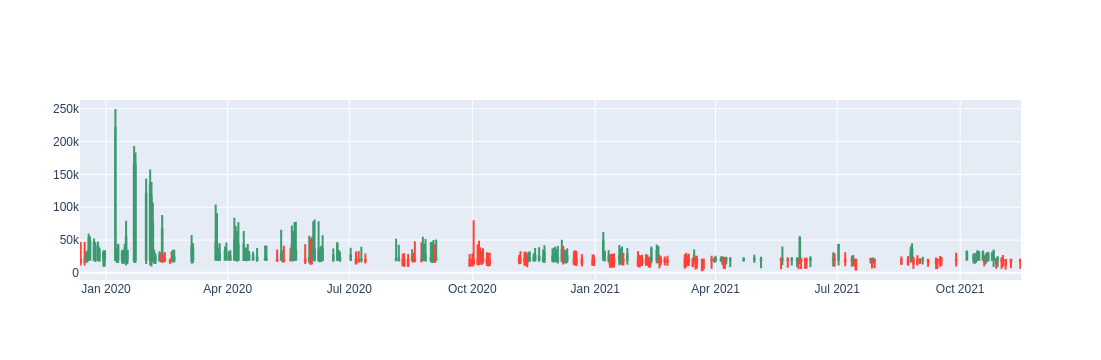

In [678]:
create_candle_stick(portfolio[ticker+[col for col in portfolio.columns if re.search(".*portfolio.*", col)]+ \
                    ["org_index","shift_index"]], date=portfolio.index[0].strftime("%Y-%m-%d"))

In [679]:
# portfolio.loc["2020-01-10"][["portfolio_buy","portfolio_curr","org_index","shift_index","portfolio"]]

In [525]:
# def create_candle_stick_rand(df_portfolio, date='2024-01-15', period=30):
#     # Backtest the tool for the last 30 days
#     df_portfolio = df_portfolio[datetime.strptime(date, '%Y-%m-%d'):]
#     df_portfolio = df_portfolio.iloc[:20]
#     # print(df_portfolio.tail())
#     fig = go.Figure(data=[go.Candlestick(x=df_portfolio.index,
#                 open=df_portfolio['portfolio_buy_rand'], high=df_portfolio['portfolio_max_rand'],
#                 low=df_portfolio['portfolio_min_rand'], close=df_portfolio['portfolio_curr_rand'])
#                      ])

#     fig.update_layout(xaxis_rangeslider_visible=False)
#     fig.show()

# def create_candle_stick(df_portfolio, date='2024-01-15', period=30):
#     # Backtest the tool for the last 30 days
#     df_portfolio = df_portfolio[datetime.strptime(date, '%Y-%m-%d'):]
#     df_portfolio = df_portfolio.iloc[:252]
#     # print(df_portfolio.tail())
#     fig = go.Figure(data=[go.Candlestick(x=df_portfolio.index,
#                 open=df_portfolio['portfolio_buy'], high=df_portfolio['portfolio_max'],
#                 low=df_portfolio['portfolio_min'], close=df_portfolio['portfolio_curr'],
#                 hovertext=["Buy Date: " + str(o) + "<br>Sell Date: " + str(h) + "<br>Recom Port: " + str(l) 
#                            for o, h, l in zip(df_portfolio["org_index"], df_portfolio["shift_index"], df_portfolio["portfolio"])])])

#     fig.update_layout(xaxis_rangeslider_visible=False)
#     fig.show()

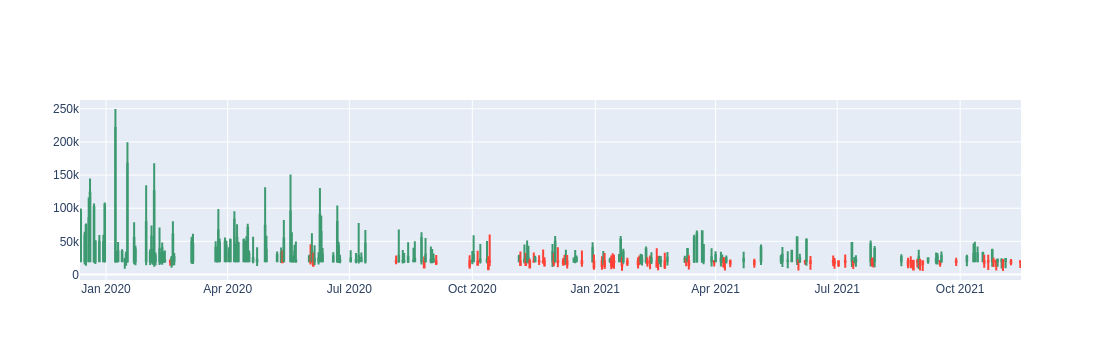

In [680]:
# create_candle_stick(portfolio_rand[ticker+[col for col in portfolio_rand.columns if re.search(".*portfolio.*", col)]], date='2024-11-07')
create_candle_stick(portfolio_rand[ticker+[col for col in portfolio_rand.columns if re.search(".*portfolio.*", col)]+ \
                    ["org_index","shift_index"]], date=portfolio_rand.index[0].strftime("%Y-%m-%d"))

In [563]:
portfolio_rand.loc["2020-02-05"][["portfolio_buy","portfolio_curr","org_index","shift_index","portfolio","MDB","ZS", "CPRT"]]

portfolio_buy                                         19984.669716
portfolio_curr                                         29969.56958
org_index                                      2020-02-05 00:00:00
shift_index                                    2022-01-20 00:00:00
portfolio         {'DDOG': 60, 'SBUX': 151, 'REGN': 11, 'COST': 4}
MDB                                                     163.210007
ZS                                                       58.509998
CPRT                                                     25.540001
Name: 2020-02-05 00:00:00, dtype: object

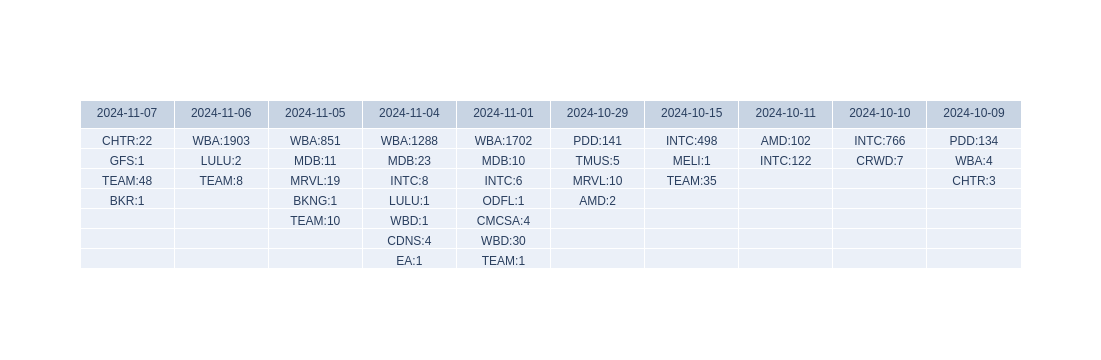

In [556]:
def list_of_list(window):
    # print(window.keys())
    return list(f"{k}:{v}" for k, v in window.items())

    
# Sample data
header_values = portfolio.iloc[:10].index.strftime("%Y-%m-%d")
cell_values = portfolio.iloc[:10]["portfolio"].apply(list_of_list).to_frame().values.tolist() #[['John', 25, 'New York'], ['Mary', 30, 'Los Angeles'], ['Bob', 35, 'Chicago']]
cell_values = [c[0] for c in cell_values]
# Create the table figure
fig = go.Figure(data=[go.Table(
    header=dict(values=header_values),
    cells=dict(values=cell_values)
)])

# Display the figure

fig.show()

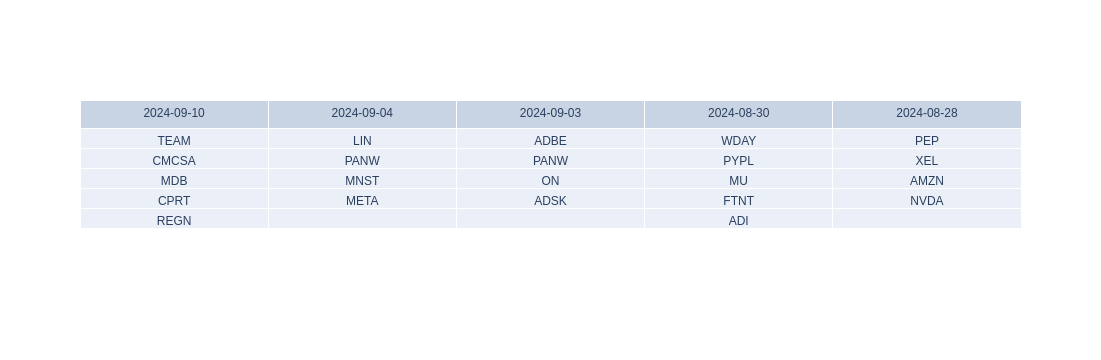

In [519]:
def list_of_list(window):
    # print(window.keys())
    return list(window.keys())

    
# Sample data
header_values = portfolio_rand[:5].index.strftime("%Y-%m-%d")
cell_values = portfolio_rand[:5]["portfolio"].apply(list_of_list).to_frame().values.tolist() #[['John', 25, 'New York'], ['Mary', 30, 'Los Angeles'], ['Bob', 35, 'Chicago']]
cell_values = [c[0] for c in cell_values]
# Create the table figure
fig = go.Figure(data=[go.Table(
    header=dict(values=header_values),
    cells=dict(values=cell_values)
)])

# Display the figure
fig.show()

In [168]:
# blacklit_df[blacklit_df["MDB_expected_upward_movement_interval"]==(np.NaN, np.NaN)]["MDB_expected_upward_movement_interval"]

Series([], Name: MDB_expected_upward_movement_interval, dtype: object)

In [528]:
len(portfolio)

46

In [529]:
import seaborn as sns
import pandas as pd

# Create a DataFrame
data = pd.DataFrame({'Value': np.concatenate([data1, data2, data3]),
                     'Group': ['Data 1'] * len(data1) + ['Data 2'] * len(data2) + ['Data 3'] * len(data3)})

# Plot the KDEs
sns.kdeplot(data=data, x='Value', hue='Group')
plt.show()

NameError: name 'data1' is not defined

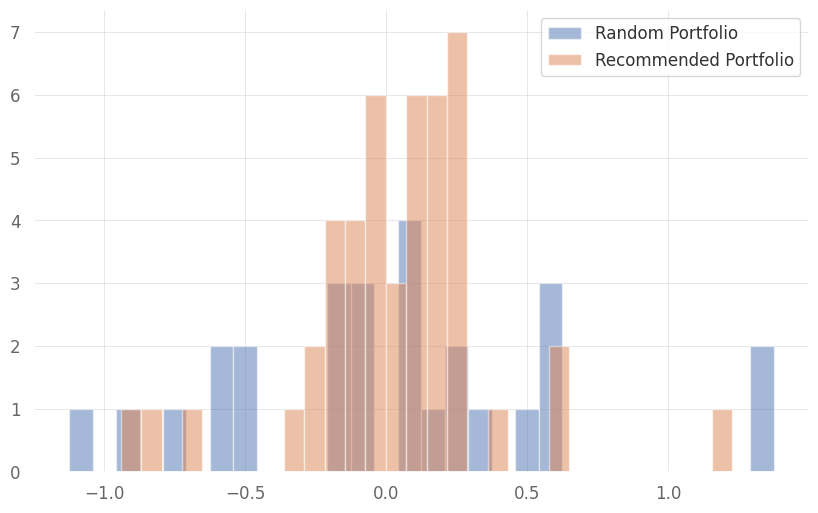

In [546]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
data1 = ((portfolio_rand["portfolio_curr_rand"] - portfolio_rand["portfolio_buy_rand"])/portfolio_rand["portfolio_buy_rand"])*100 #np.random.normal(0, 1, 1000)
data2 = ((portfolio["portfolio_curr"] - portfolio["portfolio_buy"])/portfolio["portfolio_buy"])*100 #np.random.normal(2, 1, 1000)
# data3 = np.random.normal(-2, 1, 1000)

# Plot the histograms
plt.hist(data1, bins=30, alpha=0.5, label='Random Portfolio')
plt.hist(data2, bins=30, alpha=0.5, label='Recommended Portfolio')
# plt.hist(data3, bins=30, alpha=0.5, label='Data 3')

plt.legend()
plt.show()

In [540]:
portfolio_rand["portfolio_curr_rand"]-portfolio_rand["portfolio_buy_rand"]

Date
2024-09-10    107.595289
2024-09-04     15.455685
2024-09-03     45.663582
2024-08-30     10.700409
2024-08-28    114.157112
2024-08-27     49.747574
2024-08-26   -181.536827
2024-08-23    105.051414
2024-08-22   -108.792204
2024-08-21    257.018500
2024-08-20    270.762196
2024-08-19   -224.505543
2024-08-14    -10.871422
2024-08-08    -21.351841
2024-08-05   -147.837322
2024-08-02     69.602310
2024-08-01     19.776966
2024-07-31    -25.656784
2024-07-30     29.154716
2024-07-29   -101.383736
2024-07-26   -104.907543
2024-07-17    -26.378113
2024-07-16    -40.268129
2024-07-15    114.446411
2024-07-12   -124.073204
2024-07-11     11.580498
2024-07-10    -13.892490
dtype: float64

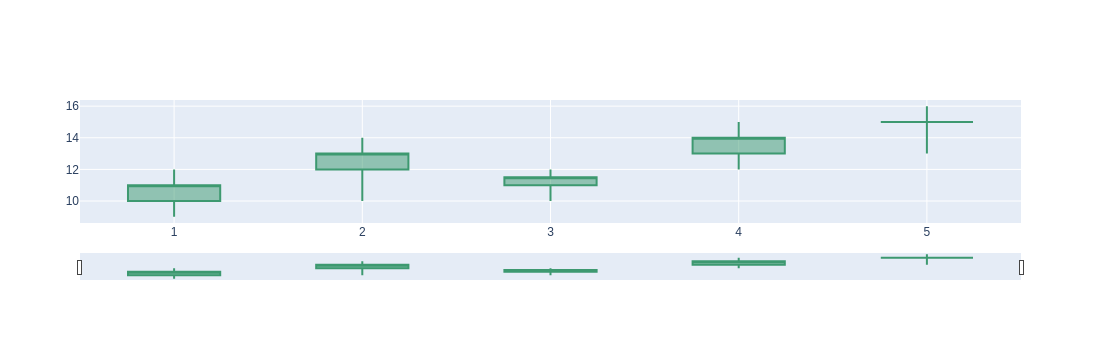

In [543]:
import plotly.graph_objects as go



# Sample data

x = [1, 2, 3, 4, 5]

open_prices = [10, 12, 11, 13, 15]

high_prices = [12, 14, 12, 15, 16]

low_prices = [9, 10, 10, 12, 13]

close_prices = [11, 13, 11.5, 14, 15]



fig = go.Figure(data=[go.Candlestick(x=x, open=open_prices, high=high_prices, low=low_prices, close=close_prices,

                                    hovertext=["Buy Date: " + "2024-05-01" + "<br>High: " + str(h) + "<br>Low: " + str(l) + "<br>Close: " + str(c) 

                                              for o, h, l, c in zip(open_prices, high_prices, low_prices, close_prices)])])



fig.show()

In [754]:
_port = list(portfolio.loc["2020-01-22"]["portfolio"].keys())
_port_rand = list(portfolio_rand.loc["2020-01-22"]["portfolio"].keys())

In [760]:
portfolio_rand.loc["2020-01-22"]["portfolio"]

{'BKNG': 2, 'CRWD': 256}

In [789]:
df_result = df.copy()

In [820]:
df_result.head(1)

,AMZN,WBD,TSLA,BKNG,CRWD,portfolio,portfolio_rand,date,portfolio_value,portfolio_rand_value
Date,,,,,,,,,,
2020-01-22,94.373001,32.029999,37.970669,1986.483032,62.57,"{'AMZN': 14, 'WBD': 40, 'TSLA': 458}","{'BKNG': 2, 'CRWD': 256}",2020-01-22,19992.988274,19990.885986


In [797]:
df_result = df.loc["2020-01-22":"2022-01-11"]

In [800]:
df_result = df_result[_port+_port_rand] 

In [802]:
df_result["portfolio"] = df_result.apply(lambda x : {'AMZN': 14, 'WBD': 40, 'TSLA': 458}, axis=1)

In [803]:
df_result["portfolio_rand"] = df_result.apply(lambda x : {'BKNG': 2, 'CRWD': 256}, axis=1)

In [804]:
df_result = df_result.loc[:,~df_result.columns.duplicated()].copy()

In [721]:
df_result = df_result[list(_port.keys())+list(_port_rand.keys())] #+["portfolio", "portfolio_rand"]]

In [805]:
df_result.isna().sum()[df_result.isna().sum() >0]

Series([], dtype: int64)

In [827]:
df_result.shape

(252, 10)

In [816]:
df_result = df_result.iloc[:252]

In [807]:
df_result["date"] = df_result.index.strftime("%Y-%m-%d")

In [808]:
import plotly.express as px
fig = px.line(df_result, x="date", y=df_result.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [821]:
def cagr(window, start_value, end_value, num_periods):
  return (end_value / start_value) ** (1 / num_periods) - 1

In [ ]:
def max_drawdown(window):
    return ((low - high)/high)*100

In [ ]:
def calmar_ratio(window):
    average_return / max_drawdown

In [811]:
def return_portfolio_value(window, col_name):
    value = 0
    try:
        for k,v in window[col_name].items():
            value = value + (window[k] * v)
        return value
    except Exception as err:
        print(err)
        return np.NaN

In [812]:
df_result["portfolio_value"] = df_result.apply(return_portfolio_value, args=("portfolio",), axis=1)
df_result["portfolio_rand_value"] = df_result.apply(return_portfolio_value, args=("portfolio_rand",), axis=1)

In [828]:
(df_result["portfolio_value"].iloc[-1]/df_result["portfolio_value"].iloc[0])-1

5.6812090687041135

In [837]:
df_result["portfolio_value"].min()

13105.450553894043

In [831]:
port_cagr=(df_result["portfolio_value"].iloc[-1]/df_result["portfolio_value"].iloc[0])-1
port_max_dd=((df_result["portfolio_value"].min()-df_result["portfolio_value"].max())/df_result["portfolio_value"].max())*100
port_calmar=(((df_result["portfolio_value"].iloc[-1]-df_result["portfolio_value"].iloc[0])/df_result["portfolio_value"].iloc[0])*100)/port_max_dd

In [832]:
port_calmar

-6.277527987245152

In [833]:
port_max_dd

-90.50073659961922

In [834]:
port_cagr_ra=(df_result["portfolio_rand_value"].iloc[-1]/df_result["portfolio_rand_value"].iloc[0])-1
port_max_dd_ra=((df_result["portfolio_rand_value"].min()-df_result["portfolio_rand_value"].max())/df_result["portfolio_rand_value"].max())*100
port_calmar_ra=(((df_result["portfolio_rand_value"].iloc[-1]-df_result["portfolio_rand_value"].iloc[0])/df_result["portfolio_rand_value"].iloc[0])*100)/port_max_dd

In [835]:
port_max_dd_ra

-82.8375751673186

In [836]:
port_calmar_ra

-2.3346816598285556

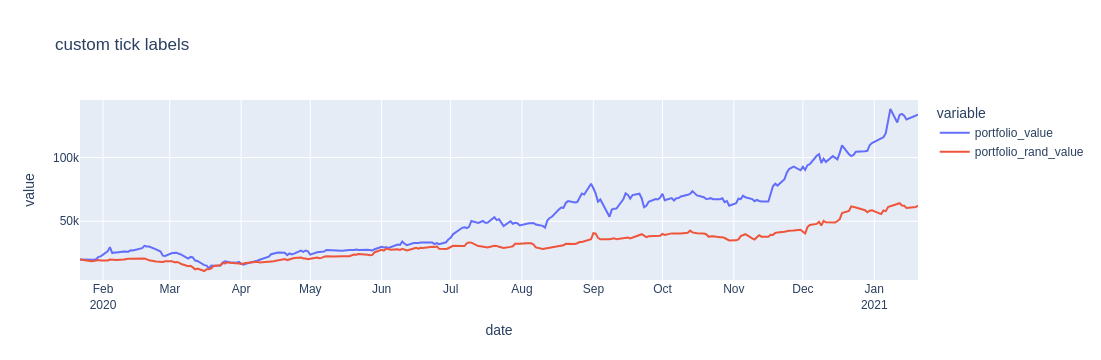

In [818]:
import plotly.express as px
fig = px.line(df_result, x="date", y=['portfolio_value', 'portfolio_rand_value'],
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [1078]:
df_result.head(1)

,AMZN,WBD,TSLA,BKNG,CRWD,portfolio,portfolio_rand,date,portfolio_value,portfolio_rand_value
Date,,,,,,,,,,
2020-01-22,94.373001,32.029999,37.970669,1986.483032,62.57,"{'AMZN': 14, 'WBD': 40, 'TSLA': 458}","{'BKNG': 2, 'CRWD': 256}",2020-01-22,19992.988274,19990.885986


In [1079]:
df_result.tail(1)

,AMZN,WBD,TSLA,BKNG,CRWD,portfolio,portfolio_rand,date,portfolio_value,portfolio_rand_value
Date,,,,,,,,,,
2021-01-20,163.169006,36.439999,283.483337,2144.615234,226.330002,"{'AMZN': 14, 'WBD': 40, 'TSLA': 458}","{'BKNG': 2, 'CRWD': 256}",2021-01-20,133577.334564,62229.710938


In [1082]:
df = df["2020-01-22":"2021-02-01"]

In [1083]:
df.columns

Index(['NVDA', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'AVGO',
       'COST', 'NFLX', 'ASML', 'TMUS', 'AMD', 'CSCO', 'PEP', 'ADBE', 'LIN',
       'AZN', 'TXN', 'QCOM', 'INTU', 'ISRG', 'AMGN', 'CMCSA', 'PDD', 'BKNG',
       'AMAT', 'HON', 'VRTX', 'PANW', 'ADP', 'MU', 'GILD', 'ADI', 'SBUX',
       'MELI', 'INTC', 'LRCX', 'KLAC', 'MDLZ', 'REGN', 'CTAS', 'SNPS', 'CDNS',
       'PYPL', 'CRWD', 'MRVL', 'MAR', 'CSX', 'ORLY', 'WDAY', 'CHTR', 'ADSK',
       'FTNT', 'TTD', 'ROP', 'PCAR', 'NXPI', 'TEAM', 'FANG', 'MNST', 'CPRT',
       'PAYX', 'AEP', 'ODFL', 'ROST', 'FAST', 'KDP', 'DDOG', 'EA', 'BKR',
       'KHC', 'MCHP', 'VRSK', 'CTSH', 'LULU', 'EXC', 'XEL', 'CCEP', 'IDXX',
       'ON', 'CSGP', 'ZS', 'TTWO', 'ANSS', 'CDW', 'DXCM', 'BIIB', 'ILMN',
       'MDB', 'WBD', 'MRNA', 'DLTR', 'WBA'],
      dtype='object')

In [1084]:
for _t in ticker:
    df[f"{_t}_ema10"] = ta.EMA(df[f"{_t}"], timeperiod = 10)
    df[f"{_t}_ema50"] = ta.EMA(df[f"{_t}"], timeperiod = 50)
    df[f"{_t}_buy"] = df[f"{_t}_ema10"] >  df[f"{_t}_ema50"]

In [1085]:
df["date"] = df.index

In [1086]:
#Reverse the dataframe
df = df[::-1]

In [1087]:
df=df.assign(shift_date=df['date'].shift(20))

In [1088]:
df[["date", "shift_date"]].tail()

,date,shift_date
Date,,
2020-01-28,2020-01-28,2020-02-26
2020-01-27,2020-01-27,2020-02-25
2020-01-24,2020-01-24,2020-02-24
2020-01-23,2020-01-23,2020-02-21
2020-01-22,2020-01-22,2020-02-20


In [1090]:
#forward the dataframe
df = df[::-1]

In [1091]:
df.dropna(inplace=True)

In [1092]:
df["maturity"]=df.apply(lambda x: False, axis=1)
df['sequence'] = range(1, len(df) + 1)

In [1093]:
# df.loc[df["sequence"] % 20 == 0, 'maturity'] = True
df.loc[df["sequence"] % 20 == 1, 'new_portfolio'] = True

In [1101]:
df[df["new_portfolio"]==True][["sequence", "new_portfolio","budget","portfolio_value"]]

,sequence,new_portfolio,budget,portfolio_value
Date,,,,
2020-04-01,1,True,20000.0,NaN
2020-04-30,21,True,NaN,NaN
2020-05-29,41,True,NaN,NaN
2020-06-26,61,True,NaN,NaN
2020-07-27,81,True,NaN,NaN
2020-08-24,101,True,NaN,NaN
2020-09-22,121,True,NaN,NaN
2020-10-20,141,True,NaN,NaN
2020-11-17,161,True,NaN,NaN


In [1095]:
df["budget"] = df.apply(lambda x: 0)
df["portfolio_value"] = df.apply(lambda x: 0)


In [1099]:
df.at["2020-04-01","budget"] =20000

In [1074]:
import math
def greedy_allocation(window, portfolio, budget):
    # budget=budget
    port_dict = {_p:0 for _p in portfolio}
    # print(port_dict)
    # print(portfolio)
    # sys.exit()
    while budget>0:
        for _p in portfolio:
            print(window[_p])
            print(budget - window[_p])
            if budget-window[_p]>=0:
              port_dict[_p] = port_dict[_p]+1
              budget = budget - window[_p]
            else:
                return (port_dict,budget)
    # print(port_dict)
    print(budget)
    print("returning")
    # sys.exit()
    # while budget>=0:
    #     for _p in portfolio:
    #         if budget-window[_p]>=0:
    #             port_dict[_p] = port_dict[_p]+1
    #             budget = budget-window[_p]
    #         else:
    #             budget=-1
    #             break
    #     print(budget)
                
    return (port_dict,budget)

In [1075]:
def return_portfolio(window, budget):
    portfolio = []
    if window["new_portfolio"] == True:
        for _t in ticker:
            if window[f"{_t}_buy"]:
                if len(portfolio)<=20:
                    portfolio.append(_t)
    port_dict, budget = greedy_allocation(window, portfolio, budget)
    return port_dict, budget

In [1071]:
df["portfolio", "balance"] = df[df["new_portfolio"]==True].apply(return_portfolio, axis=1, result_type='expand')

60.16864013671875
19939.83135986328
496.6499938964844
19443.181365966797
61.9900016784668
19381.19136428833
29.670000076293945
19351.521364212036
60.16864013671875
19291.352724075317
496.6499938964844
18794.702730178833
61.9900016784668
18732.712728500366
29.670000076293945
18703.042728424072
60.16864013671875
18642.874088287354
496.6499938964844
18146.22409439087
61.9900016784668
18084.234092712402
29.670000076293945
18054.56409263611
60.16864013671875
17994.39545249939
496.6499938964844
17497.745458602905
61.9900016784668
17435.75545692444
29.670000076293945
17406.085456848145
60.16864013671875
17345.916816711426
496.6499938964844
16849.26682281494
61.9900016784668
16787.276821136475
29.670000076293945
16757.60682106018
60.16864013671875
16697.438180923462
496.6499938964844
16200.788187026978
61.9900016784668
16138.79818534851
29.670000076293945
16109.128185272217
60.16864013671875
16048.959545135498
496.6499938964844
15552.309551239014
61.9900016784668
15490.319549560547
29.67000007

ValueError: Cannot set a DataFrame with multiple columns to the single column ('portfolio', 'balance')

In [1073]:
df[["portfolio", "balance"] ]

KeyError: "['balance'] not in index"

In [1056]:
df[df["new_portfolio"]==True]["portfolio"] 

Date
2020-04-01       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-30    {'NVDA': 7, 'MSFT': 7, 'AMZN': 7, 'META': 7, '...
2020-05-29    {'NVDA': 7, 'AAPL': 7, 'MSFT': 7, 'AMZN': 7, '...
2020-06-26    {'NVDA': 7, 'AAPL': 6, 'MSFT': 6, 'AMZN': 6, '...
2020-07-27    {'NVDA': 6, 'AAPL': 6, 'MSFT': 6, 'AMZN': 6, '...
2020-08-24    {'NVDA': 6, 'AAPL': 6, 'MSFT': 6, 'AMZN': 5, '...
2020-09-22    {'NVDA': 7, 'AAPL': 7, 'META': 7, 'TSLA': 7, '...
2020-10-20    {'NVDA': 5, 'AAPL': 5, 'MSFT': 5, 'AMZN': 5, '...
2020-11-17    {'NVDA': 7, 'AAPL': 6, 'MSFT': 6, 'GOOGL': 6, ...
2020-12-16    {'NVDA': 5, 'AAPL': 5, 'MSFT': 5, 'AMZN': 5, '...
Name: portfolio, dtype: object

In [1064]:
def evaluate_portfolio_val(window):
    port_val = 0
    print(window)
    # if window["new_portfolio"]==True:
    for k,v in window["portfolio"].items():
        port_val = port_val + window[k]*v
        # if not window[f"{k}_buy"]:
        #     # window["portfolio"] = window["portfolio"].pop(window[f"{k}"])
        #     del window["portfolio"][f"{k}"]
    return port_val
        
                
        

In [1065]:
for start, end in zip(df[df["new_portfolio"]==True].index, df[df["maturity"]==True].index):
    start=start.strftime("%Y-%m-%d")
    end=end.strftime("%Y-%m-%d")
    print(f"{start} - {end}")
    df["portfolio_value"] = df.loc[start:end].apply(evaluate_portfolio_val, axis=1)

In [1068]:
df["portfolio_value"] = df.apply(evaluate_portfolio_val, axis=1)

NVDA                                                   6.055418
AAPL                                                  58.528084
MSFT                                                 146.180405
AMZN                                                  95.385002
GOOGL                                                 54.968887
                                      ...                      
shift_date                                  2020-04-30 00:00:00
maturity                                                  False
sequence                                                      1
new_portfolio                                              True
portfolio        {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
Name: 2020-04-01 00:00:00, Length: 386, dtype: object
NVDA                                                   6.364328
AAPL                                                  59.504726
MSFT                                                 149.207611
AMZN                                              

In [1006]:
df.loc['2020-04-02':'2020-04-29','portfolio'] =  {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}

In [1060]:
df["portfolio"].ffill(inplace=True)

/tmp/ipykernel_280594/3641911080.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1061]:
df.loc["2020-04-01":"2020-04-30","portfolio"]

Date
2020-04-01       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-02       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-03       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-06       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-07       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-08       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-09       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-13       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-14       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-15       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-16       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-17       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-20       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-21       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-22       {'GILD': 31, 'REGN': 30, 'ZS': 30, 'MRNA': 30}
2020-04-23       {'GILD': 31, 'REGN

In [1070]:
df["portfolio_value"]

Date
2020-04-01    19514.527714
2020-04-02    19774.112659
2020-04-03    19758.652779
2020-04-06    20066.105133
2020-04-07    19797.491516
                  ...     
2020-12-24    20095.353843
2020-12-28    20281.728619
2020-12-29    20354.368045
2020-12-30    20348.366688
2020-12-31    20510.929082
Name: portfolio_value, Length: 191, dtype: float64